In [23]:
%matplotlib inline
# !jt -t chesterish
!ls hw0-bundle

hw0.pdf
stackoverflow-Java.txt
submission_template_hw0.pdf
submission_template_hw0.tex
Wiki-Vote.txt


# 1. Test with simple data

In [3]:
import snap
import seaborn as sns
import numpy as np
from collections import Counter

In [4]:
e_small = {(1, 2),(2, 1),(1, 3),(1, 1)}
g = snap.TNGraph.New()
# add node
nodes = []
for p in e_small:
    for n in p:
        if n not in nodes:
            nodes.append(n)
for n in nodes:
    g.AddNode(n)
# add edge
for n1, n2 in e_small:
    g.AddEdge(n1, n2)

In [5]:
# snap.SaveEdgeList(g1, "test.txt", "Save as tab-separated list of edges")

In [6]:
CntV = snap.TIntPrV()
snap.GetOutDegCnt(g, CntV)
for p in CntV:
    print("degree %d: count %d" % (p.GetVal1(), p.GetVal2()))

degree 0: count 1
degree 1: count 1
degree 3: count 1


[1, 1, 1]


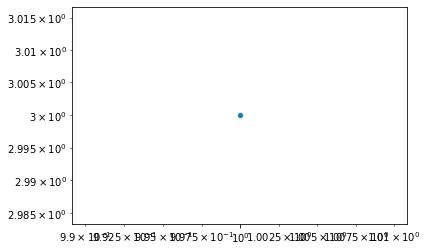

In [63]:
def graph_deg_cnt(g):
    cntv = snap.TIntPrV()
    snap.GetOutDegCnt(g, cntv)
    # get all degree, without 0
    counts = [p.GetVal2() for p in cntv]
#     return counts
    print(counts)
    d_count = (Counter(counts))
    arr = np.array(list(d_count.items()))
    return arr
    
def plot_deg_cnt(g, x_fit = None, y_fit = None):
    counts = graph_deg_cnt(g)
    ax = sns.scatterplot(counts[:,0], counts[:,1]) 
    ax.set_xscale('log', basex=10)
    ax.set_yscale('log', basey=10)
    if (x_fit is not None) and (y_fit is not None):
        sns.lineplot(x_fit, y_fit)

plot_deg_cnt(g)

# 2 Further Analyzing the Wikipedia voters network

In [64]:
g1 = snap.LoadEdgeList(snap.PNGraph, "./hw0-bundle/Wiki-Vote.txt", 0, 1)

In [65]:
CntV = snap.TIntPrV()
snap.GetOutDegCnt(g1, CntV)
for p in CntV:
    print("degree %d: count %d" % (p.GetVal1(), p.GetVal2()))

degree 0: count 1005
degree 1: count 2382
degree 2: count 704
degree 3: count 401
degree 4: count 279
degree 5: count 162
degree 6: count 159
degree 7: count 131
degree 8: count 110
degree 9: count 91
degree 10: count 79
degree 11: count 75
degree 12: count 68
degree 13: count 61
degree 14: count 56
degree 15: count 57
degree 16: count 48
degree 17: count 32
degree 18: count 44
degree 19: count 40
degree 20: count 32
degree 21: count 31
degree 22: count 30
degree 23: count 23
degree 24: count 29
degree 25: count 19
degree 26: count 24
degree 27: count 20
degree 28: count 25
degree 29: count 28
degree 30: count 23
degree 31: count 25
degree 32: count 16
degree 33: count 22
degree 34: count 15
degree 35: count 18
degree 36: count 16
degree 37: count 15
degree 38: count 12
degree 39: count 23
degree 40: count 10
degree 41: count 24
degree 42: count 14
degree 43: count 10
degree 44: count 23
degree 45: count 16
degree 46: count 13
degree 47: count 13
degree 48: count 12
degree 49: count 11

[1005, 2382, 704, 401, 279, 162, 159, 131, 110, 91, 79, 75, 68, 61, 56, 57, 48, 32, 44, 40, 32, 31, 30, 23, 29, 19, 24, 20, 25, 28, 23, 25, 16, 22, 15, 18, 16, 15, 12, 23, 10, 24, 14, 10, 23, 16, 13, 13, 12, 11, 17, 6, 12, 8, 8, 8, 5, 8, 5, 5, 6, 9, 8, 7, 7, 8, 9, 3, 12, 6, 7, 4, 5, 3, 4, 8, 6, 9, 2, 11, 9, 10, 3, 2, 3, 3, 5, 3, 5, 8, 4, 5, 2, 7, 3, 8, 2, 2, 4, 4, 5, 5, 3, 4, 3, 4, 1, 3, 1, 1, 2, 3, 4, 4, 3, 3, 2, 1, 1, 5, 5, 5, 3, 1, 1, 2, 2, 1, 1, 3, 1, 1, 5, 1, 2, 4, 1, 3, 3, 4, 2, 1, 2, 2, 1, 1, 1, 5, 2, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


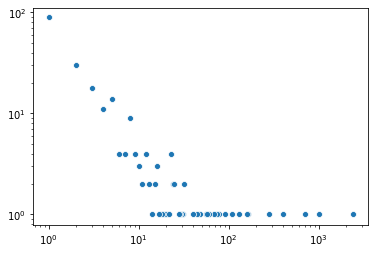

In [66]:
# 2.1
plot_deg_cnt(g1)

In [67]:
# or plot with snap
snap.PlotOutDegDistr(g1, "Stack-Java", "Stack-Java In Degree")

In [72]:
# 2.2
def list_element_count(l):
    arr = np.empty([0,2])
    counts = Counter(l)
    for k,v in counts.items():
        arr = np.append(arr, [[k, v]], axis=0)
#     print(arr)
    return arr
# l = graph_deg_cnt(g1)
arr = graph_deg_cnt(g1)

a, b = np.polyfit(np.log10(arr[:,0]), np.log10(arr[:,1]), deg=1)

[1005, 2382, 704, 401, 279, 162, 159, 131, 110, 91, 79, 75, 68, 61, 56, 57, 48, 32, 44, 40, 32, 31, 30, 23, 29, 19, 24, 20, 25, 28, 23, 25, 16, 22, 15, 18, 16, 15, 12, 23, 10, 24, 14, 10, 23, 16, 13, 13, 12, 11, 17, 6, 12, 8, 8, 8, 5, 8, 5, 5, 6, 9, 8, 7, 7, 8, 9, 3, 12, 6, 7, 4, 5, 3, 4, 8, 6, 9, 2, 11, 9, 10, 3, 2, 3, 3, 5, 3, 5, 8, 4, 5, 2, 7, 3, 8, 2, 2, 4, 4, 5, 5, 3, 4, 3, 4, 1, 3, 1, 1, 2, 3, 4, 4, 3, 3, 2, 1, 1, 5, 5, 5, 3, 1, 1, 2, 2, 1, 1, 3, 1, 1, 5, 1, 2, 4, 1, 3, 3, 4, 2, 1, 2, 2, 1, 1, 1, 5, 2, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [73]:
print(a,b)

-0.49680836515489424 1.0271534828907396


In [74]:
# log10 y = a · log10 x + b, equivalently, y = 10^b · x^a

y_fit = np.power(arr[:,0], a) * np.power(10,b)

[1005, 2382, 704, 401, 279, 162, 159, 131, 110, 91, 79, 75, 68, 61, 56, 57, 48, 32, 44, 40, 32, 31, 30, 23, 29, 19, 24, 20, 25, 28, 23, 25, 16, 22, 15, 18, 16, 15, 12, 23, 10, 24, 14, 10, 23, 16, 13, 13, 12, 11, 17, 6, 12, 8, 8, 8, 5, 8, 5, 5, 6, 9, 8, 7, 7, 8, 9, 3, 12, 6, 7, 4, 5, 3, 4, 8, 6, 9, 2, 11, 9, 10, 3, 2, 3, 3, 5, 3, 5, 8, 4, 5, 2, 7, 3, 8, 2, 2, 4, 4, 5, 5, 3, 4, 3, 4, 1, 3, 1, 1, 2, 3, 4, 4, 3, 3, 2, 1, 1, 5, 5, 5, 3, 1, 1, 2, 2, 1, 1, 3, 1, 1, 5, 1, 2, 4, 1, 3, 3, 4, 2, 1, 2, 2, 1, 1, 1, 5, 2, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


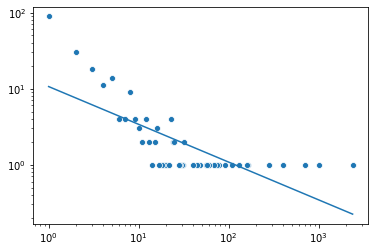

In [75]:
plot_deg_cnt(g1, x_fit = arr[:,0], y_fit=y_fit)

# 3 Finding Experts on the Java Programming Language on StackOverflow

In [17]:
g_java = snap.LoadEdgeList(snap.PNGraph, "./hw0-bundle/stackoverflow-Java.txt", 0, 1)

In [31]:
a = snap.PrintInfo(g_java, "QA Stats", "qa-info.txt", False)

In [33]:
# 3.1 The number of weakly connected components in the network
WccV = snap.TIntPrV()
snap.GetWccSzCnt(g_java, WccV)
print ("# of connected component sizes", WccV.Len())
for comp in WccV:
    print ("size %d, number of components %d" % (comp.GetVal1(), comp.GetVal2()))

# of connected component sizes 8
size 1, number of components 5191
size 2, number of components 4462
size 3, number of components 406
size 4, number of components 68
size 5, number of components 11
size 6, number of components 2
size 7, number of components 2
size 131188, number of components 1


In [38]:
# 3.2  number of edges and the number of nodes in the largest weakly connected component
MxWcc = snap.GetMxWcc(g_java)
print ("max wcc nodes %d, edges %d" %(MxWcc.GetNodes(), MxWcc.GetEdges()))

max wcc nodes 131188, edges 322486


In [50]:
# 3.3. IDs of the top 3 most central nodes in the network by PagePank scores
PRankH = snap.TIntFltH()
snap.GetPageRank(g_java, PRankH)
for item in PRankH:
    print (item, PRankH[item])

78 2.4082266411394174e-06
86 1.0954090787330643e-05
58 2.7410854878087346e-06
35 1.8556239858111125e-05
122 4.355801112478744e-05
25 2.4082266411394174e-06
154 4.455295374611443e-06
340 2.552896207319471e-06
40 2.718232854382389e-06
462 1.5241247983019322e-05
2089740 1.536413954426386e-05
235 2.75018796427062e-05
13940 3.363086735339289e-05
488 2.4082266411394174e-06
1741 5.258187149349917e-06
92 1.073978893858576e-05
287 6.401571221989262e-05
670 2.4082266411394174e-06
861 8.239743972288958e-06
429 2.4082266411394174e-06
75 4.455295374611443e-06
267 8.273778243976873e-06
100 7.697788067030338e-06
728 1.266866414183773e-05
198 1.003650939156593e-05
969 1.8802408459741765e-05
737 6.258798302120075e-05
27687 2.4082266411394174e-06
816 4.796473496856781e-06
782 1.0592932575934607e-05
837 2.4082266411394174e-06
797 8.473812960489703e-06
304 0.0010213717545874352
931 1.1655950732876308e-05
4725 0.001690582610692118
573 1.2516186152281976e-05
872 6.0851434940570765e-06
959 8.37494181452088e-

8229 4.455295374611443e-06
15352 6.635317265668479e-06
42585 1.2458504695782743e-05
21679 2.999494288733076e-06
15053 2.4082266411394174e-06
27427 4.455295374611443e-06
17712 6.9230598046622935e-06
22917 2.4082266411394174e-06
20029 2.5181647400827305e-05
14167 2.8692867844254395e-05
16193 1.0825409310841814e-05
22068 1.9692225072931572e-05
17707 2.4082266411394174e-06
12344 2.4082266411394174e-06
22979 1.0907784483437257e-05
23003 2.4082266411394174e-06
1862 4.455295374611443e-06
16387 2.659401929477533e-06
51001 2.6064624646872658e-06
14540 4.097058346253838e-06
22777 2.4082266411394174e-06
23094 3.3603702212376943e-06
723 6.438912264252097e-06
22992 5.351518467638359e-05
3289 2.4082266411394174e-06
23126 2.4082266411394174e-06
7756 4.455295374611443e-06
22935 2.4082266411394174e-06
29008 4.455295374611443e-06
11137 3.3603702212376943e-06
22656 0.007103532693128619
20165 2.4082266411394174e-06
24022 5.393535210786122e-06
10583 3.458827441797356e-06
2512 2.4082266411394174e-06
2267 3.

36269 2.4082266411394174e-06
36281 2.4082266411394174e-06
37231 0.0004353744067790617
20588 1.6039509871140297e-05
34984 2.4082266411394174e-06
36316 8.057773932371417e-06
32462 2.4082266411394174e-06
636 4.455295374611443e-06
3095 1.8290373711113985e-05
3978 3.0757774887589728e-06
35341 2.4082266411394174e-06
29326 2.4082266411394174e-06
25228 2.4082266411394174e-06
36627 4.455295374611443e-06
21590 6.584673502308736e-06
36510 2.4082266411394174e-06
27528 1.5233619194197776e-05
36525 2.4082266411394174e-06
51789 1.6169604861105627e-05
24054 0.00011607982541032216
22062 2.4082266411394174e-06
11529 3.43176100787543e-06
36641 2.4082266411394174e-06
10061 3.3483305111509214e-06
8531 2.4082266411394174e-06
12243 2.4082266411394174e-06
36744 2.4082266411394174e-06
36545 2.4082266411394174e-06
29157 1.158829435660479e-05
36794 2.4082266411394174e-06
49553 3.656027571542867e-05
36678 2.4082266411394174e-06
17 3.43176100787543e-06
4688 2.4082266411394174e-06
1134977 2.4082266411394174e-06
168

1454 6.3914170100243446e-06
53444 2.08939180967145e-05
5380 5.81247476147624e-06
55794 2.482997354376033e-05
54579 1.2069580792909235e-05
1585 4.515323104453669e-06
35520 2.4082266411394174e-06
58061 4.215258082603279e-05
493236 2.0324091889882775e-05
40645 2.4082266411394174e-06
37416 6.0346274099079515e-05
20971 2.4082266411394174e-06
5295 6.502364108083468e-06
27507 1.4126046119587346e-05
28946 4.401242039274434e-06
52061 4.050328907036311e-06
65092 1.5447608811933663e-05
58175 2.4082266411394174e-06
50434 2.4082266411394174e-06
53771 2.8176403878338226e-06
57695 0.0037368910916053704
21699 2.4711439600520554e-06
58264 2.4082266411394174e-06
36611 0.0001668851972819787
426996 2.4082266411394174e-06
39666 2.6319509580394643e-06
71208 4.034165366250967e-06
56994 1.0592932575934607e-05
36267 2.4711439600520554e-06
35886 2.6204288722393987e-06
81385 8.093166537991251e-06
58353 2.4082266411394174e-06
50214 1.4423723627152952e-05
58433 2.4082266411394174e-06
56932 2.4082266411394174e-06
5

103715 5.13338364638934e-06
73476 2.610311082917763e-06
79408 2.5006452556689555e-06
47461 5.992292120111879e-06
60426 2.4082266411394174e-06
46011 2.7410854878087346e-06
81424 5.242422435581767e-06
61592 5.593853340314003e-06
51431 5.885662305792764e-06
81585 2.4082266411394174e-06
65864 3.871504604055635e-05
81668 4.914869472080562e-06
81307 1.6039509871140297e-05
66200 2.4082266411394174e-06
79676 2.609909066765983e-06
2527 2.4082266411394174e-06
58781 2.4082266411394174e-06
81810 2.4082266411394174e-06
55170 2.4082266411394174e-06
47361 4.289152758814589e-06
16826 2.4082266411394174e-06
77087 3.322861642550268e-06
78967 2.919993824507424e-06
74263 2.4082266411394174e-06
19268 2.675558173803285e-06
697099 2.7374813722676813e-06
30478 7.920300535034544e-06
736 2.4082266411394174e-06
26943 3.50049189074073e-05
81071 9.270659491369026e-06
80410 2.9154686451772326e-05
80154 9.43705947587254e-05
69673 5.117880531469321e-06
82156 7.352464681777388e-06
82178 2.4082266411394174e-06
80907 2.

204845 5.1754672133917404e-05
74682 2.4082266411394174e-06
78134 2.4082266411394174e-06
80458 7.576703493127625e-06
46715 7.576703493127625e-06
90322 1.3982194880092638e-05
100957 0.0003004177786868797
21586 2.4082266411394174e-06
25981 4.843358026668038e-06
16071 3.43176100787543e-06
306276 4.348704579688797e-05
104998 3.360269007018612e-06
86154 4.605630234581806e-06
92486 2.694531538502461e-06
35881 3.677751414603786e-06
25111 2.4082266411394174e-06
11440 4.455295374611443e-06
104748 2.4082266411394174e-06
472792 0.00010331736184358698
73148 2.4528033811860105e-06
104117 6.60674187341478e-05
100321 2.4901093904782984e-06
202007 2.4635188254627372e-05
105355 4.188357100418447e-06
20073 1.0681904203004171e-05
96180 2.4082266411394174e-06
105224 0.0007265334656338402
99135 3.181731572243466e-05
81328 2.8057187885709405e-06
105413 2.4082266411394174e-06
37856 1.22019729626663e-05
100095 6.511667923710822e-06
105523 2.4082266411394174e-06
98989 2.6102767759323067e-06
70945 2.408226641139

124493 1.557131940057405e-05
128151 4.423358538161561e-06
107452 2.492991527815246e-06
121275 8.208781819269131e-05
128237 2.6319509580394643e-06
106342 6.130190306858981e-06
1533 2.4082266411394174e-06
125844 8.441064678099313e-05
90042 4.275003555691317e-06
15872 2.4082266411394174e-06
94544 5.572356977204334e-06
126952 3.4057965995314565e-05
104459 2.4082266411394174e-06
126584 2.5219526818878633e-06
127893 8.651864883717283e-06
61632 6.670732429417413e-06
159072 4.455295374611443e-06
122961 2.4082266411394174e-06
8792 7.556025834887928e-06
128517 2.5943237987277834e-06
2112692 1.0387878076974398e-05
414282 2.7440679097282934e-06
112964 8.628613512043644e-05
26444 2.4082266411394174e-06
22595 2.7785348838250802e-05
61926 2.4082266411394174e-06
3887 4.476428287001197e-06
128807 2.4082266411394174e-06
88383 6.545290101514702e-06
128836 4.188357100418447e-06
115596 2.4082266411394174e-06
249234 5.36592671156717e-06
59499 2.4082266411394174e-06
120140 1.0168869544912648e-05
119924 2.901

121797 2.4082266411394174e-06
153562 1.6039509871140297e-05
61479 0.00023697795179905727
151153 5.137651619102118e-06
153656 2.4082266411394174e-06
153683 2.4082266411394174e-06
131062 3.058098141913797e-06
50526 3.058098141913797e-06
144882 2.4082266411394174e-06
150325 6.735253884812269e-05
153737 3.066140484586052e-06
153778 2.5711219883767746e-06
95573 2.780825637420104e-06
150763 2.4082266411394174e-06
24068 3.43176100787543e-06
116067 3.43176100787543e-06
141589 2.8057187885709405e-06
153844 2.4082266411394174e-06
104891 0.0001759589850410647
129116 2.4082266411394174e-06
100658 2.4082266411394174e-06
150363 2.7644906259850482e-06
153994 2.4082266411394174e-06
148631 3.562741148960841e-05
146746 3.3603702212376943e-06
67808 3.3603702212376943e-06
148765 8.78910708391745e-06
142446 0.0003492082093810126
149821 2.8057187885709405e-06
369558 2.4082266411394174e-06
135589 0.0003581536827797699
147518 2.4082266411394174e-06
80432 2.4082266411394174e-06
153211 2.565693466791112e-06
151

54825 4.455295374611443e-06
175266 4.188357100418447e-06
85076 2.5219526818878633e-06
141172 2.5133170658284292e-05
50380 2.4082266411394174e-06
15537 8.447305115780635e-06
143913 2.4082266411394174e-06
170005 2.4082266411394174e-06
170830 2.9737227958578985e-06
144345 2.4082266411394174e-06
175097 3.0905828856300927e-06
175051 3.5620526468642596e-06
110933 6.446508401373159e-06
171527 3.0932035884188537e-06
19635 4.998893172181727e-06
94744 2.4082266411394174e-06
50476 0.0007647731951883287
155588 2.9379457711737747e-06
121742 3.445184857951101e-06
175798 2.4082266411394174e-06
172841 2.4082266411394174e-06
61344 4.462223324922913e-06
44512 2.4082266411394174e-06
174230 3.7983393791690173e-06
195929 2.5811988712377365e-06
1385039 0.00020771570800671093
80433 2.4082266411394174e-06
18215 2.434079022731562e-06
119280 1.958028885873589e-05
176136 2.4082266411394174e-06
83741 0.0001311638569083598
154066 2.4082266411394174e-06
91443 3.3603702212376943e-06
174335 3.8045168803866112e-06
176

197515 2.4082266411394174e-06
1317246 2.4082266411394174e-06
160808 2.4082266411394174e-06
113834 4.455295374611443e-06
189293 2.5287087262534095e-06
143438 2.503280590660236e-06
103814 5.367872735666917e-06
162038 2.4082266411394174e-06
198499 2.9832773671429347e-06
192444 0.00035233889534781076
174908 2.4082266411394174e-06
196814 3.3603702212376943e-06
198033 2.4082266411394174e-06
190712 2.4082266411394174e-06
181106 2.15114661610004e-05
176170 2.901500990227334e-06
198108 5.368979208547427e-06
11845 2.736147045352942e-06
1902010 4.86306544079022e-06
197680 3.5439931889147123e-06
119533 2.4082266411394174e-06
192001 2.4082266411394174e-06
180825 2.4082266411394174e-06
70110 2.6641102328234205e-06
196533 4.651528195202757e-06
198235 1.6039509871140297e-05
137354 2.4082266411394174e-06
105903 3.3843028443219306e-06
182837 4.6486383778269325e-06
3586 2.737518835973117e-06
86837 4.6795429102777496e-06
173922 2.4082266411394174e-06
130164 2.4082266411394174e-06
82928 2.4082266411394174e

223196 0.0001373081807582406
223201 1.0952917479937006e-05
14149 7.454507688181746e-06
234764 2.8176403878338226e-06
131227 2.599243171401952e-05
164874 2.4082266411394174e-06
217019 2.0893899338637573e-05
185031 4.164611156335582e-06
8130 2.8176403878338226e-06
141523 2.4082266411394174e-06
216459 2.4082266411394174e-06
61700 3.069494748834225e-06
190498 2.635678722636309e-06
200306 2.4082266411394174e-06
198884 4.455295374611443e-06
216431 2.9849575036757204e-06
11951 2.4082266411394174e-06
223541 2.4082266411394174e-06
197574 1.1424967429723658e-05
448452 2.5151233971612686e-06
223706 2.4082266411394174e-06
217852 3.43176100787543e-06
223686 6.9025974120811366e-06
223772 2.4082266411394174e-06
308435 2.4082266411394174e-06
203221 2.4082266411394174e-06
92759 4.455295374611443e-06
199536 2.4082266411394174e-06
212949 2.510580077813019e-06
187920 2.4082266411394174e-06
226491 2.4082266411394174e-06
204855 2.919993824507424e-06
223968 2.4082266411394174e-06
4427 4.198670547193786e-06
1

61924 2.8057187885709405e-06
168703 8.313071942497996e-06
99971 2.609909066765983e-06
10523 2.4082266411394174e-06
243572 2.4082266411394174e-06
245903 2.4082266411394174e-06
183397 3.200369124072937e-05
26497 2.462096870967629e-06
113313 2.431188723214663e-06
102451 2.4082266411394174e-06
193426 2.462096870967629e-06
107277 2.609909066765983e-06
105037 2.5638977282476597e-06
210709 2.659401929477533e-06
221153 2.4082266411394174e-06
54680 4.455295374611443e-06
205711 7.240202314167228e-06
106260 1.2173460708427629e-05
236501 2.4082266411394174e-06
233211 2.578815702262086e-06
184882 2.5117969049247732e-06
242988 5.465241561539273e-06
212662 2.4082266411394174e-06
191068 4.455295374611443e-06
246366 2.4082266411394174e-06
57344 2.8331652392304387e-05
379495 2.4082266411394174e-06
237223 6.8928568328577486e-06
235693 2.4082266411394174e-06
245977 8.46067020268812e-06
148277 2.7410854878087346e-06
244751 2.4082266411394174e-06
246668 2.4082266411394174e-06
246677 2.4082266411394174e-06
2

231931 2.4082266411394174e-06
203292 2.4082266411394174e-06
256717 5.273673182786715e-06
247447 2.657273299917104e-06
125487 2.4082266411394174e-06
40548 2.4082266411394174e-06
238958 2.4082266411394174e-06
25279 2.427154699036076e-06
252683 2.4082266411394174e-06
176741 9.429512078877112e-06
267927 2.4082266411394174e-06
267926 2.4082266411394174e-06
267966 2.4082266411394174e-06
253884 3.484562862120078e-06
262894 2.4082266411394174e-06
268111 2.4082266411394174e-06
245796 2.4082266411394174e-06
108452 2.61293351448662e-06
236996 2.4082266411394174e-06
268217 2.4082266411394174e-06
182668 4.5313310408749246e-05
166132 2.4082266411394174e-06
240403 2.4394611234318862e-06
53744 2.869027283650736e-06
47453 2.956548623319424e-06
252042 3.0905828856300927e-06
84383 2.4082266411394174e-06
234256 2.5433470362166526e-06
245737 2.4082266411394174e-06
267935 2.4082266411394174e-06
337493 2.4082266411394174e-06
268387 2.4082266411394174e-06
196068 1.2439378575072133e-05
268393 2.408226641139417

268098 2.492991527815246e-06
283077 4.681448885222915e-06
283037 2.5993736180416286e-06
267045 2.5660517710157408e-06
280537 1.8167197223572086e-05
163627 2.4082266411394174e-06
262211 2.4082266411394174e-06
253583 4.267186459209386e-06
283133 2.4082266411394174e-06
258813 2.2965788273068196e-05
273843 2.455832890755046e-06
157804 3.058098141913797e-06
71515 2.4082266411394174e-06
192657 2.4082266411394174e-06
63832 4.455295374611443e-06
282624 2.4082266411394174e-06
193283 2.4082266411394174e-06
586 2.578815702262086e-06
281469 8.8004258638756e-06
125278 3.55669087857195e-06
203204 4.758504336902616e-06
187280 2.4082266411394174e-06
191064 6.078752131540055e-06
271621 2.4082266411394174e-06
72735 1.6039509871140297e-05
94173 2.538603963004208e-06
245762 2.4082266411394174e-06
182153 3.717424063774548e-06
281188 3.7854072425405876e-05
173077 5.478829741347456e-06
224139 2.8176403878338226e-06
146276 2.4082266411394174e-06
272416 2.4082266411394174e-06
283696 2.4082266411394174e-06
1624

65338 2.4082266411394174e-06
1329487 5.3155370030699385e-06
719088 2.4082266411394174e-06
207129 4.455295374611443e-06
301543 2.4082266411394174e-06
301561 2.4082266411394174e-06
267406 2.4082266411394174e-06
231929 1.490501481421577e-05
39278 2.4082266411394174e-06
276030 2.4082266411394174e-06
301691 2.4082266411394174e-06
236334 8.778543808687962e-06
199498 2.919993824507424e-06
294773 4.890317131846295e-06
1397097 2.4082266411394174e-06
57084 4.455295374611443e-06
98361 2.4082266411394174e-06
214756 4.62057543029664e-06
207177 2.4082266411394174e-06
301816 1.1257864535064986e-05
111424 4.455295374611443e-06
243164 8.323854959530875e-06
186608 2.4082266411394174e-06
14732 2.4082266411394174e-06
9365 4.455295374611443e-06
174674 2.4082266411394174e-06
301955 3.3603702212376943e-06
148320 3.302539746273833e-06
294874 1.6039509871140297e-05
177971 2.4082266411394174e-06
302104 3.672811494234571e-06
320661 3.443988868962808e-06
7650 2.534143730188371e-06
92212 1.6039509871140297e-05
302

335565 2.254353805058836e-05
63225 7.7429280897379e-06
192465 2.4082266411394174e-06
321734 4.1426612168987935e-06
198212 3.34941129406339e-06
295284 2.4082266411394174e-06
155213 2.4567929663234387e-06
207524 2.4082266411394174e-06
226075 1.6039509871140297e-05
554431 0.00038874736124152427
325342 2.4082266411394174e-06
325324 4.419590255299066e-06
325415 2.4082266411394174e-06
318247 2.4082266411394174e-06
246342 4.034562392176714e-06
452483 1.0271050048351973e-05
319679 2.4082266411394174e-06
361832 3.4627236579112953e-06
296978 2.4082266411394174e-06
325533 2.4082266411394174e-06
240733 7.688003936087458e-06
284641 2.4082266411394174e-06
203982 2.6122177561882033e-06
190597 4.016226512987212e-06
306380 5.811654184689219e-06
319501 2.4082266411394174e-06
305423 5.968487559697477e-06
247763 2.0077589387250045e-05
106697 3.3603702212376943e-06
7586 7.08295894615985e-05
2405181 2.4082266411394174e-06
122080 2.4082266411394174e-06
40872 2.4082266411394174e-06
204045 2.4082266411394174e-

345859 2.478452076717513e-06
347308 2.4082266411394174e-06
298054 3.861763219843889e-06
351483 1.461481871846874e-05
291915 2.4082266411394174e-06
330777 4.455295374611443e-06
306845 3.5693304775494573e-06
347470 2.4082266411394174e-06
10593 3.0905828856300927e-06
34596 2.4082266411394174e-06
23939 1.6039509871140297e-05
347656 2.4082266411394174e-06
347708 2.4082266411394174e-06
47064 2.5793841423779174e-06
306761 3.3603702212376943e-06
288023 2.4082266411394174e-06
347754 2.4082266411394174e-06
501023 5.478829741347456e-06
347783 2.4082266411394174e-06
55142 3.43176100787543e-06
347768 2.659401929477533e-06
347812 2.4082266411394174e-06
227698 9.576960000297641e-06
299310 2.4082266411394174e-06
87699 3.43176100787543e-06
347880 2.4082266411394174e-06
347891 3.43176100787543e-06
313724 2.4082266411394174e-06
341611 2.4082266411394174e-06
242719 2.4082266411394174e-06
348058 6.182414590664366e-06
2827 2.901500990227334e-06
311884 2.4082266411394174e-06
92371 2.4082266411394174e-06
3481

44269 2.9670793101141173e-05
157591 3.141667483018319e-05
107323 2.4082266411394174e-06
373264 5.366491959941425e-06
123140 2.4082266411394174e-06
366447 2.0818322216215057e-05
308819 2.702778081171001e-06
25545 2.607241566004664e-06
245723 2.4082266411394174e-06
160364 4.188357100418447e-06
46571 2.462096870967629e-06
317734 2.4082266411394174e-06
129164 2.4082266411394174e-06
125981 3.0905828856300927e-06
233495 5.968487559697477e-06
365681 2.6242505952923577e-06
302387 2.5886643985206428e-05
739927 2.4567929663234387e-06
101767 2.968560149691445e-06
334314 2.4082266411394174e-06
281553 3.43176100787543e-06
301877 2.4082266411394174e-06
356235 4.455295374611443e-06
366823 2.4082266411394174e-06
231897 2.4082266411394174e-06
367600 2.554445836387419e-06
128431 3.950715263975519e-06
366916 2.4082266411394174e-06
366930 2.4082266411394174e-06
366948 2.4082266411394174e-06
42127 1.6039509871140297e-05
336851 3.5043157325992804e-06
88106 2.4082266411394174e-06
410810 5.8448880049813315e-0

473749 3.0905828856300927e-06
385680 2.4082266411394174e-06
387027 2.4082266411394174e-06
1106361 2.578815702262086e-06
55597 2.4553615084302804e-06
383152 2.4082266411394174e-06
57738 3.252386943932797e-06
387112 2.4082266411394174e-06
386064 2.4082266411394174e-06
387263 2.4082266411394174e-06
83144 5.804877344505479e-06
387296 2.4082266411394174e-06
335227 3.3603702212376943e-06
331105 4.188357100418447e-06
378200 1.1455974467385056e-05
373510 2.4082266411394174e-06
351548 2.431488785837963e-06
327547 2.694531538502461e-06
247921 2.740897801725666e-06
375983 2.4082266411394174e-06
332100 2.956548623319424e-06
340628 2.4082266411394174e-06
134754 4.665750208231774e-05
377641 2.4082266411394174e-06
206344 2.4082266411394174e-06
387540 2.4082266411394174e-06
387543 2.4082266411394174e-06
387608 2.4082266411394174e-06
386718 7.769592693782153e-06
30724 2.4082266411394174e-06
243245 7.832858334872537e-06
386989 2.4082266411394174e-06
130204 2.4082266411394174e-06
217628 2.408226641139417

391377 2.5159671007958398e-06
395093 2.4082266411394174e-06
441368 1.1302281069993902e-05
359476 4.703345027822736e-06
276374 1.6039509871140297e-05
152282 2.6641102328234205e-06
405977 2.4082266411394174e-06
405958 2.4082266411394174e-06
122078 2.6582046239803887e-06
211760 1.1467596059985814e-05
406091 2.4082266411394174e-06
104856 6.124879240865125e-05
136790 3.3603702212376943e-06
317061 2.935018766926391e-06
311163 2.576710205093045e-06
144587 2.4082266411394174e-06
328764 2.4082266411394174e-06
65889 2.4082266411394174e-06
406445 2.4082266411394174e-06
70583 4.455295374611443e-06
294415 2.6319509580394643e-06
364569 2.4082266411394174e-06
340250 2.4082266411394174e-06
402860 2.4082266411394174e-06
325115 3.43176100787543e-06
406500 2.4082266411394174e-06
391239 6.502364108083468e-06
315287 2.4082266411394174e-06
360257 2.476122871870672e-06
387194 4.984970717406808e-06
237666 2.5178986976144075e-06
406551 2.4082266411394174e-06
406563 2.4082266411394174e-06
91590 2.40822664113941

352837 2.4082266411394174e-06
422550 4.948628312363823e-06
388840 4.188357100418447e-06
395192 2.4082266411394174e-06
495938 3.43176100787543e-06
653230 0.0003744374336814374
274344 8.116823487756866e-06
174982 7.438158876051603e-06
426371 2.6737860881188324e-06
426469 2.4082266411394174e-06
120955 0.0002584336634004913
363811 5.381427285278043e-06
426493 3.07636693093665e-06
99582 2.6697283000668324e-06
188674 2.4082266411394174e-06
409132 3.943528191243436e-06
421991 2.4082266411394174e-06
259757 2.901500990227334e-06
426377 2.0305402665356383e-05
527222 3.0986452524462725e-06
426735 2.4082266411394174e-06
397707 2.8409025325323683e-06
426780 2.4082266411394174e-06
426824 2.4082266411394174e-06
27194 4.72815031238613e-06
186808 2.4082266411394174e-06
376434 2.4082266411394174e-06
104785 2.4082266411394174e-06
426962 3.689911122026393e-06
266978 5.249429882168926e-06
130580 4.188357100418447e-06
430426 4.999421542681405e-06
426688 2.4082266411394174e-06
401584 2.4082266411394174e-06
4

60223 2.4082266411394174e-06
339946 2.4082266411394174e-06
420116 3.43176100787543e-06
445815 2.4082266411394174e-06
446251 1.5701353716107803e-05
359971 2.7410854878087346e-06
443032 1.7590393762798713e-05
379053 2.749404763384755e-06
445841 3.3603702212376943e-06
2285028 2.919993824507424e-06
109427 3.4506890657720886e-06
445755 2.4082266411394174e-06
439450 2.8057187885709405e-06
445897 2.4082266411394174e-06
430182 4.455295374611443e-06
432575 8.878378031414866e-06
242641 2.71959308953208e-06
445964 2.4082266411394174e-06
416630 7.525898474819482e-06
43513 2.4082266411394174e-06
417028 2.948090213779285e-06
268544 5.387080537263042e-06
451013 1.2909294184395898e-05
150851 2.694531538502461e-06
446056 2.4082266411394174e-06
444668 2.4699784094002514e-06
565863 3.306769690669961e-06
445190 2.8115914923925485e-06
446111 2.4082266411394174e-06
446140 2.4633294906642024e-06
307211 3.718065905238473e-06
446210 8.85870690022258e-06
446234 2.4082266411394174e-06
446080 4.703879235888501e-0

280736 2.4082266411394174e-06
404326 2.4082266411394174e-06
223386 1.2609242291667557e-05
378844 3.3603702212376943e-06
466036 2.4082266411394174e-06
459431 4.0051116175280404e-06
467887 2.9547913412238055e-06
467944 1.792026242039454e-05
467946 2.4082266411394174e-06
448005 2.5433470362166526e-06
446254 2.4082266411394174e-06
21475 3.3710429296307767e-06
484814 7.277601924895323e-06
468030 2.4082266411394174e-06
468026 2.4082266411394174e-06
445872 2.4082266411394174e-06
410946 1.8272783772998184e-05
468298 4.791509185197541e-06
362859 2.8057187885709405e-06
207596 3.1347343162629074e-06
388916 2.919993824507424e-06
337551 2.4082266411394174e-06
284237 2.4082266411394174e-06
276252 2.4082266411394174e-06
115738 2.675558173803285e-06
468286 2.4082266411394174e-06
105631 4.455295374611443e-06
450044 3.184426520619607e-06
467357 2.4082266411394174e-06
373530 2.4082266411394174e-06
216509 2.4082266411394174e-06
254455 4.188357100418447e-06
468590 2.4082266411394174e-06
468618 4.1883571004

490168 2.4082266411394174e-06
490382 2.4082266411394174e-06
236082 2.5624899675106086e-06
224855 2.4082266411394174e-06
478709 2.4082266411394174e-06
131460 4.455295374611443e-06
252071 2.4082266411394174e-06
189909 2.4082266411394174e-06
490434 2.4082266411394174e-06
1700321 8.290348537197149e-05
138719 2.4082266411394174e-06
311305 2.6632490490907195e-06
490575 2.679088685403612e-06
395751 2.4082266411394174e-06
490889 2.557818063563268e-06
312407 9.441801364646939e-05
490709 2.8057187885709405e-06
741249 7.678884598856209e-06
282024 2.919993824507424e-06
297092 1.6039509871140297e-05
490867 2.4082266411394174e-06
347808 2.4082266411394174e-06
490888 2.4082266411394174e-06
124724 4.455295374611443e-06
490897 2.4082266411394174e-06
489943 2.4082266411394174e-06
187702 1.7531295898033383e-05
202488 3.045561328301347e-06
283231 2.4082266411394174e-06
489818 2.552896207319471e-06
385138 4.722939700020269e-06
490961 2.2210724756953175e-05
488830 3.0822906823564526e-05
308674 2.40822664113

506078 5.391984401139552e-06
491762 2.7705050893212645e-06
752877 2.5219526818878633e-06
483987 2.8938420570798614e-06
506114 2.901500990227334e-06
288435 2.4082266411394174e-06
161457 5.847085492342423e-06
98026 2.4082266411394174e-06
506184 2.4082266411394174e-06
418740 2.9892420671113136e-06
506112 2.4082266411394174e-06
506265 2.4082266411394174e-06
377613 4.188357100418447e-06
432665 2.4082266411394174e-06
208977 2.4461353213888994e-06
18297 2.4082266411394174e-06
483349 1.4252265669031608e-05
490571 2.4082266411394174e-06
408193 2.4082266411394174e-06
204312 2.4082266411394174e-06
506371 2.4082266411394174e-06
263215 2.4633294906642024e-06
188204 2.4082266411394174e-06
159570 5.046049187198027e-06
503185 2.4082266411394174e-06
111307 2.4082266411394174e-06
480417 1.2137855585880799e-05
506517 2.5266526155127785e-06
262852 3.3860151932080023e-06
505453 2.901500990227334e-06
487253 2.4082266411394174e-06
537403 3.577980203123432e-06
395258 2.4082266411394174e-06
2687173 2.408226641

527617 4.702445078738742e-05
107751 2.4082266411394174e-06
442041 4.660002247958646e-06
459780 3.43176100787543e-06
1158 2.4082266411394174e-06
84889 0.00017353828584100618
424563 3.710840026299721e-06
292535 3.5828352784458977e-06
525880 2.4082266411394174e-06
2041 2.4082266411394174e-06
540776 4.455295374611443e-06
525920 2.4082266411394174e-06
413996 2.4082266411394174e-06
196420 2.4082266411394174e-06
527406 4.455295374611443e-06
278666 2.4082266411394174e-06
484290 2.4507410829299827e-06
281028 1.2844090641368915e-05
346725 2.554445836387419e-06
122229 3.3603702212376943e-06
516160 2.4082266411394174e-06
562073 4.003353926447801e-06
201387 2.4082266411394174e-06
388787 3.2766800432184583e-06
526223 2.4082266411394174e-06
523118 2.5896491053386225e-06
510732 2.4082266411394174e-06
510778 2.635678722636309e-06
466693 2.4082266411394174e-06
469961 2.4082266411394174e-06
526393 2.4082266411394174e-06
25450 2.8176403878338226e-06
526427 5.4804220808892945e-06
526443 2.4082266411394174e

536358 3.0285003736655044e-05
539318 2.4082266411394174e-06
506130 3.43176100787543e-06
57828 5.441859150043698e-06
539337 2.4082266411394174e-06
538636 2.4082266411394174e-06
539397 2.4082266411394174e-06
539513 2.4082266411394174e-06
450534 1.608533441332387e-05
539473 2.4082266411394174e-06
428751 2.5265402054458916e-06
539539 2.4082266411394174e-06
591495 9.93440527060553e-05
478605 2.4082266411394174e-06
420259 5.598441224473739e-06
492307 3.7573207635651993e-06
539701 3.3603702212376943e-06
539646 2.4082266411394174e-06
211232 0.00010035445943038484
500686 2.4082266411394174e-06
539793 1.6039509871140297e-05
491827 2.4082266411394174e-06
539757 2.4721975390604183e-06
264177 2.4082266411394174e-06
276473 2.4082266411394174e-06
174534 2.4082266411394174e-06
524475 7.786772078542648e-06
539901 2.4082266411394174e-06
502848 5.478829741347456e-06
334507 2.4082266411394174e-06
539929 2.4082266411394174e-06
438433 4.455295374611443e-06
539680 3.564966184933973e-06
468304 0.0001094182659

558043 2.4082266411394174e-06
558890 2.4082266411394174e-06
325268 2.939417340166973e-06
507810 7.674432207360887e-05
558961 2.552896207319471e-06
526635 4.802918658033066e-06
558991 4.311387027903009e-06
557470 1.085655615120635e-05
128378 2.4082266411394174e-06
200821 1.6039509871140297e-05
489707 2.4082266411394174e-06
537566 3.3603702212376943e-06
559171 2.4082266411394174e-06
460218 2.4082266411394174e-06
246392 2.4082266411394174e-06
539885 2.4082266411394174e-06
225087 2.4082266411394174e-06
80286 2.694531538502461e-06
195539 2.4082266411394174e-06
437039 2.554445836387419e-06
555642 2.466912064493757e-06
554791 2.956245637610328e-06
559467 6.8658091815998075e-06
559475 2.4082266411394174e-06
369977 2.4082266411394174e-06
552279 2.4082266411394174e-06
559616 2.559712871635875e-06
513075 2.4082266411394174e-06
269409 3.0905828856300927e-06
515592 2.4082266411394174e-06
559730 3.3603702212376943e-06
543493 2.4082266411394174e-06
559768 2.4082266411394174e-06
559769 2.4082266411394

577046 2.722516088205095e-06
197546 3.5653402028530472e-06
578761 2.4082266411394174e-06
559745 4.240212720442585e-06
577061 2.4082266411394174e-06
480857 2.919993824507424e-06
400404 2.4082266411394174e-06
588817 2.534143730188371e-06
90614 2.4865085440308687e-06
577132 2.4082266411394174e-06
686463 3.43176100787543e-06
31615 2.5943237987277834e-06
577181 3.459764258252027e-05
577379 3.43176100787543e-06
204788 0.00041509350141750816
217071 4.112843684899718e-06
576952 2.4082266411394174e-06
366104 4.455295374611443e-06
573044 3.43176100787543e-06
554460 4.682747456108335e-06
577304 2.4082266411394174e-06
312594 2.749404763384755e-06
574187 2.4082266411394174e-06
412194 3.988860187097865e-06
577402 2.4082266411394174e-06
243355 2.5433470362166526e-06
576857 3.225703280707328e-06
175950 2.4082266411394174e-06
30812 2.188629253804331e-05
299080 2.4082266411394174e-06
577505 2.4082266411394174e-06
313439 2.4082266411394174e-06
290722 2.4082266411394174e-06
230419 3.107031969013966e-06
44

544006 2.901500990227334e-06
13562 3.3603702212376943e-06
349831 3.3603702212376943e-06
599255 2.4082266411394174e-06
599307 0.00016057453733518286
575045 2.4082266411394174e-06
459633 2.576710205093045e-06
599391 2.4082266411394174e-06
797980 2.675870966548244e-06
599429 2.4082266411394174e-06
599436 2.4191548043420195e-05
599451 2.4082266411394174e-06
590042 1.0813974264677365e-05
14622 3.3603702212376943e-06
562375 2.4082266411394174e-06
599633 2.4082266411394174e-06
316408 5.657584145011315e-06
325852 2.4082266411394174e-06
460184 2.8176403878338226e-06
563779 1.6039509871140297e-05
599733 2.4082266411394174e-06
499097 2.4082266411394174e-06
210774 2.492387325524269e-06
7925 5.389355502099788e-06
541867 3.43176100787543e-06
272176 3.7068629059672875e-06
599818 2.4082266411394174e-06
599858 2.4082266411394174e-06
599897 2.42866667628457e-06
635982 5.263637122987676e-05
511945 2.603960068868765e-06
571113 1.1317030282142825e-05
7604 2.4082266411394174e-06
650541 5.026561176393018e-06

190371 2.4082266411394174e-06
613614 7.930229926942295e-06
107455 2.4082266411394174e-06
507018 2.521013038301061e-06
618338 2.4082266411394174e-06
305211 4.188357100418447e-06
577826 4.3070324643703826e-06
558727 5.262331206657328e-06
618390 2.4082266411394174e-06
360739 2.681502699935881e-06
618492 2.901500990227334e-06
616194 4.188357100418447e-06
181098 2.4082266411394174e-06
390749 2.4082266411394174e-06
618532 3.2720483360563533e-06
598805 2.4082266411394174e-06
31161 2.5638977282476597e-06
618599 2.4082266411394174e-06
240953 2.7864918544333632e-05
287424 2.4082266411394174e-06
557939 2.4082266411394174e-06
584597 1.803346321382077e-05
431176 2.4082266411394174e-06
618712 2.4082266411394174e-06
617297 2.4082266411394174e-06
372405 2.4082266411394174e-06
337354 3.43176100787543e-06
530172 2.4082266411394174e-06
314681 2.4082266411394174e-06
479662 2.514107364032231e-06
451192 1.0839855557550924e-05
618916 2.4082266411394174e-06
550587 2.4082266411394174e-06
498902 2.4082266411394

599110 3.943528191243436e-06
623426 2.5326103268224026e-06
462336 2.4082266411394174e-06
248723 3.43176100787543e-06
431978 2.4082266411394174e-06
389749 2.4082266411394174e-06
641369 2.4082266411394174e-06
479654 2.4082266411394174e-06
355232 1.203836246337315e-05
640194 2.4082266411394174e-06
610128 3.299348883441038e-06
128167 2.4082266411394174e-06
65612 4.455295374611443e-06
515990 2.901500990227334e-06
101318 5.981766991809763e-06
641215 2.4082266411394174e-06
641739 3.058098141913797e-06
641507 2.4082266411394174e-06
524566 1.0039771699577402e-05
641753 2.4082266411394174e-06
456188 3.2766800432184583e-06
641792 2.4082266411394174e-06
464114 2.4082266411394174e-06
630103 2.616185614600364e-06
470760 2.4082266411394174e-06
423373 3.3603702212376943e-06
646203 2.5808203198521423e-06
641975 2.4082266411394174e-06
632568 8.549432841555494e-06
374750 4.921229209125474e-06
642067 2.4082266411394174e-06
100546 2.4082266411394174e-06
544094 2.4082266411394174e-06
89578 2.408226641139417

545925 2.4082266411394174e-06
116875 2.4082266411394174e-06
659366 2.4082266411394174e-06
253318 3.312562947800598e-06
467170 2.4082266411394174e-06
630384 2.4718991510129935e-06
193785 2.4082266411394174e-06
659541 2.4082266411394174e-06
220503 2.64503983572319e-06
618741 3.6107523812065674e-06
659580 1.6039509871140297e-05
173815 2.534980427919189e-06
1758051 2.0559640361021764e-05
591300 2.4082266411394174e-06
622465 4.188357100418447e-06
659658 2.4082266411394174e-06
640277 2.428101094862447e-06
251936 2.4082266411394174e-06
659687 2.4082266411394174e-06
659689 2.4082266411394174e-06
273767 7.975111730754647e-06
631733 2.4082266411394174e-06
452274 4.455295374611443e-06
649790 2.4531853734740884e-06
411582 6.058858750993925e-06
647241 2.4082266411394174e-06
646584 2.4082266411394174e-06
405219 2.4082266411394174e-06
642242 5.78223314065263e-06
658709 2.5433470362166526e-06
565672 3.43176100787543e-06
311001 5.4781920481889005e-06
213672 2.5446978900375525e-06
189247 3.2605865748843

352344 4.188357100418447e-06
585737 2.4082266411394174e-06
658010 1.5968230805597545e-05
678554 2.4082266411394174e-06
678558 2.4082266411394174e-06
678568 2.4082266411394174e-06
73535 2.4082266411394174e-06
324930 2.4082266411394174e-06
527194 2.4082266411394174e-06
678606 2.4082266411394174e-06
677719 3.7241993983714337e-06
678616 2.4082266411394174e-06
678629 3.058098141913797e-06
482999 2.534980427919189e-06
678646 2.4082266411394174e-06
519818 5.818669687927447e-06
496150 2.4082266411394174e-06
677939 2.4082266411394174e-06
606496 3.3252663827328935e-06
643634 2.4082266411394174e-06
690164 3.2136187311695585e-06
238264 2.6113348657124462e-06
466227 3.0905828856300927e-06
348920 2.4082266411394174e-06
546095 3.0314875365828597e-06
675065 2.6997407678388277e-06
679062 2.4082266411394174e-06
679092 1.3200111451811078e-05
679101 1.3628949000199188e-05
679096 2.4082266411394174e-06
679150 2.4082266411394174e-06
633969 2.4082266411394174e-06
469328 2.4082266411394174e-06
679237 2.408226

699302 2.4082266411394174e-06
659526 2.7452508224758202e-06
164998 3.0808695399412244e-06
513021 2.4082266411394174e-06
684920 6.4359710389595884e-06
633697 3.3200286146863087e-06
699534 2.4082266411394174e-06
699678 2.4082266411394174e-06
698163 2.4082266411394174e-06
690851 2.4082266411394174e-06
694804 1.0341056984825973e-05
690564 2.8176403878338226e-06
699838 2.4082266411394174e-06
600094 7.596864300738738e-06
663924 2.4082266411394174e-06
485288 2.700665031635421e-06
699854 2.4082266411394174e-06
671827 2.729569476967208e-06
699952 2.4082266411394174e-06
309171 2.4082266411394174e-06
537246 2.576710205093045e-06
618702 2.4082266411394174e-06
700088 1.6039509871140297e-05
681705 2.4082266411394174e-06
632162 2.4082266411394174e-06
350087 2.4082266411394174e-06
314166 6.502364108083468e-06
700180 3.43631468771056e-06
405030 2.4082266411394174e-06
700226 3.43176100787543e-06
700230 2.4082266411394174e-06
680679 2.4082266411394174e-06
669341 2.4082266411394174e-06
711289 7.2344237243

592259 2.8176403878338226e-06
700730 2.4082266411394174e-06
384267 4.660002247958646e-06
165529 2.4082266411394174e-06
678905 2.4082266411394174e-06
463100 3.8889797340119795e-06
646450 2.4082266411394174e-06
721124 2.4082266411394174e-06
98696 2.448365243756516e-06
459950 2.4082266411394174e-06
367456 1.2395127118101199e-05
541686 3.266223758170537e-05
720694 2.4082266411394174e-06
341209 3.971036174748712e-06
719628 4.500785790910821e-06
354222 2.919993824507424e-06
721249 2.4082266411394174e-06
238700 2.4082266411394174e-06
721274 2.4082266411394174e-06
664950 2.4082266411394174e-06
721341 2.4082266411394174e-06
293202 2.4082266411394174e-06
721350 2.4082266411394174e-06
324701 2.4082266411394174e-06
676857 2.4082266411394174e-06
721415 1.6039509871140297e-05
510515 3.7158885335786735e-06
665720 2.4082266411394174e-06
321554 2.4082266411394174e-06
423325 4.455295374611443e-06
158007 2.4082266411394174e-06
718861 2.5006452556689555e-06
703851 4.150179763106411e-06
320844 2.4082266411

402996 2.4082266411394174e-06
659399 2.7781936795897395e-06
232456 2.4082266411394174e-06
733912 2.4082266411394174e-06
3021355 1.058017501823452e-05
737472 2.4082266411394174e-06
634203 9.01412950059658e-06
452432 2.4082266411394174e-06
736889 2.4251236232548266e-06
737611 2.4082266411394174e-06
714965 0.00012163758900172551
381281 3.43176100787543e-06
1130339 5.325338889081147e-06
607637 1.6422455936117734e-05
709698 2.4082266411394174e-06
186942 2.4082266411394174e-06
737780 2.4082266411394174e-06
737798 2.4082266411394174e-06
723497 2.5219526818878633e-06
735868 2.4082266411394174e-06
737851 2.4082266411394174e-06
520105 2.4082266411394174e-06
489341 2.4082266411394174e-06
737967 2.4082266411394174e-06
1147822 3.43176100787543e-06
737969 2.4082266411394174e-06
651582 4.188357100418447e-06
737993 2.4082266411394174e-06
41953 6.128724373774202e-05
1154836 2.507496889412923e-06
356514 8.193341654554882e-06
738046 2.4082266411394174e-06
738017 8.099234953098484e-06
641852 2.40822664113

407511 2.7410854878087346e-06
1299238 2.635678722636309e-06
746921 2.4082266411394174e-06
756809 5.845570187123785e-05
213282 2.4082266411394174e-06
416915 4.455295374611443e-06
716052 1.6039509871140297e-05
755253 4.188357100418447e-06
1293910 2.4082266411394174e-06
756909 1.6039509871140297e-05
757750 2.4082266411394174e-06
755624 4.502753597838551e-06
693209 2.4082266411394174e-06
748466 2.4082266411394174e-06
342421 2.4082266411394174e-06
736961 5.7090508579122545e-06
671704 2.4082266411394174e-06
1152565 3.701507608134341e-05
491160 2.8057187885709405e-06
752413 1.6039509871140297e-05
5182 3.43176100787543e-06
757996 2.4082266411394174e-06
758014 2.4082266411394174e-06
757962 1.6039509871140297e-05
94237 2.492991527815246e-06
675637 4.188357100418447e-06
758020 2.4082266411394174e-06
373790 2.700665031635421e-06
756895 3.43176100787543e-06
758084 2.4082266411394174e-06
664174 2.4082266411394174e-06
526251 4.54515314569784e-06
677194 2.4082266411394174e-06
738326 2.4082266411394174

25453 2.4082266411394174e-06
261952 3.0686988200808547e-06
485209 2.4082266411394174e-06
325458 2.6876219944272907e-06
774313 2.4082266411394174e-06
58994 2.4082266411394174e-06
749284 2.087324501144126e-05
758446 1.3318161480646443e-05
392709 2.4082266411394174e-06
774466 2.4082266411394174e-06
483185 2.749404763384755e-06
774521 2.4082266411394174e-06
675179 2.4082266411394174e-06
689956 1.6039509871140297e-05
758201 2.4082266411394174e-06
652410 2.5918208923483845e-06
223712 2.694531538502461e-06
774616 2.4082266411394174e-06
774624 2.4082266411394174e-06
741028 2.4082266411394174e-06
368299 2.4082266411394174e-06
774693 2.4082266411394174e-06
774314 4.455295374611443e-06
366443 2.4082266411394174e-06
774702 2.4082266411394174e-06
774730 2.4082266411394174e-06
774658 2.4082266411394174e-06
691766 2.4082266411394174e-06
747819 2.4082266411394174e-06
758370 2.4082266411394174e-06
198514 1.6039509871140297e-05
774821 2.4082266411394174e-06
774804 2.4082266411394174e-06
774837 2.4082266

922152 2.753320182578607e-06
426877 4.868444235482128e-06
737626 2.4082266411394174e-06
447111 2.4082266411394174e-06
785916 2.4082266411394174e-06
793943 9.023808094406362e-06
609085 2.5038461378452373e-06
496680 5.09216120280274e-06
442481 2.4082266411394174e-06
224143 2.8057187885709405e-06
794037 2.4082266411394174e-06
609712 2.8057187885709405e-06
793619 4.178928089374195e-05
610351 5.289305965260987e-06
794155 2.4082266411394174e-06
307295 7.706398638488048e-06
747682 2.4082266411394174e-06
760288 2.4082266411394174e-06
492405 1.2956364753755971e-05
794243 2.534980427919189e-06
785152 5.374597806339231e-06
794291 6.681112849437281e-06
794325 2.4082266411394174e-06
622294 2.4082266411394174e-06
699304 3.077460650159118e-06
483163 6.457118093656667e-06
431949 2.4082266411394174e-06
794371 2.505014938184149e-06
381708 5.968487559697477e-06
791998 3.9286459648835144e-05
733809 2.4082266411394174e-06
657703 5.174206417914118e-06
732945 5.272358214703872e-06
721666 3.058098141913797e-0

812297 2.4082266411394174e-06
672302 5.137651619102118e-06
812329 3.824568283161913e-06
443383 3.0584314358351012e-06
812357 2.4082266411394174e-06
365450 2.4082266411394174e-06
717447 2.4082266411394174e-06
813471 2.256528257147414e-05
446835 2.4082266411394174e-06
546399 2.4082266411394174e-06
790877 4.455295374611443e-06
151502 3.058098141913797e-06
812381 2.4082266411394174e-06
537932 2.4082266411394174e-06
811987 2.4082266411394174e-06
313842 2.4082266411394174e-06
655943 2.700665031635421e-06
802391 2.4082266411394174e-06
425 2.4082266411394174e-06
571856 2.4082266411394174e-06
618438 2.4082266411394174e-06
497180 2.4082266411394174e-06
810773 7.3497672520898665e-06
604854 3.1891732991465415e-06
812723 2.4082266411394174e-06
681168 2.4082266411394174e-06
783071 2.901500990227334e-06
172277 2.4082266411394174e-06
647267 2.4082266411394174e-06
812837 1.6969699517684753e-05
805422 2.4331453227275174e-06
430783 2.4082266411394174e-06
149341 3.850333976877681e-05
466070 2.535506659954

835263 2.4082266411394174e-06
378917 2.4082266411394174e-06
817740 2.4082266411394174e-06
481828 4.880072330329044e-06
831507 1.3186753090852471e-05
771310 2.4082266411394174e-06
835399 2.4082266411394174e-06
835456 2.4082266411394174e-06
395113 2.4082266411394174e-06
641143 4.188357100418447e-06
835461 2.4082266411394174e-06
835519 1.6039509871140297e-05
835523 2.4082266411394174e-06
251767 2.4082266411394174e-06
459020 2.4236900506059838e-06
361582 2.4082266411394174e-06
835632 2.4427362509280156e-06
835639 2.901500990227334e-06
488553 3.495731905796431e-06
652269 2.4082266411394174e-06
807704 2.440137318650219e-06
564219 2.700027832571305e-06
841033 1.6039509871140297e-05
603689 2.4082266411394174e-06
659075 2.4082266411394174e-06
1225328 0.00010001589632962112
809596 3.4085242380651103e-06
810802 4.34056279728565e-05
835890 2.4082266411394174e-06
2241527 3.43176100787543e-06
359219 2.4082266411394174e-06
794403 2.901500990227334e-06
829864 2.901500990227334e-06
298350 6.01283671645

749078 2.4082266411394174e-06
320791 2.4082266411394174e-06
913582 2.8176403878338226e-06
858660 2.4082266411394174e-06
858663 2.4082266411394174e-06
758295 2.4082266411394174e-06
855924 1.1031483256503196e-05
858626 2.4082266411394174e-06
665954 2.4082266411394174e-06
786961 2.4082266411394174e-06
847333 2.919993824507424e-06
499643 1.6039509871140297e-05
189475 2.5943237987277834e-06
858646 2.4082266411394174e-06
854415 2.4082266411394174e-06
759076 2.4082266411394174e-06
735520 7.624725279249492e-06
830818 2.4082266411394174e-06
859073 2.521013038301061e-06
813691 2.4082266411394174e-06
859132 2.4082266411394174e-06
882140 6.8352229547527855e-06
715156 2.4082266411394174e-06
859190 2.4082266411394174e-06
859247 2.4082266411394174e-06
813403 2.536168436981419e-06
120390 2.4082266411394174e-06
859307 2.4082266411394174e-06
600517 2.459403359476218e-06
569022 3.058098141913797e-06
526622 2.4082266411394174e-06
1008595 4.455295374611443e-06
859475 2.4082266411394174e-06
825879 5.5273340

836200 2.4082266411394174e-06
822881 2.8176403878338226e-06
289686 3.0052883550687584e-06
880981 2.4082266411394174e-06
875645 2.61293351448662e-06
569529 2.4082266411394174e-06
640030 2.5969416088135385e-06
856537 2.4082266411394174e-06
594207 2.4082266411394174e-06
881093 2.4082266411394174e-06
391113 2.4082266411394174e-06
749671 4.455295374611443e-06
877183 3.4171615470615404e-06
645599 4.455295374611443e-06
213133 2.4082266411394174e-06
847426 3.9036597074710825e-06
881203 2.4082266411394174e-06
550062 2.61293351448662e-06
798634 2.6641102328234205e-06
873043 2.4082266411394174e-06
303250 2.5433470362166526e-06
815762 2.4082266411394174e-06
221396 2.4082266411394174e-06
881411 1.6039509871140297e-05
661740 1.6039509871140297e-05
485094 2.4082266411394174e-06
834966 1.094484626784447e-05
843883 2.4082266411394174e-06
306139 2.4082266411394174e-06
815574 2.536168436981419e-06
726863 5.771780597759281e-05
464396 2.4082266411394174e-06
1172709 2.4082266411394174e-06
871340 2.408226641

177728 2.4605145274921218e-06
893550 2.4082266411394174e-06
873767 2.4082266411394174e-06
636044 2.4082266411394174e-06
899778 2.4082266411394174e-06
630912 1.6039509871140297e-05
899973 2.4082266411394174e-06
748279 2.4082266411394174e-06
885365 2.4082266411394174e-06
252858 6.502364108083468e-06
898204 1.6039509871140297e-05
224641 2.4446582027719006e-06
690970 2.4082266411394174e-06
786395 2.4082266411394174e-06
447838 4.455295374611443e-06
900102 2.4082266411394174e-06
799426 2.4082266411394174e-06
741795 2.8057187885709405e-06
824257 2.4082266411394174e-06
765193 4.455295374611443e-06
882196 2.4082266411394174e-06
842509 2.493521171700752e-06
885798 2.4082266411394174e-06
900354 2.4082266411394174e-06
897360 2.901500990227334e-06
886464 2.7255364937227064e-06
627924 2.919993824507424e-06
853271 2.4082266411394174e-06
253949 2.4082266411394174e-06
757634 2.4396475151747666e-06
893664 2.4082266411394174e-06
891318 2.4082266411394174e-06
611206 2.6319509580394643e-06
900510 2.4082266

813957 0.0001859025964934612
503088 2.4082266411394174e-06
164882 2.4082266411394174e-06
757591 4.455295374611443e-06
237117 2.5943237987277834e-06
538293 2.4082266411394174e-06
265575 4.762355684632247e-06
575427 4.9670625579794495e-06
922016 2.925693227459544e-06
244728 3.787285638125985e-06
922079 2.4082266411394174e-06
840252 6.845160255215297e-06
116810 8.539971842140594e-06
754221 2.4082266411394174e-06
659729 2.4082266411394174e-06
761739 4.455295374611443e-06
851774 1.6039509871140297e-05
674436 2.4082266411394174e-06
712845 2.4082266411394174e-06
922278 2.4082266411394174e-06
277021 2.8176403878338226e-06
473829 2.4082266411394174e-06
816635 2.5433470362166526e-06
922317 2.4082266411394174e-06
231961 2.8057187885709405e-06
799551 2.4082266411394174e-06
922489 2.4082266411394174e-06
922119 3.0386453791524308e-06
848423 2.4082266411394174e-06
906497 2.4082266411394174e-06
131552 3.633348165454702e-06
894291 2.4082266411394174e-06
652634 4.188357100418447e-06
159465 2.90150099022

907095 3.43176100787543e-06
928177 2.4082266411394174e-06
945939 3.1227010601408694e-06
946025 2.4082266411394174e-06
899796 2.4082266411394174e-06
943937 2.4082266411394174e-06
936736 2.8270351477217376e-06
946071 2.4082266411394174e-06
909376 2.534980427919189e-06
604383 2.4082266411394174e-06
918096 3.0905828856300927e-06
527580 6.0012240002833444e-06
285538 2.4082266411394174e-06
96915 2.4082266411394174e-06
816697 2.4082266411394174e-06
875731 2.513898456871683e-06
889563 2.4082266411394174e-06
735960 2.4082266411394174e-06
475472 1.2313868667844486e-05
465545 2.7410854878087346e-06
946432 2.4082266411394174e-06
946351 2.4082266411394174e-06
865796 2.4082266411394174e-06
946312 1.5823400567660422e-05
944345 2.5098183369338506e-06
950648 3.6710385338358928e-06
792232 3.848756343463924e-06
661327 5.264657381434248e-06
834164 2.4082266411394174e-06
483628 6.292813867949441e-06
769275 3.858030724268854e-06
946624 2.4082266411394174e-06
946679 3.960424549013856e-05
813739 2.40822664113

205674 2.4082266411394174e-06
663280 4.188357100418447e-06
958953 7.787849165281072e-06
70015 2.419574362959952e-06
2097397 2.6319509580394643e-06
898749 2.4082266411394174e-06
967815 4.188357100418447e-06
812021 2.4082266411394174e-06
969355 2.4082266411394174e-06
791570 5.472437327219733e-06
569768 4.795676082152987e-06
47991 1.6039509871140297e-05
1185 4.188357100418447e-06
840129 4.188357100418447e-06
2257172 7.640157205361336e-06
841852 2.4082266411394174e-06
847398 2.4082266411394174e-06
969555 2.4082266411394174e-06
969563 2.4082266411394174e-06
864001 1.6039509871140297e-05
969623 2.4082266411394174e-06
937049 1.1207614409090341e-05
834090 2.4082266411394174e-06
969676 2.4082266411394174e-06
969735 2.4082266411394174e-06
969799 2.521013038301061e-06
585422 4.869194127039933e-06
966583 2.554445836387419e-06
468160 2.4082266411394174e-06
969650 3.0905828856300927e-06
923584 2.578815702262086e-06
969812 9.769970675767721e-06
969944 3.0470678868362157e-06
728282 2.576710205093045e-

986713 2.4082266411394174e-06
987118 2.4082266411394174e-06
943811 4.048599878634665e-06
987644 2.6641102328234205e-06
960436 5.101868430346805e-06
744680 2.679168415311006e-06
854492 2.5943237987277834e-06
986763 3.43176100787543e-06
867232 2.4721975390604183e-06
987244 2.3994047064449385e-05
968576 2.4082266411394174e-06
987253 2.4082266411394174e-06
987265 2.4082266411394174e-06
987282 1.6039509871140297e-05
651483 3.0905828856300927e-06
919469 2.4082266411394174e-06
947047 1.6039509871140297e-05
975290 2.4082266411394174e-06
939937 2.919993824507424e-06
906485 2.4082266411394174e-06
868975 2.5918208923483845e-06
987457 1.5436460752429146e-05
1178498 3.3454913887305385e-06
546801 2.5638977282476597e-06
866613 3.058098141913797e-06
960558 1.4430339357245981e-05
984205 2.4082266411394174e-06
987607 2.901500990227334e-06
1271019 2.749404763384755e-06
935127 2.64998934816818e-06
733087 2.4082266411394174e-06
961125 1.1824742815110734e-05
883936 2.4082266411394174e-06
966185 3.9435281912

1009470 2.4082266411394174e-06
772743 1.3105380839725359e-05
1009647 2.4082266411394174e-06
733077 2.749404763384755e-06
788134 4.606134426128002e-06
529720 2.492991527815246e-06
1009729 2.4082266411394174e-06
589478 5.308916090960788e-06
1009781 2.4082266411394174e-06
1009792 2.4082266411394174e-06
984393 2.0953638482348813e-05
1007712 2.4082266411394174e-06
908759 2.4082266411394174e-06
836640 3.43176100787543e-06
1009862 2.4082266411394174e-06
522183 1.6039509871140297e-05
1009902 2.4082266411394174e-06
894328 1.1253556826663815e-05
1009950 2.4082266411394174e-06
941401 2.4082266411394174e-06
908613 2.528642448990713e-06
1009044 2.4082266411394174e-06
931972 4.455295374611443e-06
173342 2.4082266411394174e-06
945770 2.4082266411394174e-06
1004555 7.1770304400963605e-06
697521 2.4082266411394174e-06
721269 4.843465767452807e-05
839628 2.7410854878087346e-06
1010047 2.4082266411394174e-06
1010106 2.4082266411394174e-06
1010248 2.4082266411394174e-06
416382 2.609909066765983e-06
989368

1006242 4.188357100418447e-06
933798 4.455295374611443e-06
7267 3.341022839104321e-05
1031539 2.4082266411394174e-06
842785 4.706470662949559e-06
1026678 2.4082266411394174e-06
1031551 2.4082266411394174e-06
944732 2.4082266411394174e-06
898477 2.058327094780725e-05
1029068 2.749404763384755e-06
418512 3.1504992345031394e-06
1019957 2.4082266411394174e-06
721769 2.4082266411394174e-06
1001021 2.4082266411394174e-06
333704 2.521013038301061e-06
983971 2.4082266411394174e-06
1031728 2.4082266411394174e-06
812018 0.00018435682664347215
983430 1.026499076626036e-05
955797 2.432553078092719e-06
656065 2.4082266411394174e-06
578749 4.114117252366105e-06
1031863 2.4082266411394174e-06
1031901 2.4082266411394174e-06
757023 2.4082266411394174e-06
1031952 2.4082266411394174e-06
840518 2.4082266411394174e-06
647014 2.4082266411394174e-06
257501 3.1709019295309703e-06
1032027 2.4082266411394174e-06
1023815 2.8291756568334715e-05
1032823 2.700665031635421e-06
176418 2.4082266411394174e-06
899271 4.

1013694 6.474685503395179e-06
864150 6.005268562038554e-06
908001 4.188357100418447e-06
889126 6.235425833890472e-06
648896 2.4082266411394174e-06
109011 2.8176403878338226e-06
1004730 2.435784571245136e-06
1049915 4.97971115789526e-05
1049440 2.694531538502461e-06
969325 1.2162314916686468e-05
346486 4.473095972293808e-06
984666 2.749404763384755e-06
332230 5.659260181727846e-06
647122 2.4082266411394174e-06
945242 2.4082266411394174e-06
944201 1.0952081013405099e-05
994125 2.2325803724670128e-05
358261 2.4082266411394174e-06
747773 2.4082266411394174e-06
1050166 2.4082266411394174e-06
978728 2.4082266411394174e-06
100134 2.4082266411394174e-06
1054691 3.1411029954757295e-06
1045573 2.4082266411394174e-06
443613 2.4082266411394174e-06
1050290 2.4082266411394174e-06
1050297 2.4082266411394174e-06
580490 2.4082266411394174e-06
735226 2.4210993230894435e-06
997044 2.4082266411394174e-06
439781 2.4082266411394174e-06
1050429 2.4082266411394174e-06
745827 4.558299063506969e-06
1009046 2.40

612901 2.6696238092709016e-06
965648 4.694145848084811e-06
1034618 2.4082266411394174e-06
1063047 2.4082266411394174e-06
823860 2.4082266411394174e-06
1554660 1.6039509871140297e-05
555742 2.4082266411394174e-06
309486 3.0905828856300927e-06
1054245 7.195112569717861e-06
889535 1.078557244805783e-05
703764 4.919979524520575e-06
818731 2.4082266411394174e-06
1063427 3.2766800432184583e-06
1063718 2.478452076717513e-06
929075 4.340647530300508e-06
1063396 2.4082266411394174e-06
145248 2.4082266411394174e-06
692199 2.4082266411394174e-06
1063517 2.8176403878338226e-06
1063847 2.700665031635421e-06
1053730 2.4082266411394174e-06
762421 2.4082266411394174e-06
1050073 4.455295374611443e-06
1026502 2.5038461378452373e-06
734805 2.4082266411394174e-06
165958 3.0905828856300927e-06
672945 2.4082266411394174e-06
1269404 7.393093106482849e-06
659389 2.4082266411394174e-06
471533 2.4082266411394174e-06
840077 2.505014938184149e-06
1064041 2.4082266411394174e-06
1055715 3.4286457575415043e-06
72107

576746 2.4082266411394174e-06
1084650 2.4082266411394174e-06
1083589 3.3603702212376943e-06
1043603 3.3603702212376943e-06
497849 2.4253780160915803e-06
1074840 2.4082266411394174e-06
1066568 2.4082266411394174e-06
866829 4.9670625579794495e-06
711925 2.4082266411394174e-06
1084813 1.0582293801450306e-05
375789 3.532652455513251e-06
688477 2.426004056833683e-06
185916 2.449045590424015e-06
1051083 2.4082266411394174e-06
1084858 2.4082266411394174e-06
1077083 2.4082266411394174e-06
844419 2.4082266411394174e-06
999277 4.334743475301538e-06
1078760 2.4082266411394174e-06
469043 2.5231264959080114e-06
889505 1.7176231544219073e-05
1086490 2.7410854878087346e-06
588481 2.4082266411394174e-06
938024 1.1771861919127951e-05
1085191 2.4082266411394174e-06
1085242 2.4082266411394174e-06
859955 7.112172627076666e-06
788324 1.3913908902107933e-05
256532 1.6039509871140297e-05
1085303 2.4082266411394174e-06
1045639 4.188357100418447e-06
357181 2.4082266411394174e-06
1400291 2.8176403878338226e-06


545089 2.49652097170669e-06
1078472 2.4082266411394174e-06
777877 2.4082266411394174e-06
897491 2.4082266411394174e-06
1105098 1.6039509871140297e-05
1105107 4.188357100418447e-06
648695 2.4082266411394174e-06
461112 2.4082266411394174e-06
951917 2.4082266411394174e-06
914111 4.864709121305848e-06
1070276 2.8057187885709405e-06
512251 2.4082266411394174e-06
1091732 2.4082266411394174e-06
1103219 2.4082266411394174e-06
918414 7.920804371943963e-06
1061656 3.0905828856300927e-06
358006 1.6039509871140297e-05
1105448 2.4082266411394174e-06
837208 2.6319509580394643e-06
995523 2.4082266411394174e-06
664010 2.926838592750586e-06
1105515 2.4082266411394174e-06
738691 2.4082266411394174e-06
1010854 2.4082266411394174e-06
623635 2.4082266411394174e-06
1105574 3.728264464736198e-06
750666 2.4082266411394174e-06
1000447 2.6758198472424496e-06
877942 3.718065905238473e-06
876441 2.659401929477533e-06
1101332 2.355013877801937e-05
745845 2.4082266411394174e-06
1105654 2.4082266411394174e-06
110573

1123565 2.5638977282476597e-06
702875 3.43176100787543e-06
1106500 2.4082266411394174e-06
1123681 2.4082266411394174e-06
1729690 2.4082266411394174e-06
1659451 3.2510946094665344e-05
1035689 2.4082266411394174e-06
943528 2.4082266411394174e-06
1123838 2.4082266411394174e-06
937534 4.455295374611443e-06
1092055 2.4082266411394174e-06
830439 2.5433470362166526e-06
982619 2.4082266411394174e-06
1112852 4.455295374611443e-06
7018 2.4082266411394174e-06
967466 4.455295374611443e-06
4787 2.435784571245136e-06
1009889 2.4082266411394174e-06
1066501 2.4082266411394174e-06
592872 3.43176100787543e-06
667405 2.4082266411394174e-06
1066581 2.919993824507424e-06
1069106 2.534980427919189e-06
984735 2.4082266411394174e-06
4714 2.973311474942065e-06
1117882 3.3603702212376943e-06
1124306 2.4082266411394174e-06
1045309 2.510580077813019e-06
1086020 7.233721876505398e-06
1025852 2.4082266411394174e-06
953140 6.227682029393446e-06
901344 2.4082266411394174e-06
934781 2.4082266411394174e-06
1124517 2.40

1145246 2.4082266411394174e-06
625594 2.683330100633753e-06
1130155 2.609909066765983e-06
1242380 1.1895570482030822e-05
799188 2.4082266411394174e-06
236007 4.188357100418447e-06
1143343 2.4082266411394174e-06
399723 2.4082266411394174e-06
474034 2.4972296295512446e-06
1111081 6.017215620835211e-06
722232 6.5302388385992345e-06
442196 5.151272507269094e-06
1145549 2.4082266411394174e-06
987492 4.188357100418447e-06
588532 6.980899656167837e-06
1009669 2.4082266411394174e-06
823536 2.919993824507424e-06
1004794 2.4082266411394174e-06
790389 4.455295374611443e-06
1089532 2.4082266411394174e-06
906048 2.4082266411394174e-06
1145621 2.4082266411394174e-06
1145674 2.470259027002206e-06
685314 3.6921090432851592e-06
457723 2.4082266411394174e-06
1027339 2.4082266411394174e-06
850203 2.787199400654203e-06
260311 5.2023452753771306e-06
951487 2.4082266411394174e-06
1145727 1.6039509871140297e-05
743027 1.1529112567246683e-05
1145782 2.4082266411394174e-06
869225 1.332287362145276e-05
1143920 

1163153 2.4082266411394174e-06
3085 2.4082266411394174e-06
1163170 2.4082266411394174e-06
1163234 2.4082266411394174e-06
583344 6.128223139805288e-06
1132216 4.747733765107447e-06
2762946 1.6039509871140297e-05
1173508 5.590548147701704e-06
838025 2.4082266411394174e-06
1158170 4.5757111824627385e-06
94167 2.4082266411394174e-06
352448 2.4082266411394174e-06
1163331 2.4082266411394174e-06
677989 2.4082266411394174e-06
894679 2.4082266411394174e-06
143222 3.43176100787543e-06
815051 2.4082266411394174e-06
1017247 2.4082266411394174e-06
1163386 2.4082266411394174e-06
1163457 2.521013038301061e-06
1108175 2.4082266411394174e-06
1163490 2.4082266411394174e-06
729673 2.4082266411394174e-06
364056 4.675465657425212e-06
1163508 2.4082266411394174e-06
829729 2.4082266411394174e-06
510196 3.747590688642431e-06
732362 2.4082266411394174e-06
1153327 4.076612308818438e-06
1163607 0.00019398442475700758
1120911 2.4082266411394174e-06
1161797 2.4082266411394174e-06
1004708 2.4082266411394174e-06
149

1185679 2.4082266411394174e-06
961712 4.2796458419199365e-06
946225 2.4082266411394174e-06
1033600 2.4082266411394174e-06
1114105 2.4082266411394174e-06
417239 2.534980427919189e-06
1084664 2.8057187885709405e-06
1185866 2.4082266411394174e-06
857531 2.819569599143204e-06
1185966 2.4082266411394174e-06
1185951 1.6039509871140297e-05
1185979 2.4082266411394174e-06
768323 8.037028251532298e-06
105878 2.4082266411394174e-06
629749 2.4082266411394174e-06
198825 6.803258006804375e-06
1186038 2.4082266411394174e-06
1139565 4.455295374611443e-06
29649 2.4082266411394174e-06
480980 9.702823597820155e-06
1186127 2.4082266411394174e-06
1004278 2.4082266411394174e-06
179529 2.711496083135273e-06
1186218 2.4082266411394174e-06
1186209 2.4082266411394174e-06
940754 4.455295374611443e-06
1009459 1.0929161474481211e-05
1112551 2.4082266411394174e-06
925928 4.188357100418447e-06
1132633 2.4082266411394174e-06
518370 3.5227514393089003e-06
871140 2.4082266411394174e-06
1076742 2.4082266411394174e-06
78

780943 2.4082266411394174e-06
460281 2.4082266411394174e-06
1174799 2.4082266411394174e-06
982371 2.4082266411394174e-06
1041834 2.4082266411394174e-06
1115422 2.528642448990713e-06
1206830 2.4082266411394174e-06
1206895 2.4082266411394174e-06
1205726 2.4082266411394174e-06
1201415 1.0931523547151203e-05
1158633 2.6130183527704517e-06
450556 1.6039509871140297e-05
993307 2.4082266411394174e-06
1205372 2.4082266411394174e-06
414561 2.4082266411394174e-06
924476 2.4082266411394174e-06
601594 2.4082266411394174e-06
1207103 2.4082266411394174e-06
944530 2.6810693120619736e-05
1205802 2.4082266411394174e-06
1117125 2.528642448990713e-06
1099761 2.4082266411394174e-06
780281 2.901500990227334e-06
1207183 2.4082266411394174e-06
1466267 4.5310836501932594e-05
1207086 3.208193477656314e-06
1207532 2.699231510113382e-06
1173810 7.295897018977239e-06
499558 5.726088748768701e-06
1169452 2.4082266411394174e-06
1096293 2.4082266411394174e-06
1207381 2.4082266411394174e-06
1108803 4.455295374611443e

734691 4.637341816594562e-06
1858308 8.220714169022413e-06
1221483 2.4082266411394174e-06
1221590 2.659401929477533e-06
662645 2.88312624637758e-06
977205 2.4082266411394174e-06
1221595 2.4082266411394174e-06
1217328 4.188357100418447e-06
562205 2.4082266411394174e-06
319265 2.4082266411394174e-06
508606 4.188357100418447e-06
1221494 2.4082266411394174e-06
1221791 1.6039509871140297e-05
1136451 3.556052938513959e-06
1221803 2.4082266411394174e-06
620097 2.4699784094002514e-06
1190122 2.4082266411394174e-06
1222034 2.4082266411394174e-06
1221976 2.4082266411394174e-06
1222104 2.4082266411394174e-06
1174184 2.4082266411394174e-06
849509 2.4082266411394174e-06
1102433 1.7986836046854702e-05
653437 2.4082266411394174e-06
1218317 2.4082266411394174e-06
620244 3.5202956998468082e-06
1222194 2.4082266411394174e-06
1222253 2.4082266411394174e-06
941679 2.4082266411394174e-06
480666 2.4082266411394174e-06
238644 2.4082266411394174e-06
1220653 4.455295374611443e-06
1218985 1.8809925304171316e-05

1140326 2.4082266411394174e-06
942357 4.188357100418447e-06
1223367 2.4082266411394174e-06
614451 4.578777772493016e-06
1128465 2.7527740237828122e-06
1240930 2.9540263659702244e-06
1144953 2.4082266411394174e-06
1240580 4.188357100418447e-06
591174 3.3603702212376943e-06
905513 2.4082266411394174e-06
1097138 2.4082266411394174e-06
1235103 2.4082266411394174e-06
109922 2.4082266411394174e-06
1085328 4.344666937424163e-06
1159999 2.4082266411394174e-06
1242362 3.43176100787543e-06
709549 4.741600271974486e-06
1192206 2.4082266411394174e-06
1081056 2.4082266411394174e-06
796744 2.4082266411394174e-06
802105 2.4082266411394174e-06
1242454 2.4082266411394174e-06
1010964 3.602350068998099e-06
1185017 2.4082266411394174e-06
1242510 2.4082266411394174e-06
1242484 2.4082266411394174e-06
1099839 2.4082266411394174e-06
1240584 2.4082266411394174e-06
1136014 2.4082266411394174e-06
971997 2.4082266411394174e-06
9711 7.1847203525741445e-06
1242750 2.4082266411394174e-06
487725 2.4082266411394174e-0

1139912 2.4082266411394174e-06
1072724 5.1350750846728355e-06
1765111 3.058098141913797e-06
1261669 2.4082266411394174e-06
1254089 2.4082266411394174e-06
1261718 2.4082266411394174e-06
466159 2.4082266411394174e-06
1261727 1.6039509871140297e-05
1261376 2.4082266411394174e-06
267631 2.536168436981419e-06
955619 2.554445836387419e-06
1094531 2.552896207319471e-06
1238193 2.4082266411394174e-06
1253788 3.43176100787543e-06
1195099 3.631603453236489e-06
1048102 2.579726143644469e-06
1237100 2.4453448671325784e-06
1141584 2.4082266411394174e-06
873472 1.6039509871140297e-05
1251609 2.4082266411394174e-06
1262123 2.901500990227334e-06
1052539 3.3603702212376943e-06
916451 3.5682322567735652e-06
1163278 2.4082266411394174e-06
1262121 2.4082266411394174e-06
1248792 2.4082266411394174e-06
1121357 3.43176100787543e-06
1030870 2.4721975390604183e-06
1261835 2.4082266411394174e-06
1125833 2.4082266411394174e-06
1266191 7.794438518023844e-05
1284661 2.4231469456216382e-05
1248008 5.082778394219824

1283845 4.1793995512573775e-05
1189879 2.4082266411394174e-06
438158 2.4082266411394174e-06
1034976 2.4082266411394174e-06
703356 2.4082266411394174e-06
1268895 0.00010077403831505207
1179978 3.058098141913797e-06
902383 2.1331735265343303e-05
1278967 2.4082266411394174e-06
1261287 3.43176100787543e-06
1280481 2.4082266411394174e-06
1935190 2.700665031635421e-06
1042965 2.4082266411394174e-06
876211 4.302555220624395e-06
506783 2.576710205093045e-06
1105417 2.576710205093045e-06
1280608 4.188357100418447e-06
585398 2.4082266411394174e-06
212879 1.6039509871140297e-05
951106 2.4972296295512446e-06
1280613 1.6039509871140297e-05
282034 2.4082266411394174e-06
633263 2.4082266411394174e-06
813925 2.8868459265474696e-06
992701 2.4082266411394174e-06
984734 2.4082266411394174e-06
484971 4.455295374611443e-06
776206 2.4082266411394174e-06
627385 2.521013038301061e-06
1041608 2.4082266411394174e-06
1613726 4.103019579280857e-05
1280648 2.4082266411394174e-06
183791 2.4082266411394174e-06
10561

1074592 2.4813362387634183e-06
1267331 1.6039509871140297e-05
1294188 2.4082266411394174e-06
903163 7.259727801249327e-06
1190019 2.901500990227334e-06
860581 2.4082266411394174e-06
1140238 5.096673316768346e-06
1294321 2.4082266411394174e-06
1294423 2.4082266411394174e-06
1294528 3.0905828856300927e-06
509498 2.842260989275962e-06
964335 7.994135408604458e-06
915484 5.918817839068661e-06
500117 1.6039509871140297e-05
1033117 2.8176403878338226e-06
1294529 2.4082266411394174e-06
1146672 2.552896207319471e-06
1283398 2.4082266411394174e-06
1262477 2.4648537758272742e-06
1469540 8.481527211603947e-06
1184800 2.4082266411394174e-06
1206301 0.000340024404114038
1029089 6.557248670615185e-06
1257773 3.0905828856300927e-06
635075 8.252058825086771e-06
690489 2.4082266411394174e-06
1049171 2.4082266411394174e-06
753352 2.4082266411394174e-06
1270995 1.2986260810011113e-05
1018074 2.4082266411394174e-06
1294940 2.4082266411394174e-06
1277170 2.4082266411394174e-06
1287824 3.6524381404097274e-0

1309650 4.1569120480566544e-05
1256609 7.407663218500481e-06
1274297 2.4082266411394174e-06
1126291 3.43176100787543e-06
1073651 3.43176100787543e-06
944849 9.037109468889056e-05
1298357 4.464578077580013e-06
1302991 2.4082266411394174e-06
1309962 2.4082266411394174e-06
1014061 2.4082266411394174e-06
1225162 1.1310812411106832e-05
1066119 2.4082266411394174e-06
1310019 2.4082266411394174e-06
1211291 2.4082266411394174e-06
1309153 2.4082266411394174e-06
952058 2.4082266411394174e-06
1310056 2.8057187885709405e-06
1274662 3.824833771309414e-06
1310148 2.4082266411394174e-06
1283209 4.455295374611443e-06
1003764 2.4082266411394174e-06
383851 2.4082266411394174e-06
1310057 2.4082266411394174e-06
820027 2.7410854878087346e-06
1310305 3.3603702212376943e-06
1313021 3.3603702212376943e-06
268107 2.4082266411394174e-06
1275169 9.649372690298812e-06
1222905 2.4082266411394174e-06
1310371 2.4082266411394174e-06
187907 2.4082266411394174e-06
93135 4.188357100418447e-06
1251819 4.188357100418447e-

1046095 2.4082266411394174e-06
1194448 1.6039509871140297e-05
1288203 2.4082266411394174e-06
770456 2.4082266411394174e-06
553248 3.43176100787543e-06
1196519 2.4082266411394174e-06
1329006 2.496653084164231e-06
328679 2.4082266411394174e-06
1328994 2.4082266411394174e-06
1114055 2.507461642244348e-06
1279780 2.4082266411394174e-06
1278657 3.43176100787543e-06
1302978 1.00791876445843e-05
1326593 2.4082266411394174e-06
282677 3.1864252629423018e-06
1162383 2.4082266411394174e-06
1143641 2.4082266411394174e-06
1185254 5.478829741347456e-06
1284353 6.240577568379685e-06
1329318 2.4082266411394174e-06
163239 1.6039509871140297e-05
852595 2.4082266411394174e-06
1207067 2.4082266411394174e-06
1206617 1.6039509871140297e-05
142404 4.5477139891409805e-06
1329436 1.6039509871140297e-05
808512 1.6039509871140297e-05
1329441 2.919993824507424e-06
1032480 3.0905828856300927e-06
1329423 2.4082266411394174e-06
998983 2.4082266411394174e-06
507913 3.43176100787543e-06
1274875 2.4082266411394174e-06


1328732 2.4082266411394174e-06
846024 3.058098141913797e-06
1300754 3.43176100787543e-06
213221 4.188357100418447e-06
1346384 2.4082266411394174e-06
1321564 3.2215246635833395e-06
659583 2.4082266411394174e-06
1386248 4.455295374611443e-06
1125891 3.424202289032845e-05
1071496 2.4082266411394174e-06
468904 3.7241993983714337e-06
1292900 2.4082266411394174e-06
980547 3.058098141913797e-06
1201558 2.4082266411394174e-06
1346598 2.4082266411394174e-06
6830 4.5366420589220045e-06
1292997 2.4082266411394174e-06
371465 2.694531538502461e-06
1327062 2.4082266411394174e-06
715223 2.4082266411394174e-06
1346731 1.6039509871140297e-05
935810 2.4082266411394174e-06
1085703 4.705273357452414e-06
306084 1.710673549003718e-05
787893 3.636467881222633e-06
1346785 2.4082266411394174e-06
1253847 2.4082266411394174e-06
446805 2.4082266411394174e-06
797495 8.037665658187489e-06
589113 2.4082266411394174e-06
1282473 2.4082266411394174e-06
1179275 2.4082266411394174e-06
1346992 2.4082266411394174e-06
13470

992040 2.4082266411394174e-06
925862 2.4082266411394174e-06
1366601 2.4082266411394174e-06
1298874 1.8078754483755354e-05
1063684 2.4082266411394174e-06
508057 1.0984202347187808e-05
933756 2.6981202061938353e-06
1366779 2.4082266411394174e-06
823640 2.4082266411394174e-06
1065525 1.5939472515050366e-05
1282312 2.4082266411394174e-06
1366789 2.459403359476218e-06
734577 2.4082266411394174e-06
1366846 2.4082266411394174e-06
708221 4.455295374611443e-06
1313660 2.4082266411394174e-06
1355591 5.478829741347456e-06
1366847 2.4082266411394174e-06
1363881 2.4721975390604183e-06
1366915 2.4082266411394174e-06
1366889 2.4082266411394174e-06
1068170 4.422910689401254e-06
528746 1.6039509871140297e-05
227619 1.6039509871140297e-05
1318528 2.4082266411394174e-06
623698 3.43176100787543e-06
839929 2.4082266411394174e-06
1364256 3.0905828856300927e-06
1367091 2.4082266411394174e-06
1107856 3.43176100787543e-06
1360259 2.4082266411394174e-06
1188884 2.4082266411394174e-06
869452 2.4082266411394174e-

1386974 2.4082266411394174e-06
520631 2.4082266411394174e-06
1193153 2.4082266411394174e-06
1054599 4.455295374611443e-06
565465 3.43176100787543e-06
1291962 2.4082266411394174e-06
891391 6.730181607889663e-06
2329125 4.590415769688678e-06
1382144 2.4082266411394174e-06
421747 2.7478831733839632e-06
1387421 2.4082266411394174e-06
127606 2.8057187885709405e-06
1380752 0.0001551478034411978
567070 0.00013838400703798822
1360637 2.4082266411394174e-06
1387419 1.6039509871140297e-05
1387444 2.4082266411394174e-06
1317740 2.4082266411394174e-06
1350066 2.4082266411394174e-06
1359720 2.4082266411394174e-06
1387568 2.4082266411394174e-06
1421722 3.43176100787543e-06
1387637 2.4082266411394174e-06
1387094 2.4082266411394174e-06
660408 7.571002378059661e-06
363262 1.0948990102968577e-05
163415 1.6039509871140297e-05
569042 2.4082266411394174e-06
1087930 2.8895982928513193e-06
1082500 2.4082266411394174e-06
992665 2.901500990227334e-06
1387822 2.4082266411394174e-06
1088389 5.968487559697477e-06

151650 2.8793921560946566e-06
137135 2.4082266411394174e-06
814104 2.4082266411394174e-06
1041656 2.4082266411394174e-06
870691 2.4082266411394174e-06
548981 1.6039509871140297e-05
1398813 2.4082266411394174e-06
891279 6.576603956135811e-06
1242902 4.188357100418447e-06
995842 2.9810867172909737e-06
1210138 2.4082266411394174e-06
1403991 2.4082266411394174e-06
1403930 2.4082266411394174e-06
1076497 2.7410854878087346e-06
1308790 6.663532185703824e-06
707954 2.4082266411394174e-06
293055 2.4082266411394174e-06
1128737 4.108187137435238e-06
1403635 3.906091451151344e-06
1404007 2.4082266411394174e-06
1404216 2.9670793101141173e-05
594321 2.4082266411394174e-06
733361 1.6039509871140297e-05
1404132 5.5152493993509066e-05
283084 2.0028001711868137e-05
580053 5.8788246767775115e-06
830304 1.6039509871140297e-05
1404343 2.7410854878087346e-06
1394907 2.4082266411394174e-06
1330812 2.672476035847168e-06
369618 2.4082266411394174e-06
1404364 2.4082266411394174e-06
854657 2.4082266411394174e-06

1406230 2.4962757346361992e-06
1372215 2.4082266411394174e-06
1420655 2.4082266411394174e-06
382388 2.4082266411394174e-06
1420839 8.205428080933059e-06
1420873 2.4082266411394174e-06
1420772 4.455295374611443e-06
919055 2.4082266411394174e-06
1117914 2.576710205093045e-06
1420889 2.4082266411394174e-06
113999 2.4082266411394174e-06
820393 2.659401929477533e-06
387402 1.6039509871140297e-05
844686 3.0905828856300927e-06
347849 2.4082266411394174e-06
1397775 2.4082266411394174e-06
1421018 2.4082266411394174e-06
1421189 5.104605367055674e-06
1366079 2.4082266411394174e-06
921357 2.4082266411394174e-06
985406 2.4082266411394174e-06
1419809 2.4082266411394174e-06
1392860 2.49652097170669e-06
1192459 2.4082266411394174e-06
842161 2.4082266411394174e-06
2663911 4.455295374611443e-06
1421328 2.4082266411394174e-06
855576 3.998053716162713e-06
1063882 3.0905828856300927e-06
556953 3.3603702212376943e-06
1421359 2.4082266411394174e-06
759687 6.502364108083468e-06
1421320 1.6039509871140297e-05


1440140 2.4082266411394174e-06
1441346 2.4082266411394174e-06
1441692 2.4082266411394174e-06
1441689 2.4082266411394174e-06
1441651 2.4082266411394174e-06
1059061 2.4082266411394174e-06
1441768 2.4082266411394174e-06
1018562 2.4082266411394174e-06
1037094 2.4082266411394174e-06
1441845 2.4082266411394174e-06
1439337 3.058098141913797e-06
1441883 2.4082266411394174e-06
1441937 1.6039509871140297e-05
1239836 2.4082266411394174e-06
1390793 2.4082266411394174e-06
1429960 6.6299329218366984e-06
217648 2.4082266411394174e-06
1441962 2.4082266411394174e-06
937643 2.4082266411394174e-06
1304824 2.4082266411394174e-06
1174421 2.8176403878338226e-06
987462 2.4082266411394174e-06
933393 2.4082266411394174e-06
392523 2.4082266411394174e-06
1163532 3.058098141913797e-06
1512875 4.563340965779546e-06
1442141 2.4082266411394174e-06
1280229 2.659401929477533e-06
1195072 2.4082266411394174e-06
341673 2.4082266411394174e-06
967094 2.4082266411394174e-06
1442361 3.058098141913797e-06
1086804 3.2628050152

1336793 2.7410854878087346e-06
1129891 2.552896207319471e-06
344304 2.4236900506059838e-06
1463680 2.4082266411394174e-06
1354096 2.528642448990713e-06
1463072 2.4082266411394174e-06
1004638 2.6641102328234205e-06
942225 2.4082266411394174e-06
1463725 3.058098141913797e-06
619622 3.816918747813044e-06
1463889 2.4082266411394174e-06
1582948 3.43176100787543e-06
1222541 2.901500990227334e-06
1385405 2.4082266411394174e-06
1461631 2.4082266411394174e-06
981775 2.4082266411394174e-06
901772 3.43176100787543e-06
1463433 2.4082266411394174e-06
1464116 2.4082266411394174e-06
1458073 3.3603702212376943e-06
1456764 2.4082266411394174e-06
1489250 4.455295374611443e-06
1464139 2.4082266411394174e-06
1459775 3.058098141913797e-06
1459563 2.4082266411394174e-06
1464222 2.4082266411394174e-06
1464289 2.4082266411394174e-06
1429620 2.4082266411394174e-06
1462604 1.5467943189913605e-05
473232 2.4082266411394174e-06
486063 1.6834328715346008e-05
1274103 2.4082266411394174e-06
1464333 2.4082266411394174

801154 2.4082266411394174e-06
1482888 2.4082266411394174e-06
1342565 2.4082266411394174e-06
1418643 3.1693366441077483e-05
1417177 2.4082266411394174e-06
1482937 2.4082266411394174e-06
1482970 2.4082266411394174e-06
1016233 2.4082266411394174e-06
1487870 4.455295374611443e-06
1483119 2.4082266411394174e-06
1390159 2.4082266411394174e-06
1483193 2.4082266411394174e-06
1001889 2.4865085440308687e-06
308342 2.4082266411394174e-06
859434 2.4082266411394174e-06
1483224 2.4082266411394174e-06
1485109 3.201103862560867e-06
1353243 1.243983187642327e-05
1483486 4.455295374611443e-06
1368949 2.4082266411394174e-06
1391333 3.3410716741006126e-05
1483249 2.4082266411394174e-06
993986 2.4082266411394174e-06
1431706 2.4082266411394174e-06
722332 4.455295374611443e-06
1392401 2.4082266411394174e-06
1117857 2.4082266411394174e-06
1278586 4.455295374611443e-06
1437791 2.919993824507424e-06
1200218 2.4082266411394174e-06
1411199 7.014131291451475e-06
1444193 9.598793550576914e-06
1002670 2.408226641139

1503523 2.4082266411394174e-06
1495550 2.681223779335078e-06
749327 1.6039509871140297e-05
1503728 2.4082266411394174e-06
790785 2.901500990227334e-06
1503787 2.4082266411394174e-06
691480 1.6039509871140297e-05
904692 1.9272578997216875e-05
1503780 2.4545929043626227e-06
826751 2.7782037138018956e-06
1084266 2.4082266411394174e-06
1243099 2.4082266411394174e-06
1453060 2.4082266411394174e-06
1464719 2.4082266411394174e-06
773623 0.00012757410653029073
1503949 2.4082266411394174e-06
1308300 2.4082266411394174e-06
1477076 4.674556948703963e-06
1504010 2.4082266411394174e-06
1504032 2.4082266411394174e-06
1504041 2.4082266411394174e-06
1431685 4.188357100418447e-06
2753 2.6641102328234205e-06
1504006 1.6039509871140297e-05
1504567 2.694531538502461e-06
1504118 2.4082266411394174e-06
1502377 2.4082266411394174e-06
1440797 2.4082266411394174e-06
1307284 9.976538154717584e-06
1341806 4.015414641957125e-06
1504233 2.4082266411394174e-06
1504257 2.4082266411394174e-06
916387 2.408226641139417

1526902 2.4082266411394174e-06
1527154 2.4082266411394174e-06
1525893 4.455295374611443e-06
828728 1.6798709151285146e-05
1527172 2.4082266411394174e-06
1286315 2.4082266411394174e-06
186652 3.0905828856300927e-06
491216 2.4082266411394174e-06
1423314 4.455295374611443e-06
1527240 2.4082266411394174e-06
1441097 2.4082266411394174e-06
1511863 2.4082266411394174e-06
981773 2.456010313128265e-06
1325291 2.4082266411394174e-06
1527170 3.0905828856300927e-06
1584536 5.0353243842579125e-06
874024 8.344725968208291e-06
1527345 2.4082266411394174e-06
1527328 4.188357100418447e-06
1513735 3.1563736191923062e-06
836601 2.4082266411394174e-06
1459539 2.4082266411394174e-06
1397919 2.4082266411394174e-06
1527414 2.4082266411394174e-06
1487166 2.4082266411394174e-06
928225 5.518933996578244e-06
1231676 2.4082266411394174e-06
1527490 2.4082266411394174e-06
634135 2.4082266411394174e-06
1527539 2.4082266411394174e-06
1139431 2.4082266411394174e-06
898346 5.16344975858332e-06
1527591 2.408226641139417

690681 2.901500990227334e-06
1546216 2.4082266411394174e-06
611116 2.4082266411394174e-06
1518225 2.285515148614073e-05
1519192 2.4082266411394174e-06
1546307 2.4082266411394174e-06
508566 3.0905828856300927e-06
1483230 2.4082266411394174e-06
2657293 2.4865085440308687e-06
1537377 2.4082266411394174e-06
1393963 1.0457476630553503e-05
564275 5.371316600391538e-06
1388515 1.6039509871140297e-05
1546458 2.4082266411394174e-06
1546521 2.4082266411394174e-06
1546467 2.4082266411394174e-06
781748 2.4082266411394174e-06
1545102 2.4082266411394174e-06
1546918 4.747733765107447e-06
1294464 2.4082266411394174e-06
1539825 4.597770847112853e-06
1538399 2.4082266411394174e-06
923871 2.919993824507424e-06
1498830 2.4082266411394174e-06
1546706 2.4082266411394174e-06
1119749 2.8134514287970646e-06
1408046 4.188357100418447e-06
432056 2.4082266411394174e-06
1501298 2.4082266411394174e-06
1265613 2.4082266411394174e-06
1544211 2.4082266411394174e-06
757534 2.4082266411394174e-06
1546822 2.4082266411394

1347378 2.4082266411394174e-06
1088449 4.455295374611443e-06
1238654 2.4082266411394174e-06
1360114 2.4082266411394174e-06
1417938 2.4082266411394174e-06
539314 2.6641102328234205e-06
641785 2.4082266411394174e-06
1572830 2.4082266411394174e-06
1530805 8.193155555723514e-06
1572846 2.4082266411394174e-06
576750 4.455295374611443e-06
1475429 1.6039509871140297e-05
761427 2.4082266411394174e-06
1572848 3.807060685463787e-06
1564712 2.4082266411394174e-06
944844 2.4082266411394174e-06
1572961 2.4082266411394174e-06
1171198 1.7371090782617646e-05
1450521 2.4082266411394174e-06
430062 2.919993824507424e-06
476065 2.5638977282476597e-06
1557627 2.4082266411394174e-06
1573195 2.4082266411394174e-06
1304016 2.4082266411394174e-06
2076220 2.7709116640632344e-06
1573310 2.4082266411394174e-06
1608679 4.898022054875695e-06
1573322 2.4082266411394174e-06
20365 3.0905828856300927e-06
990639 3.3603702212376943e-06
1123389 2.4082266411394174e-06
1137065 2.4082266411394174e-06
1376208 3.45024921502087

1593840 2.4082266411394174e-06
1518255 3.022289451971932e-06
1328014 2.4082266411394174e-06
1593613 2.4082266411394174e-06
1593869 2.4082266411394174e-06
1561553 2.4082266411394174e-06
1529441 2.4082266411394174e-06
1496693 2.4082266411394174e-06
1438303 2.4082266411394174e-06
1419891 2.4082266411394174e-06
516165 2.919993824507424e-06
725368 2.4082266411394174e-06
1446431 2.4082266411394174e-06
1490499 2.4082266411394174e-06
1477874 2.4082266411394174e-06
1594539 2.4082266411394174e-06
1302520 2.4082266411394174e-06
680050 2.4082266411394174e-06
1316786 3.3985674699316757e-06
2326098 2.4082266411394174e-06
1594658 2.4082266411394174e-06
2695 2.9336461897631164e-06
1594725 2.4082266411394174e-06
1540479 3.206298721870467e-06
1594724 2.4082266411394174e-06
1023911 2.578815702262086e-06
1432066 2.4082266411394174e-06
1594913 4.682747456108335e-06
1006541 2.4082266411394174e-06
1595078 2.4082266411394174e-06
246998 2.4082266411394174e-06
872565 4.188357100418447e-06
896912 2.4082266411394

917534 6.195382403550851e-06
705553 4.750434262481364e-06
58803 2.4082266411394174e-06
634603 2.4082266411394174e-06
608924 2.434079022731562e-06
1475619 2.521013038301061e-06
1544510 2.4082266411394174e-06
1449525 2.8057187885709405e-06
431715 4.019335168222052e-06
785928 2.4082266411394174e-06
802137 8.020773634967084e-06
279720 2.44550286317078e-06
1599611 3.839751127954634e-06
1619114 2.4082266411394174e-06
1620352 2.4082266411394174e-06
1620332 2.4082266411394174e-06
333493 4.188357100418447e-06
797183 2.4082266411394174e-06
104530 2.6319509580394643e-06
1620582 2.4082266411394174e-06
123147 2.4082266411394174e-06
1161410 2.4082266411394174e-06
1037068 2.4082266411394174e-06
1592334 2.4082266411394174e-06
1607973 2.4082266411394174e-06
1606901 3.43176100787543e-06
1113435 2.609909066765983e-06
727374 2.4082266411394174e-06
177920 3.960904455088086e-06
386901 2.4082266411394174e-06
1621008 2.4082266411394174e-06
285374 4.455295374611443e-06
1621174 2.4082266411394174e-06
484081 2.4

1205814 2.4082266411394174e-06
1193722 8.611184609816327e-06
1321074 2.4082266411394174e-06
1521502 2.4082266411394174e-06
792238 2.4082266411394174e-06
1027936 2.4082266411394174e-06
1640072 2.4082266411394174e-06
555515 2.4082266411394174e-06
1405008 5.3862756460934894e-05
1163186 2.4082266411394174e-06
1466095 2.4082266411394174e-06
1637308 4.663794431440912e-06
478162 2.4082266411394174e-06
1080633 1.235436141794213e-05
1640279 2.4082266411394174e-06
1640306 2.4082266411394174e-06
767687 2.4082266411394174e-06
752667 2.4082266411394174e-06
1640361 2.4082266411394174e-06
1640386 2.4082266411394174e-06
1541029 2.4082266411394174e-06
1640436 2.4082266411394174e-06
1640460 2.4082266411394174e-06
1189895 2.4082266411394174e-06
1640491 2.4082266411394174e-06
1650211 4.188357100418447e-06
1543051 3.233258306421472e-06
688023 3.1221746551511073e-06
1630712 2.4082266411394174e-06
1640583 2.4082266411394174e-06
1640210 2.4082266411394174e-06
1621913 2.4082266411394174e-06
1629975 2.465089661

1662018 2.8176403878338226e-06
1663023 4.188357100418447e-06
1663109 2.4082266411394174e-06
1662918 1.6039509871140297e-05
1364896 9.842881095740129e-06
470877 2.492991527815246e-06
1385328 2.4082266411394174e-06
1663179 2.4082266411394174e-06
1513504 6.934523062927562e-06
193264 2.4082266411394174e-06
781329 2.4082266411394174e-06
1651469 2.4082266411394174e-06
1663206 2.4082266411394174e-06
1498779 3.3603702212376943e-06
1428900 2.4082266411394174e-06
1661744 2.4082266411394174e-06
1466719 2.4082266411394174e-06
1091694 2.4082266411394174e-06
1416001 2.4082266411394174e-06
1018611 2.7444689991909606e-05
1135357 2.4082266411394174e-06
1663752 2.4082266411394174e-06
314301 2.794487554688211e-06
980170 2.4082266411394174e-06
1030598 2.4082266411394174e-06
1082308 2.4082266411394174e-06
1657131 2.4082266411394174e-06
1663746 2.4082266411394174e-06
1497565 3.682250784216189e-06
1269915 2.4082266411394174e-06
880713 4.455295374611443e-06
1663962 4.694156708488086e-06
1663898 2.408226641139

525546 2.4082266411394174e-06
1247629 2.659401929477533e-06
1509490 2.4082266411394174e-06
1545046 4.455295374611443e-06
1682285 2.4082266411394174e-06
1517000 2.4082266411394174e-06
1661895 7.2230905386682765e-06
1682374 2.4082266411394174e-06
1682403 2.4082266411394174e-06
1682454 2.4082266411394174e-06
244570 3.2827093654887676e-06
1682530 2.4082266411394174e-06
1400650 2.4082266411394174e-06
1155122 2.4082266411394174e-06
905349 5.121894341439026e-06
1682635 4.188357100418447e-06
1682365 2.4082266411394174e-06
1677594 4.455295374611443e-06
923493 3.058098141913797e-06
1694906 3.058098141913797e-06
880181 3.43176100787543e-06
813063 2.4082266411394174e-06
524289 1.6039509871140297e-05
1682682 2.4082266411394174e-06
59379 2.901500990227334e-06
903479 1.6039509871140297e-05
1358736 2.968980777649451e-06
1682878 2.4082266411394174e-06
1032650 3.393542363486679e-06
885152 5.055974896318995e-06
1582279 2.4082266411394174e-06
274517 3.479544679864277e-06
1371947 2.4082266411394174e-06
815

1434699 1.6039509871140297e-05
1703384 2.4082266411394174e-06
823441 4.732376387654496e-06
1094260 2.4082266411394174e-06
1698102 2.4082266411394174e-06
1703510 2.4082266411394174e-06
850593 5.381375510198568e-06
1424950 2.4082266411394174e-06
1449006 2.4082266411394174e-06
1703717 4.064545908097134e-06
1485254 2.4082266411394174e-06
66499 3.43176100787543e-06
587237 1.6039509871140297e-05
1035797 2.4082266411394174e-06
1200699 2.4082266411394174e-06
795910 4.455295374611443e-06
937061 2.4082266411394174e-06
1595028 1.6039509871140297e-05
1703787 2.4082266411394174e-06
123571 2.4082266411394174e-06
1337514 2.4082266411394174e-06
1631119 8.549432841555494e-06
1703896 1.6039509871140297e-05
1610148 4.188357100418447e-06
1697304 1.6039509871140297e-05
1275129 2.4082266411394174e-06
949220 4.525520810189539e-06
1704032 2.4082266411394174e-06
1299623 6.525767979330934e-06
1704082 2.4082266411394174e-06
1704080 2.4082266411394174e-06
1698073 4.051134158857343e-05
1704124 2.4082266411394174e-

458324 3.963556060404816e-06
1154261 2.502994673519509e-06
1715004 3.801808944121936e-05
1194873 2.447480145378694e-06
1715039 2.4082266411394174e-06
1444752 2.4082266411394174e-06
415320 2.9994633309989305e-06
1704529 0.00032040965705204175
539443 2.919993824507424e-06
1499311 2.4082266411394174e-06
1715169 2.4082266411394174e-06
972469 2.4082266411394174e-06
1306011 1.6039509871140297e-05
360822 3.058098141913797e-06
2558610 2.4082266411394174e-06
1052931 2.4656368113561903e-05
649236 2.4082266411394174e-06
634236 2.4082266411394174e-06
264696 2.4082266411394174e-06
688202 2.4082266411394174e-06
253468 7.966274871549751e-06
1715310 4.188357100418447e-06
1543915 2.4082266411394174e-06
1715395 2.4082266411394174e-06
556488 2.4082266411394174e-06
1226554 3.562710722943395e-06
1671715 2.4082266411394174e-06
235171 2.4082266411394174e-06
1710421 2.4082266411394174e-06
1599170 1.6039509871140297e-05
1257904 2.4082266411394174e-06
360586 4.188357100418447e-06
134758 6.39364468157452e-06
112

462923 2.901500990227334e-06
1735972 1.6039509871140297e-05
1736004 2.4082266411394174e-06
1727287 2.4082266411394174e-06
1735997 2.4082266411394174e-06
969368 2.4082266411394174e-06
1736164 2.4082266411394174e-06
1725783 2.4082266411394174e-06
1521881 2.4082266411394174e-06
465183 2.6064624646872658e-06
1736257 2.4082266411394174e-06
1736343 2.4082266411394174e-06
1736332 2.4082266411394174e-06
1447104 2.4082266411394174e-06
999040 2.4082266411394174e-06
1110688 5.514937349063918e-06
918366 2.4082266411394174e-06
1736433 2.4082266411394174e-06
1348771 2.4082266411394174e-06
1462231 2.4082266411394174e-06
1835884 6.502364108083468e-06
985851 3.43176100787543e-06
918149 4.455295374611443e-06
1735672 3.3603702212376943e-06
1736620 4.188357100418447e-06
1736619 2.4082266411394174e-06
1736471 2.4082266411394174e-06
1689565 4.339704682667138e-06
1710005 2.4082266411394174e-06
1716011 2.4082266411394174e-06
1686476 2.4082266411394174e-06
1736728 2.4082266411394174e-06
1736878 4.4552953746114

1421824 2.4082266411394174e-06
1495049 2.4082266411394174e-06
1759845 0.00010893440084370363
1757990 2.4082266411394174e-06
1759884 2.4082266411394174e-06
1704984 2.4082266411394174e-06
1393531 2.4082266411394174e-06
1734454 8.549432841555494e-06
1759936 2.4082266411394174e-06
1759950 2.4082266411394174e-06
425738 3.885725527282412e-06
1618143 3.43176100787543e-06
1203394 3.768431755565527e-06
1753367 2.4082266411394174e-06
1327438 4.188357100418447e-06
1777424 4.767265745462333e-06
972285 2.4331453227275174e-06
1760174 2.4082266411394174e-06
1740839 2.4082266411394174e-06
1760326 4.5442983630232705e-06
569887 3.0905828856300927e-06
1596720 3.0905828856300927e-06
1128412 2.4082266411394174e-06
1760322 2.4082266411394174e-06
1757338 4.455295374611443e-06
916428 2.4082266411394174e-06
1736136 3.43176100787543e-06
1750824 2.4082266411394174e-06
1760280 2.4082266411394174e-06
1760383 2.4082266411394174e-06
1760418 4.188357100418447e-06
1638873 2.4082266411394174e-06
1760460 2.4082266411394

1741650 2.4082266411394174e-06
1783699 1.6039509871140297e-05
1173112 2.43871167326552e-06
1783920 2.4082266411394174e-06
1523808 3.346466477314096e-06
763436 2.4082266411394174e-06
937726 4.455295374611443e-06
1293700 2.4082266411394174e-06
1020792 6.3479048479337566e-06
1684843 2.4082266411394174e-06
1654099 2.4082266411394174e-06
335606 5.478829741347456e-06
1784129 3.058098141913797e-06
1533072 2.4082266411394174e-06
1784230 2.4082266411394174e-06
999516 2.4082266411394174e-06
1330475 2.4082266411394174e-06
367342 2.4082266411394174e-06
693549 2.4082266411394174e-06
444028 1.5744700629427637e-05
974627 2.4082266411394174e-06
1056576 3.3603702212376943e-06
1784430 6.048484725428051e-06
1784497 2.4082266411394174e-06
1784541 2.4082266411394174e-06
1001686 1.5640806294680412e-05
1662062 2.4082266411394174e-06
1746033 2.4082266411394174e-06
1707750 2.4082266411394174e-06
1784585 6.471427807452062e-05
1164421 2.4082266411394174e-06
520704 4.455295374611443e-06
1531714 2.4082266411394174

1738327 2.4082266411394174e-06
3081332 4.455295374611443e-06
1204121 2.4082266411394174e-06
579849 2.4082266411394174e-06
1377440 2.4082266411394174e-06
1330273 2.4082266411394174e-06
943531 3.0905828856300927e-06
1657180 2.4082266411394174e-06
1695695 2.4082266411394174e-06
312067 6.502364108083468e-06
888676 2.919993824507424e-06
1804667 2.4082266411394174e-06
1804664 2.565693466791112e-06
1804697 2.4082266411394174e-06
978796 4.114117252366105e-06
142137 2.4082266411394174e-06
1751883 3.058098141913797e-06
1038204 3.959036287709134e-06
1274085 4.45378362066979e-06
238089 4.188357100418447e-06
1732480 4.455295374611443e-06
1743225 4.188357100418447e-06
1804933 2.4082266411394174e-06
593507 1.6039509871140297e-05
1804972 2.4082266411394174e-06
1804950 2.4082266411394174e-06
1583301 2.4082266411394174e-06
1805005 2.4082266411394174e-06
1274355 2.4082266411394174e-06
966816 2.4082266411394174e-06
1805052 2.4082266411394174e-06
669576 4.455295374611443e-06
1398596 2.4082266411394174e-06


1765021 2.4082266411394174e-06
1826939 1.2991537987058392e-05
848655 2.4082266411394174e-06
1677144 2.4082266411394174e-06
1825955 2.4082266411394174e-06
1324778 3.4234417322994095e-06
1856861 2.8057187885709405e-06
1761254 2.4082266411394174e-06
1168711 1.6039509871140297e-05
1723109 2.4082266411394174e-06
1826060 2.4082266411394174e-06
820345 3.0031828578997174e-06
1824361 4.722939700020269e-06
1242015 2.4082266411394174e-06
1781425 2.4082266411394174e-06
1218554 2.4082266411394174e-06
835415 2.4082266411394174e-06
1803128 2.5330519196720204e-06
245428 3.5255666780043718e-06
1826373 2.4082266411394174e-06
1638374 2.8057187885709405e-06
1688697 2.749404763384755e-06
1627696 2.4082266411394174e-06
2010685 3.43176100787543e-06
1750067 2.4836252285559055e-06
1250278 2.4082266411394174e-06
1282407 2.4082266411394174e-06
1809671 5.637907589443653e-06
1819326 6.6303059039254705e-06
1806860 2.4082266411394174e-06
1163376 2.6694233666311828e-06
1253250 4.538943074269502e-06
1679310 8.88809381

1846046 2.4082266411394174e-06
1846155 4.188357100418447e-06
1151062 2.4082266411394174e-06
1844320 2.4082266411394174e-06
1769167 3.67181310862978e-06
694134 2.4082266411394174e-06
1742455 2.4082266411394174e-06
1846236 2.4082266411394174e-06
1131301 2.660040372462666e-06
764880 2.4082266411394174e-06
1326028 1.6039509871140297e-05
1460022 2.4082266411394174e-06
642196 5.137651619102118e-06
1776472 2.4082266411394174e-06
1473020 2.4082266411394174e-06
1846363 2.8057187885709405e-06
1846344 2.4082266411394174e-06
1846414 2.4082266411394174e-06
1785835 1.8417467616400076e-05
1125313 2.4082266411394174e-06
1080595 2.4082266411394174e-06
1224694 4.455295374611443e-06
1751777 2.4082266411394174e-06
472182 2.4082266411394174e-06
1846466 1.3994883357399773e-05
1739918 2.4082266411394174e-06
1846530 2.4082266411394174e-06
1701823 2.446741602898979e-06
1719133 2.4082266411394174e-06
1810962 4.114117252366105e-06
1838314 2.4082266411394174e-06
1846698 2.4082266411394174e-06
1616676 2.6641102328

1856691 2.4082266411394174e-06
1856797 2.4082266411394174e-06
517565 2.4082266411394174e-06
1856335 2.4082266411394174e-06
1448621 2.4082266411394174e-06
138933 7.039316591960722e-05
1716310 2.4082266411394174e-06
1826893 2.4082266411394174e-06
1729909 5.526435990963084e-06
1763165 4.021319574978205e-06
1840775 9.880002636058e-06
680026 2.4082266411394174e-06
1099820 4.188357100418447e-06
954429 2.4082266411394174e-06
1808553 1.6039509871140297e-05
1823462 2.516381929139058e-06
1832534 2.623406870944002e-06
1288426 2.4082266411394174e-06
1515270 2.4082266411394174e-06
1250976 4.6312239952643706e-06
982377 2.4082266411394174e-06
1738992 2.4082266411394174e-06
1857291 2.4082266411394174e-06
1585963 2.4082266411394174e-06
1718213 1.4395899369342931e-05
1678199 2.7300447577596343e-05
1774469 2.4082266411394174e-06
400689 2.4082266411394174e-06
1400515 2.694531538502461e-06
1857482 2.4082266411394174e-06
1561609 2.4082266411394174e-06
1024365 2.4082266411394174e-06
1857534 2.631897935160261

1880779 2.4082266411394174e-06
1880803 2.4082266411394174e-06
933887 1.6039509871140297e-05
1880799 4.418416019428498e-06
1089088 2.4082266411394174e-06
1870398 2.4082266411394174e-06
295691 3.43176100787543e-06
1834682 2.4082266411394174e-06
1795611 2.4082266411394174e-06
586063 2.4082266411394174e-06
1880869 2.4082266411394174e-06
1875021 2.4082266411394174e-06
1885915 2.919993824507424e-06
1426521 6.9348553636082275e-06
1400037 2.5638977282476597e-06
908476 2.4082266411394174e-06
1877878 2.4082266411394174e-06
1869797 2.4082266411394174e-06
833182 2.4082266411394174e-06
1476133 2.4082266411394174e-06
1881149 2.4082266411394174e-06
1881117 2.4082266411394174e-06
1527852 6.502364108083468e-06
1354400 2.4082266411394174e-06
1748966 2.478452076717513e-06
1675984 3.058098141913797e-06
1800984 2.4082266411394174e-06
1881202 2.4648537758272742e-06
1650983 2.4082266411394174e-06
1881164 2.4082266411394174e-06
1881184 2.4082266411394174e-06
978360 9.205668945548498e-06
1224287 2.594323798727

1032690 3.43176100787543e-06
1903332 2.4082266411394174e-06
244748 4.188357100418447e-06
1442225 2.8057187885709405e-06
1524676 2.4082266411394174e-06
1903383 2.4082266411394174e-06
953131 2.4082266411394174e-06
1903302 3.058098141913797e-06
1862500 5.779069899078918e-06
1602078 2.4082266411394174e-06
1832687 2.4082266411394174e-06
728785 1.6039509871140297e-05
1408669 2.4082266411394174e-06
1895663 2.4082266411394174e-06
1612351 2.4082266411394174e-06
1431283 1.6039509871140297e-05
1841601 2.4082266411394174e-06
1903725 2.4082266411394174e-06
1903753 2.4082266411394174e-06
1124524 2.4082266411394174e-06
129281 4.509419466967422e-06
1894086 3.0905828856300927e-06
1199662 3.7666401119281795e-06
921177 2.4082266411394174e-06
1895522 2.4082266411394174e-06
1619871 4.188357100418447e-06
792516 2.694531538502461e-06
1785022 2.4082266411394174e-06
1087464 3.43176100787543e-06
1900445 2.5974815043552185e-06
1503886 1.1464687394928476e-05
1613243 2.4082266411394174e-06
1008411 5.00206912821535

1097185 1.6039509871140297e-05
1944747 2.919993824507424e-06
1158154 3.3603702212376943e-06
1827587 2.4082266411394174e-06
1925978 1.6039509871140297e-05
1711796 0.0001963657479969239
1408055 2.4082266411394174e-06
599393 2.4082266411394174e-06
1441582 3.058098141913797e-06
1927323 2.4082266411394174e-06
1927368 2.4082266411394174e-06
2230421 2.4082266411394174e-06
1590834 2.4082266411394174e-06
442856 6.850231997431656e-06
1143330 2.4082266411394174e-06
1780428 2.4082266411394174e-06
1772093 2.4082266411394174e-06
984943 2.4936526963842623e-06
459146 2.4082266411394174e-06
1114757 3.058098141913797e-06
1492471 2.5154950542080723e-06
1925346 2.4082266411394174e-06
1786923 2.4082266411394174e-06
1868374 2.443520929647556e-06
1699384 2.4082266411394174e-06
1015226 2.4082266411394174e-06
1926697 2.4082266411394174e-06
864309 2.4082266411394174e-06
280476 2.4082266411394174e-06
1927762 2.4082266411394174e-06
1880792 2.4082266411394174e-06
890242 4.455295374611443e-06
1927782 3.184189591497

78385 3.43176100787543e-06
757579 2.4082266411394174e-06
655582 2.749404763384755e-06
1943031 2.4082266411394174e-06
1771869 2.4082266411394174e-06
1900417 1.54142023901778e-05
868931 2.4082266411394174e-06
1932415 2.4082266411394174e-06
1272821 4.455295374611443e-06
1915933 2.4082266411394174e-06
1001495 2.4082266411394174e-06
1943188 2.4082266411394174e-06
1814983 2.4082266411394174e-06
1677360 2.4082266411394174e-06
1943433 2.4082266411394174e-06
1745409 2.4082266411394174e-06
809022 2.4082266411394174e-06
1943649 1.6039509871140297e-05
995377 2.4082266411394174e-06
1927105 2.4082266411394174e-06
356408 2.4721975390604183e-06
1624921 2.4082266411394174e-06
1943743 2.4082266411394174e-06
1548853 2.5667234979256477e-06
1911251 2.4082266411394174e-06
1854135 2.4082266411394174e-06
1376168 2.4082266411394174e-06
1944078 2.4082266411394174e-06
811725 2.4082266411394174e-06
1880097 2.4082266411394174e-06
1710211 2.4082266411394174e-06
1944117 3.732359888395568e-06
1753319 2.40822664113941

1722270 2.609909066765983e-06
1504385 2.609909066765983e-06
408150 2.4082266411394174e-06
1709658 2.4082266411394174e-06
497082 2.4082266411394174e-06
1958470 2.4082266411394174e-06
1959154 2.4082266411394174e-06
1959214 2.4082266411394174e-06
826542 2.4082266411394174e-06
1196767 2.4082266411394174e-06
2199970 4.455295374611443e-06
1959380 2.4082266411394174e-06
1213457 1.6039509871140297e-05
1959401 2.4082266411394174e-06
1892267 5.35280971328381e-06
1327654 2.919993824507424e-06
893866 3.649271886492856e-06
1819560 2.4082266411394174e-06
1953283 4.455295374611443e-06
1847484 2.4082266411394174e-06
1951516 2.4082266411394174e-06
61665 6.889032646628185e-06
1959596 2.4082266411394174e-06
1334007 2.4082266411394174e-06
1801740 2.4082266411394174e-06
1818984 2.4082266411394174e-06
1970577 2.659401929477533e-06
1959769 2.4082266411394174e-06
443366 4.780236308234277e-06
1506103 2.4082266411394174e-06
1314354 3.6153552590843973e-06
1959838 2.4082266411394174e-06
2005039 3.5235804651165037

1872977 3.058098141913797e-06
1986618 2.4739432148743e-06
1986430 3.5710541944880427e-06
1986597 2.4082266411394174e-06
1839089 2.9670793101141173e-05
1982685 2.4082266411394174e-06
1873548 2.4082266411394174e-06
1128145 2.4082266411394174e-06
1836889 2.4082266411394174e-06
1912085 4.521329849884734e-06
1805868 2.4082266411394174e-06
1985998 2.5690879989118407e-06
1942891 2.5638977282476597e-06
423839 2.4082266411394174e-06
1737268 2.4082266411394174e-06
1426232 2.4082266411394174e-06
606521 2.4082266411394174e-06
1835510 2.521013038301061e-06
1949677 2.4082266411394174e-06
333291 2.4082266411394174e-06
1986972 2.4082266411394174e-06
1986761 2.4082266411394174e-06
1987208 7.924355567774714e-06
1666632 2.4082266411394174e-06
1628340 2.4082266411394174e-06
796336 2.4082266411394174e-06
2244391 3.979496222940454e-06
1987195 2.4082266411394174e-06
1987197 2.4082266411394174e-06
565557 2.4082266411394174e-06
1971231 4.455295374611443e-06
848850 2.4082266411394174e-06
1847809 2.4082266411394

1997768 2.4082266411394174e-06
1950901 2.4082266411394174e-06
1625949 1.6039509871140297e-05
173876 2.4082266411394174e-06
1988983 4.137968952902723e-06
1998007 2.4082266411394174e-06
1007477 2.448247565396631e-06
1589525 2.4082266411394174e-06
1997441 2.4082266411394174e-06
1148548 2.4082266411394174e-06
1588197 1.6039509871140297e-05
1439699 2.4082266411394174e-06
1958884 2.4082266411394174e-06
1253513 2.4082266411394174e-06
909414 3.0068255527648166e-06
629926 2.4082266411394174e-06
661194 2.4082266411394174e-06
434462 2.4082266411394174e-06
1892655 2.4082266411394174e-06
1995554 4.455295374611443e-06
1998234 2.7410854878087346e-06
1998204 2.4082266411394174e-06
1311745 8.29576261745343e-06
326899 2.8073940857765895e-06
1998363 2.4082266411394174e-06
59397 2.4082266411394174e-06
1316483 2.449045590424015e-06
240218 2.4082266411394174e-06
945226 7.058827587111068e-06
1245216 2.4082266411394174e-06
649329 6.3759589216182315e-06
1067197 2.4082266411394174e-06
1234990 1.6039509871140297

1330237 3.0905828856300927e-06
1578823 2.4082266411394174e-06
1191610 4.706470662949559e-06
2012620 4.455295374611443e-06
1306484 2.552896207319471e-06
2012751 2.4082266411394174e-06
2012726 2.4082266411394174e-06
276428 3.3603702212376943e-06
1768736 2.4082266411394174e-06
1265302 2.8057187885709405e-06
2012856 2.4082266411394174e-06
1952320 2.4082266411394174e-06
2012897 2.4082266411394174e-06
1899640 1.8493097128019997e-05
772333 3.3603702212376943e-06
1706355 2.4082266411394174e-06
2009272 4.455295374611443e-06
1734198 4.455295374611443e-06
1120410 2.4082266411394174e-06
2013221 2.4082266411394174e-06
2013207 2.4082266411394174e-06
1733310 2.4082266411394174e-06
1357238 2.4082266411394174e-06
1386486 2.4082266411394174e-06
1043002 2.4082266411394174e-06
1512326 2.4648537758272742e-06
2012737 2.5943237987277834e-06
1320407 2.4082266411394174e-06
1964750 2.4082266411394174e-06
2013369 4.188357100418447e-06
1994657 2.4082266411394174e-06
1960425 3.6723259396983504e-06
2013464 4.188357

2037720 2.4082266411394174e-06
2037713 2.4082266411394174e-06
1206152 2.4082266411394174e-06
2037704 2.4082266411394174e-06
1537942 2.4082266411394174e-06
2037733 2.4082266411394174e-06
2012947 2.475035329781358e-06
2037769 2.4082266411394174e-06
2034653 6.954499360059311e-06
1745268 3.065068766462463e-06
326049 1.6039509871140297e-05
1964161 2.4082266411394174e-06
1776221 2.4082266411394174e-06
995527 2.4082266411394174e-06
23692 2.6100951446189735e-06
1319392 2.901500990227334e-06
2038176 2.7410854878087346e-06
2018829 2.4082266411394174e-06
699262 3.43176100787543e-06
1998197 2.4082266411394174e-06
1691708 2.4082266411394174e-06
778560 3.4999966323244975e-06
2038175 2.4082266411394174e-06
1427257 2.4082266411394174e-06
2038257 2.4082266411394174e-06
2029739 2.9753895985641994e-06
1748644 2.4082266411394174e-06
1519458 4.188357100418447e-06
1825263 2.4082266411394174e-06
1246356 3.3603702212376943e-06
1284378 2.8057187885709405e-06
1966402 5.647313305301083e-06
1982362 3.090582885630

2057138 2.4082266411394174e-06
2046509 4.455295374611443e-06
1124578 4.188357100418447e-06
2074981 2.419574362959952e-06
2057204 2.4082266411394174e-06
1367 2.4082266411394174e-06
1067836 2.4082266411394174e-06
1001351 2.6641102328234205e-06
2057294 4.533674714453134e-05
1901786 2.4082266411394174e-06
1769984 2.4082266411394174e-06
1088595 2.4082266411394174e-06
2057343 2.4082266411394174e-06
2032522 2.4082266411394174e-06
2057399 2.4082266411394174e-06
2057378 2.4082266411394174e-06
767716 2.4082266411394174e-06
2036246 2.4082266411394174e-06
1154610 2.7147315408558494e-06
2057149 3.43176100787543e-06
2057527 2.4082266411394174e-06
1782365 2.4082266411394174e-06
2057573 2.4082266411394174e-06
1447183 2.4082266411394174e-06
2054758 2.4082266411394174e-06
419472 2.5219526818878633e-06
2057636 2.4082266411394174e-06
1888507 2.4082266411394174e-06
1768123 2.4082266411394174e-06
1769571 2.4082266411394174e-06
1214064 2.4082266411394174e-06
1524173 2.4082266411394174e-06
2057762 2.408226641

2072245 2.4082266411394174e-06
1448709 2.4082266411394174e-06
1728829 2.4082266411394174e-06
986744 4.455295374611443e-06
2072328 2.4082266411394174e-06
1058732 2.4082266411394174e-06
2050791 2.4082266411394174e-06
1939698 2.4082266411394174e-06
2011680 3.43176100787543e-06
2068751 2.4082266411394174e-06
2000734 2.4082266411394174e-06
760423 3.43176100787543e-06
2071911 2.4082266411394174e-06
2072600 3.165657793621704e-06
1312937 3.0905828856300927e-06
1737218 2.4320297659472315e-06
2072565 2.4082266411394174e-06
783293 2.4082266411394174e-06
1302028 3.43176100787543e-06
573034 1.6039509871140297e-05
1881750 2.4082266411394174e-06
2049489 2.4082266411394174e-06
1993683 2.901500990227334e-06
2072802 2.4082266411394174e-06
2072712 2.4082266411394174e-06
1154145 1.8766676984475683e-05
2041039 2.4082266411394174e-06
1252926 2.4082266411394174e-06
831371 2.4082266411394174e-06
1224487 2.4082266411394174e-06
839246 2.4082266411394174e-06
1664252 2.4082266411394174e-06
1265219 2.4082266411394

2087826 2.4082266411394174e-06
2087871 2.4082266411394174e-06
1186523 2.4082266411394174e-06
1961122 1.6039509871140297e-05
1742344 2.459403359476218e-06
2087779 2.4082266411394174e-06
119450 3.7613716173487556e-06
1247832 2.4082266411394174e-06
1404311 4.188357100418447e-06
443582 2.4082266411394174e-06
1145459 2.4082266411394174e-06
1903740 2.4082266411394174e-06
1120021 2.4082266411394174e-06
1004065 2.4082266411394174e-06
1716859 2.700665031635421e-06
1477726 2.4082266411394174e-06
2088353 2.4082266411394174e-06
279813 4.188357100418447e-06
2088547 2.4082266411394174e-06
1818144 2.4082266411394174e-06
761777 3.43176100787543e-06
2087646 6.302987279801342e-06
1899174 2.4082266411394174e-06
378465 2.4082266411394174e-06
2088657 2.4082266411394174e-06
1462425 2.4082266411394174e-06
1270996 3.43176100787543e-06
2088580 2.4082266411394174e-06
1281775 2.4082266411394174e-06
2088503 4.455295374611443e-06
2088777 2.547136748184262e-06
2088766 2.4082266411394174e-06
1715079 4.45529537461144

2065692 2.4082266411394174e-06
2031842 2.4082266411394174e-06
1523998 2.4082266411394174e-06
2089914 4.455295374611443e-06
2106214 2.4082266411394174e-06
1897223 2.4082266411394174e-06
1908687 3.0905828856300927e-06
2106387 2.4082266411394174e-06
2106567 2.4082266411394174e-06
1508642 2.4082266411394174e-06
1276021 2.4082266411394174e-06
2106693 2.4082266411394174e-06
396681 1.6039509871140297e-05
1692099 2.901500990227334e-06
898400 2.4082266411394174e-06
2106703 2.4082266411394174e-06
1674995 2.4082266411394174e-06
2105104 3.0905828856300927e-06
1612355 8.82559161675076e-06
1505606 3.43176100787543e-06
278329 5.565569759921327e-06
2107046 2.4082266411394174e-06
2050384 2.4082266411394174e-06
2087455 4.188357100418447e-06
2106213 2.4082266411394174e-06
2094766 2.4082266411394174e-06
2060915 2.490081420670263e-06
902177 2.4082266411394174e-06
553488 2.4082266411394174e-06
2107258 2.4082266411394174e-06
1894592 2.4082266411394174e-06
2021940 1.0519756148894364e-05
1610071 2.741085487808

2128585 2.4082266411394174e-06
2128740 2.4082266411394174e-06
2128755 1.849124194605473e-05
1915102 2.4082266411394174e-06
2128774 2.4082266411394174e-06
1351175 2.4082266411394174e-06
2121529 2.4082266411394174e-06
1897690 6.502364108083468e-06
2128837 2.4082266411394174e-06
2127354 2.8176403878338226e-06
2107162 2.4082266411394174e-06
2098939 7.231642170068902e-06
1921838 2.4082266411394174e-06
1237450 4.1214330292463565e-06
2129064 2.4082266411394174e-06
723506 2.4082266411394174e-06
2128969 2.4082266411394174e-06
1491077 2.4082266411394174e-06
1902478 1.6039509871140297e-05
2075995 2.4082266411394174e-06
1467270 2.4082266411394174e-06
1795924 4.864709121305848e-06
1469481 2.4082266411394174e-06
2129096 2.4082266411394174e-06
2036300 2.4082266411394174e-06
2129307 4.455295374611443e-06
989395 4.359233316227002e-06
2070846 2.4082266411394174e-06
2129298 5.771268131843459e-06
2097703 2.61293351448662e-06
1721021 2.4082266411394174e-06
2011438 2.4082266411394174e-06
1351298 2.408226641

1494709 2.4082266411394174e-06
2008613 2.4082266411394174e-06
2142267 2.4082266411394174e-06
850475 2.9635205471416207e-06
2002189 2.4082266411394174e-06
2130372 2.4082266411394174e-06
2142487 2.4082266411394174e-06
2999385 4.9674712466412424e-06
2142521 2.4082266411394174e-06
1781150 2.4082266411394174e-06
1424636 1.1308878937534568e-05
863336 2.4082266411394174e-06
1570402 2.4082266411394174e-06
1524785 2.635678722636309e-06
1720378 2.4082266411394174e-06
1047104 2.4082266411394174e-06
1239062 2.4082266411394174e-06
866930 5.478829741347456e-06
10141 2.7428860454310565e-06
2142000 2.4082266411394174e-06
1679819 2.4082266411394174e-06
1179703 2.4082266411394174e-06
1236783 2.4082266411394174e-06
1390124 2.4082266411394174e-06
1913290 3.510042910766882e-06
847452 2.4082266411394174e-06
380936 3.43176100787543e-06
1556695 2.4082266411394174e-06
1923685 2.4082266411394174e-06
1337402 2.4082266411394174e-06
1858350 2.4082266411394174e-06
557697 2.4082266411394174e-06
2126510 1.15914484117

93729 4.455295374611443e-06
499990 2.4082266411394174e-06
2164447 2.924389348535468e-06
584310 2.4082266411394174e-06
2164574 2.4082266411394174e-06
2164655 2.4082266411394174e-06
1939251 9.737729720734725e-06
2134411 2.4082266411394174e-06
1709539 2.749404763384755e-06
2164770 2.4082266411394174e-06
270584 7.470910381590481e-06
2164359 2.4082266411394174e-06
2164894 2.4082266411394174e-06
721361 2.4082266411394174e-06
2164850 2.4082266411394174e-06
2155669 2.4082266411394174e-06
2086784 2.4082266411394174e-06
2037223 2.4082266411394174e-06
1370492 2.4082266411394174e-06
2165119 2.4082266411394174e-06
770476 4.455295374611443e-06
1682738 1.6039509871140297e-05
1823611 2.4082266411394174e-06
2003914 3.6333690717177816e-06
2134101 2.6953424365489456e-06
2165322 2.4082266411394174e-06
2165331 2.4082266411394174e-06
2160711 2.4082266411394174e-06
1466456 2.4739432148743e-06
1062778 2.4082266411394174e-06
1659588 5.1401960096128476e-06
538120 2.4082266411394174e-06
2165607 2.408226641139417

2177697 2.4082266411394174e-06
1077723 2.4082266411394174e-06
853237 3.43176100787543e-06
2178702 5.657584145011315e-06
1564949 3.6105154115392895e-06
1310410 2.4082266411394174e-06
1435593 4.455295374611443e-06
609832 2.4082266411394174e-06
1899153 2.4082266411394174e-06
73117 7.449153048686327e-06
2178759 2.4082266411394174e-06
2178541 5.478829741347456e-06
1938435 1.645996568172809e-05
2165029 2.4082266411394174e-06
2178814 2.4082266411394174e-06
975176 2.4082266411394174e-06
2015480 2.4082266411394174e-06
1941545 2.700665031635421e-06
1904803 2.4082266411394174e-06
1340332 2.4082266411394174e-06
2178940 2.4082266411394174e-06
2038753 2.4082266411394174e-06
731947 2.6432820013990415e-06
2096060 2.4082266411394174e-06
1816025 2.4082266411394174e-06
1807496 3.43176100787543e-06
1992333 2.8057187885709405e-06
1792771 2.4082266411394174e-06
2179182 2.4082266411394174e-06
1671850 2.4082266411394174e-06
1851268 2.4082266411394174e-06
2178553 2.4082266411394174e-06
218508 5.478829741347456

2195009 2.4082266411394174e-06
1508629 9.684802034545527e-06
1898043 4.901692471789756e-06
2166578 2.4082266411394174e-06
2099719 2.4082266411394174e-06
1753395 2.4082266411394174e-06
2174981 2.4082266411394174e-06
2127495 2.4082266411394174e-06
341980 2.901500990227334e-06
2106815 1.670829092281014e-05
2195206 2.4082266411394174e-06
1283715 2.4082266411394174e-06
1769476 2.4082266411394174e-06
2097912 2.4082266411394174e-06
2195391 2.4082266411394174e-06
2046462 3.058098141913797e-06
1659252 3.058098141913797e-06
232990 2.9048141247299642e-06
1158416 2.4082266411394174e-06
2104677 1.6039509871140297e-05
106648 2.4082266411394174e-06
687295 2.4082266411394174e-06
2194424 4.455295374611443e-06
321356 2.5374923719906102e-05
1956298 4.455295374611443e-06
2195710 2.4082266411394174e-06
2195738 2.4082266411394174e-06
1358490 4.455295374611443e-06
2142730 2.4082266411394174e-06
1489717 3.1873711826748244e-06
1945603 2.4082266411394174e-06
1261869 2.4082266411394174e-06
2011911 2.408226641139

2175563 2.4082266411394174e-06
2221449 2.4082266411394174e-06
2151887 2.4082266411394174e-06
2100770 2.4082266411394174e-06
2221898 2.4082266411394174e-06
1852130 4.455295374611443e-06
1157660 2.4082266411394174e-06
2223086 2.4422593933303766e-06
2223117 2.4082266411394174e-06
2223111 2.4082266411394174e-06
427342 2.4082266411394174e-06
2014850 2.4082266411394174e-06
1742825 4.188357100418447e-06
2117589 2.4082266411394174e-06
1747489 2.4082266411394174e-06
2033294 2.6014833403141414e-06
2223380 2.4082266411394174e-06
2156871 2.4082266411394174e-06
2223459 2.4082266411394174e-06
1840774 6.995638457171385e-06
1733873 2.4082266411394174e-06
2223612 2.4082266411394174e-06
466842 1.6039509871140297e-05
2223588 2.4082266411394174e-06
2866021 5.407438954709719e-06
2070173 2.4082266411394174e-06
1561973 2.4082266411394174e-06
2223826 4.268209073143476e-06
2159597 2.4082266411394174e-06
2083356 2.4082266411394174e-06
2211260 2.4082266411394174e-06
1107536 9.685410069674841e-06
607639 2.4082266

1332034 4.455295374611443e-06
349620 3.43176100787543e-06
2211362 4.188357100418447e-06
2233215 2.4082266411394174e-06
1049812 2.4082266411394174e-06
2237238 2.919993824507424e-06
2225056 2.4082266411394174e-06
2233667 2.4082266411394174e-06
2237276 2.4082266411394174e-06
675079 2.4082266411394174e-06
1072155 2.4082266411394174e-06
1976835 2.4082266411394174e-06
2008424 2.4082266411394174e-06
1884546 2.659401929477533e-06
2178566 2.4082266411394174e-06
957130 5.932212314340447e-06
2085338 2.4082266411394174e-06
2221701 2.4082266411394174e-06
1384214 2.4082266411394174e-06
469494 2.4082266411394174e-06
788067 2.4082266411394174e-06
1020804 2.4082266411394174e-06
1163867 3.43176100787543e-06
2237139 2.4082266411394174e-06
630962 3.0905828856300927e-06
2237367 2.4082266411394174e-06
1845076 1.386770405743424e-05
1921839 4.864709121305848e-06
196980 2.4082266411394174e-06
2237453 2.4082266411394174e-06
1747509 2.4082266411394174e-06
2277627 2.7595409996181153e-06
2237362 1.6039509871140297

2256615 1.6039509871140297e-05
1872371 2.4082266411394174e-06
1498572 2.4082266411394174e-06
2256669 2.4082266411394174e-06
1780880 2.4082266411394174e-06
2244532 3.0905828856300927e-06
1609366 2.4082266411394174e-06
2147827 2.4082266411394174e-06
1665592 3.43176100787543e-06
602018 3.3603702212376943e-06
2256758 4.188357100418447e-06
2172937 2.4082266411394174e-06
1206087 2.4082266411394174e-06
2256812 2.4082266411394174e-06
2238576 2.6928072534449373e-06
2234922 2.4082266411394174e-06
2182809 2.4082266411394174e-06
1942750 4.188357100418447e-06
2257153 2.4082266411394174e-06
611295 3.4815075607849598e-06
1496675 5.9087220359254e-06
2132553 2.4082266411394174e-06
2181942 2.4082266411394174e-06
2521698 4.455295374611443e-06
2203056 2.058327094780725e-05
1804325 2.4082266411394174e-06
2257321 2.4082266411394174e-06
2257363 4.455295374611443e-06
1186907 2.4082266411394174e-06
2224387 2.4082266411394174e-06
2143862 4.455295374611443e-06
1841590 2.4082266411394174e-06
2257374 3.72410452410

2050917 4.455295374611443e-06
2273870 4.726237148783031e-06
2273758 2.4082266411394174e-06
1473896 2.4082266411394174e-06
1608541 2.4082266411394174e-06
2099478 2.4082266411394174e-06
2274053 2.4082266411394174e-06
1374228 2.4082266411394174e-06
2273958 2.4082266411394174e-06
2140191 4.455295374611443e-06
1851488 2.4082266411394174e-06
249237 1.2210661986871515e-05
1862806 2.4869600539652647e-06
2267112 2.4082266411394174e-06
608191 3.0905828856300927e-06
2187474 2.4082266411394174e-06
2274238 2.4082266411394174e-06
1632341 2.2362397224467976e-05
2274220 1.0255323452782181e-05
1955065 2.4082266411394174e-06
713168 1.6039509871140297e-05
1111884 1.6039509871140297e-05
1257074 2.4082266411394174e-06
1869361 2.4082266411394174e-06
2274105 2.4082266411394174e-06
2274421 2.4082266411394174e-06
2274508 4.188357100418447e-06
1843385 9.815696794063343e-06
146624 1.0752042813563602e-05
2274590 2.4082266411394174e-06
1947757 4.308643805887678e-06
1951698 4.188357100418447e-06
918277 2.6594019294

2119725 5.607132392425923e-06
2287147 2.4082266411394174e-06
1857947 2.4082266411394174e-06
1655869 2.4082266411394174e-06
429425 2.4082266411394174e-06
2094584 2.4082266411394174e-06
1133468 2.4082266411394174e-06
1661784 2.4082266411394174e-06
2135888 2.4082266411394174e-06
1631605 1.6039509871140297e-05
2287359 2.4082266411394174e-06
2235818 1.6075225390226483e-05
2283514 2.8176403878338226e-06
2287480 2.4082266411394174e-06
2224555 2.4082266411394174e-06
2006408 2.5433470362166526e-06
726786 2.4082266411394174e-06
1296259 2.4082266411394174e-06
762522 2.4082266411394174e-06
1733021 4.455295374611443e-06
2287596 3.3603702212376943e-06
1742313 3.3603702212376943e-06
2287635 2.4082266411394174e-06
1084768 2.4082266411394174e-06
2272044 2.55530747710827e-06
2287752 2.4082266411394174e-06
1394369 2.4082266411394174e-06
2287785 2.4082266411394174e-06
1753819 2.4082266411394174e-06
2279803 2.4082266411394174e-06
232691 2.4082266411394174e-06
1775859 2.4082266411394174e-06
176767 3.3909937

2310349 2.4082266411394174e-06
1348305 4.188357100418447e-06
2299225 2.4082266411394174e-06
2287538 4.111509879049088e-05
1072490 2.601123931333633e-06
2151205 2.4082266411394174e-06
2143825 2.4082266411394174e-06
1217470 1.6039509871140297e-05
2304995 2.4082266411394174e-06
2187439 4.455295374611443e-06
824546 2.4082266411394174e-06
2310717 2.4082266411394174e-06
1477955 2.4082266411394174e-06
1590479 2.4082266411394174e-06
1113475 2.8176403878338226e-06
2234617 2.4082266411394174e-06
2254087 2.8176403878338226e-06
2058303 4.803312780399325e-06
1476701 2.4082266411394174e-06
884813 2.4082266411394174e-06
2255885 2.4082266411394174e-06
2345736 2.4082266411394174e-06
2271873 2.4082266411394174e-06
2299913 2.4082266411394174e-06
1910244 2.4082266411394174e-06
2092844 2.4082266411394174e-06
2311384 2.4082266411394174e-06
2159806 4.455295374611443e-06
531966 2.4082266411394174e-06
1519256 1.6039509871140297e-05
1688354 2.4082266411394174e-06
2311369 2.4082266411394174e-06
827785 2.40822664

1779071 2.4082266411394174e-06
2329051 2.4082266411394174e-06
2254607 2.4082266411394174e-06
2329128 2.4082266411394174e-06
2267659 2.565693466791112e-06
1643253 2.5596197769270943e-06
1159275 2.4082266411394174e-06
2306291 2.4082266411394174e-06
2329244 2.4082266411394174e-06
2194972 4.455295374611443e-06
1591730 2.4082266411394174e-06
2179687 2.4082266411394174e-06
2249464 2.4082266411394174e-06
894063 7.690394741966376e-06
2329282 2.4082266411394174e-06
1333329 4.455295374611443e-06
2088395 2.4082266411394174e-06
156550 2.4082266411394174e-06
1993637 2.4082266411394174e-06
2329507 4.455295374611443e-06
2081737 2.4082266411394174e-06
2329523 2.4082266411394174e-06
2329589 2.4082266411394174e-06
1784003 4.668070949511621e-06
2329614 2.4082266411394174e-06
2205599 2.4082266411394174e-06
1117316 2.4082266411394174e-06
2112834 5.367872735666917e-06
566639 2.4082266411394174e-06
2291562 2.4082266411394174e-06
2329783 2.4082266411394174e-06
2329779 2.4082266411394174e-06
2329764 2.40822664

1553625 1.6039509871140297e-05
1796494 2.4082266411394174e-06
1955010 1.6039509871140297e-05
1154034 2.4082266411394174e-06
1444875 3.309273430251913e-06
2315405 3.058098141913797e-06
2119041 1.6039509871140297e-05
2153380 2.901500990227334e-06
42756 2.4082266411394174e-06
2347099 2.4082266411394174e-06
1281350 2.4082266411394174e-06
1254782 1.6039509871140297e-05
77665 2.4082266411394174e-06
717839 2.6319509580394643e-06
1178664 3.841174754569835e-06
2083499 2.4082266411394174e-06
1330186 2.4964377805672696e-06
1987782 2.4082266411394174e-06
2192592 2.8176403878338226e-06
2347351 2.4082266411394174e-06
639206 2.4082266411394174e-06
2032386 2.8057187885709405e-06
2295869 2.4082266411394174e-06
2340360 2.4082266411394174e-06
1229192 3.7959508694827866e-05
2121524 2.4082266411394174e-06
930442 2.4082266411394174e-06
1858513 2.4082266411394174e-06
1310974 2.659401929477533e-06
2347406 2.4082266411394174e-06
1801137 4.455295374611443e-06
782308 2.4082266411394174e-06
1594144 2.408226641139

1811458 3.111152496211113e-06
2360701 3.0905828856300927e-06
1957455 4.087835771824481e-06
2301187 2.4082266411394174e-06
2279841 4.188357100418447e-06
1135427 2.7555085962863886e-06
2360876 2.4082266411394174e-06
2360586 2.4082266411394174e-06
2293544 2.4082266411394174e-06
2211067 2.4082266411394174e-06
315158 2.6641102328234205e-06
1317750 2.4082266411394174e-06
2463135 2.8176403878338226e-06
2291423 2.4082266411394174e-06
2361065 2.4082266411394174e-06
2361080 2.4082266411394174e-06
1180214 2.4082266411394174e-06
784549 2.4082266411394174e-06
2361025 2.4082266411394174e-06
1703737 2.4082266411394174e-06
1211672 2.4082266411394174e-06
2270686 1.6039509871140297e-05
1162044 1.6039509871140297e-05
1155498 3.1489345004473052e-06
1261157 2.4901093904782984e-06
2356701 2.4082266411394174e-06
1615903 4.455295374611443e-06
1292838 2.528642448990713e-06
1844078 3.943528191243436e-06
1864294 2.4082266411394174e-06
1141812 2.4082266411394174e-06
1632609 2.5433470362166526e-06
1172682 2.408226

1094264 4.188357100418447e-06
521257 1.6039509871140297e-05
1708144 3.458104425627324e-06
2386609 4.455295374611443e-06
1240514 2.4082266411394174e-06
2386655 2.4082266411394174e-06
2287751 2.4082266411394174e-06
1946337 2.4082266411394174e-06
2542903 4.455295374611443e-06
2094282 2.4082266411394174e-06
1008279 5.117971957271154e-06
1359358 1.6039509871140297e-05
1411335 2.4082266411394174e-06
1198077 2.4082266411394174e-06
1346405 4.455295374611443e-06
856941 2.4082266411394174e-06
2538160 4.455295374611443e-06
2081579 2.4082266411394174e-06
2367787 2.4082266411394174e-06
1876179 2.4082266411394174e-06
1983979 2.4082266411394174e-06
1219125 7.189159234430141e-06
2386839 2.4082266411394174e-06
2386719 7.827986214950393e-06
2386620 2.4082266411394174e-06
1919754 1.6039509871140297e-05
1392277 2.4082266411394174e-06
2387327 2.4082266411394174e-06
850983 2.476122871870672e-06
2375843 6.2307623519692344e-06
2387432 2.4082266411394174e-06
784467 5.105166875385822e-06
2360472 2.4082266411394

2401137 2.4082266411394174e-06
1979367 2.4082266411394174e-06
2265932 2.694531538502461e-06
1793747 3.3603702212376943e-06
2361305 2.4082266411394174e-06
1737321 1.5635025086407485e-05
1903825 2.4082266411394174e-06
1216208 4.188357100418447e-06
2361234 3.7297201858025247e-06
2401175 2.4082266411394174e-06
2401368 2.4082266411394174e-06
2084111 4.455295374611443e-06
2401729 4.001961957347108e-06
1166973 2.4082266411394174e-06
1625971 2.4082266411394174e-06
1151437 5.393535210786122e-06
2401227 2.4082266411394174e-06
1517505 1.6039509871140297e-05
1830034 2.4082266411394174e-06
2399314 2.4082266411394174e-06
2264743 1.2873344673825319e-05
2380316 2.4082266411394174e-06
1847320 4.62377893856507e-06
2135045 3.058098141913797e-06
2381683 2.4082266411394174e-06
695443 3.025270502500728e-06
2318579 2.4082266411394174e-06
393010 2.4082266411394174e-06
2395388 1.6039509871140297e-05
2402849 2.4082266411394174e-06
1949572 1.6039509871140297e-05
1161353 2.4210993230894435e-06
2401611 2.408226641

2422579 2.4082266411394174e-06
2422566 4.188357100418447e-06
2399777 2.4082266411394174e-06
627938 2.4082266411394174e-06
2422729 2.4082266411394174e-06
2423421 3.0905828856300927e-06
2137071 2.4082266411394174e-06
624547 4.455295374611443e-06
2422742 2.4082266411394174e-06
2175611 3.43176100787543e-06
1946766 2.4082266411394174e-06
98107 3.0905828856300927e-06
2333108 5.403167378681254e-06
1348199 4.188357100418447e-06
1944477 2.4082266411394174e-06
2422841 2.4082266411394174e-06
2375467 2.576710205093045e-06
2422873 2.4082266411394174e-06
1619822 1.6039509871140297e-05
2283671 2.4082266411394174e-06
2423004 2.4082266411394174e-06
891976 4.455295374611443e-06
2192600 2.4082266411394174e-06
1276147 2.4082266411394174e-06
2423051 2.4082266411394174e-06
1287366 2.4082266411394174e-06
1945517 1.3072005153160894e-05
2066664 9.200174016295106e-06
1866970 2.4082266411394174e-06
2423279 2.4082266411394174e-06
159679 4.188357100418447e-06
1554693 2.4082266411394174e-06
2372006 2.40822664113941

1799653 2.4082266411394174e-06
1811089 2.4082266411394174e-06
1570911 2.6641102328234205e-06
2443602 2.4082266411394174e-06
2398350 2.4082266411394174e-06
2443634 2.4082266411394174e-06
2259774 2.4082266411394174e-06
2209329 2.4082266411394174e-06
345198 2.4788152181556942e-06
1767451 2.4082266411394174e-06
2208114 2.4082266411394174e-06
2363844 4.455295374611443e-06
2434726 7.155241199216831e-06
1986412 2.4082266411394174e-06
2231887 2.8355546055378715e-05
3471339 3.4550929569954624e-06
2332698 2.4082266411394174e-06
2000877 2.4082266411394174e-06
1972388 2.4082266411394174e-06
1248232 2.4082266411394174e-06
2232432 2.4082266411394174e-06
1497328 2.4082266411394174e-06
1501462 2.4082266411394174e-06
2279490 5.730283982378536e-06
2414811 2.4082266411394174e-06
2444087 2.609909066765983e-06
1123101 2.8057187885709405e-06
2106088 2.4082266411394174e-06
2444182 6.9725425838176855e-06
2399340 2.4082266411394174e-06
2514330 2.4711885435068516e-06
2100394 2.4082266411394174e-06
2444256 2.408

1927122 2.4082266411394174e-06
1590468 2.4082266411394174e-06
2209792 2.4082266411394174e-06
2005888 2.4082266411394174e-06
1083784 2.4082266411394174e-06
2466225 2.4082266411394174e-06
2346162 2.4082266411394174e-06
2208680 2.4082266411394174e-06
1459161 3.5489140331656267e-06
2448155 2.677869534423215e-06
1432507 2.4082266411394174e-06
926143 4.9670625579794495e-06
1377586 2.4082266411394174e-06
2466525 2.4082266411394174e-06
2291506 3.3603702212376943e-06
2073761 2.4082266411394174e-06
4771 2.609909066765983e-06
283974 2.4082266411394174e-06
2452680 3.058098141913797e-06
2080523 2.4082266411394174e-06
2466738 2.4082266411394174e-06
1651993 1.6039509871140297e-05
2169962 2.4082266411394174e-06
1566501 2.521013038301061e-06
2342687 2.4082266411394174e-06
2466858 2.4082266411394174e-06
2445977 2.4082266411394174e-06
2023646 2.4082266411394174e-06
1259928 6.623558086913802e-06
1097128 2.4082266411394174e-06
139861 2.4082266411394174e-06
2305430 2.4082266411394174e-06
968760 2.6099090667

2481703 2.4082266411394174e-06
2482386 2.4082266411394174e-06
2408841 4.864709121305848e-06
2388940 3.058098141913797e-06
2473582 3.058098141913797e-06
2436718 2.4082266411394174e-06
2072496 2.4082266411394174e-06
2482443 2.4082266411394174e-06
2004288 2.4082266411394174e-06
2478682 2.4082266411394174e-06
2482230 2.4082266411394174e-06
774398 6.158225123492377e-05
2052346 4.101502940379328e-06
1243376 2.4082266411394174e-06
2425514 2.4082266411394174e-06
2000741 2.4082266411394174e-06
2482636 2.4082266411394174e-06
1234970 9.89863625659593e-06
645633 2.4082266411394174e-06
2382904 2.4082266411394174e-06
2482757 2.4082266411394174e-06
2463094 3.105802380723894e-06
2308773 2.4082266411394174e-06
2184236 2.4082266411394174e-06
1429101 2.4082266411394174e-06
1314977 2.5433470362166526e-06
2483207 2.554445836387419e-06
2016304 2.4082266411394174e-06
1595977 6.2168009615325244e-06
447603 2.4082266411394174e-06
1744684 2.4082266411394174e-06
1121420 2.4376949409813586e-06
843443 2.40822664113

1218473 2.4082266411394174e-06
920962 2.4082266411394174e-06
2382246 2.4464905512599234e-05
2364279 2.4082266411394174e-06
1951907 3.43176100787543e-06
1122413 2.700665031635421e-06
1487305 1.6039509871140297e-05
2043536 2.4082266411394174e-06
558527 8.329396271592557e-06
2471429 3.536523392541959e-06
839719 1.6039509871140297e-05
1575034 3.7241993983714337e-06
2503583 2.4082266411394174e-06
1443531 2.4082266411394174e-06
2503576 2.4082266411394174e-06
1881010 2.4082266411394174e-06
1305676 2.4082266411394174e-06
2937908 3.43176100787543e-06
2446585 2.919993824507424e-06
2503726 2.4082266411394174e-06
2476907 4.316704719257769e-05
2035885 5.563242330628699e-06
2106373 2.4082266411394174e-06
2455158 2.4082266411394174e-06
2016705 2.4082266411394174e-06
1144607 2.4082266411394174e-06
911814 2.4082266411394174e-06
2240856 2.4082266411394174e-06
2493571 2.5159671007958398e-06
1331297 4.188357100418447e-06
2497119 2.4082266411394174e-06
2488169 2.4082266411394174e-06
1538252 4.1883571004184

1442464 1.6039509871140297e-05
1993941 2.4082266411394174e-06
1185950 2.4082266411394174e-06
836390 2.4082266411394174e-06
2452093 2.4082266411394174e-06
1219590 4.6897948031753e-06
1607543 2.4082266411394174e-06
2517747 2.4082266411394174e-06
2517746 2.4082266411394174e-06
684602 1.6039509871140297e-05
479900 1.950483988312119e-05
2119570 7.551235544431147e-06
2178259 3.247821498490987e-06
1997109 2.4082266411394174e-06
2173438 2.4082266411394174e-06
2518024 2.4082266411394174e-06
2518073 2.4082266411394174e-06
1304903 2.4082266411394174e-06
1311558 4.455295374611443e-06
2384316 2.4082266411394174e-06
1276534 2.4082266411394174e-06
2518162 2.4082266411394174e-06
2336725 4.455295374611443e-06
2521106 2.919993824507424e-06
2466027 2.4082266411394174e-06
2513898 2.4082266411394174e-06
2476476 2.4082266411394174e-06
917035 4.455295374611443e-06
2342185 2.4082266411394174e-06
2518318 2.4082266411394174e-06
1464221 4.455295374611443e-06
1710648 2.4082266411394174e-06
1951645 2.8176403878338

2535136 2.4082266411394174e-06
839582 2.4082266411394174e-06
1568618 2.4082266411394174e-06
2252999 2.4082266411394174e-06
2422340 2.4082266411394174e-06
1991367 3.3603702212376943e-06
2438164 1.6039509871140297e-05
2493889 4.188357100418447e-06
2525485 2.4082266411394174e-06
2539964 2.4082266411394174e-06
2010838 4.455295374611443e-06
473950 2.4082266411394174e-06
2407690 2.4082266411394174e-06
2498792 2.4082266411394174e-06
2025784 1.0092380031880232e-05
2472134 2.4082266411394174e-06
808417 2.601026712128347e-06
2242019 2.4082266411394174e-06
1745345 2.4082266411394174e-06
2415118 2.7410854878087346e-06
2139819 4.265272579663191e-06
2540418 2.4082266411394174e-06
2529603 2.4082266411394174e-06
2074979 4.455295374611443e-06
1563879 2.919993824507424e-06
2535592 2.4082266411394174e-06
2540466 2.4082266411394174e-06
991967 2.4082266411394174e-06
2721787 5.347996097353182e-06
2540472 2.4082266411394174e-06
2540522 2.4082266411394174e-06
720816 2.4082266411394174e-06
2540634 2.4082266411

2553798 2.4082266411394174e-06
2318505 2.4082266411394174e-06
2563065 2.4082266411394174e-06
2562973 2.4082266411394174e-06
2563087 2.4082266411394174e-06
2137162 2.4082266411394174e-06
1386155 2.4082266411394174e-06
2563123 2.875106606891374e-06
2556304 2.4082266411394174e-06
2504445 2.4082266411394174e-06
2528417 2.4082266411394174e-06
2067749 4.455295374611443e-06
2237517 2.4082266411394174e-06
2563468 2.4082266411394174e-06
1949740 2.4082266411394174e-06
2516131 4.864709121305848e-06
2563582 2.4082266411394174e-06
2420313 2.919993824507424e-06
329467 2.4718991510129935e-06
2563711 3.058098141913797e-06
2063906 2.4082266411394174e-06
1331223 2.5498881533025246e-06
2460219 2.4082266411394174e-06
2365209 2.4082266411394174e-06
1452703 2.4953428781326597e-06
1876342 2.4082266411394174e-06
2492930 2.4082266411394174e-06
2552911 2.4082266411394174e-06
1369528 2.4082266411394174e-06
2427349 3.6782010776566405e-06
2114999 3.033546699235873e-06
917551 2.4082266411394174e-06
2358382 1.603950

1633074 2.4082266411394174e-06
2577345 2.4082266411394174e-06
2029069 2.4082266411394174e-06
2584455 2.4082266411394174e-06
662994 2.4082266411394174e-06
1762447 2.4082266411394174e-06
1055298 2.4082266411394174e-06
2212116 2.4082266411394174e-06
1637987 2.4082266411394174e-06
2448002 2.4082266411394174e-06
2584549 2.4082266411394174e-06
1113872 2.4082266411394174e-06
1541314 2.4082266411394174e-06
2211886 2.4082266411394174e-06
1165812 1.1323632376633832e-05
1437920 2.4082266411394174e-06
2584714 2.4082266411394174e-06
1166077 2.4082266411394174e-06
2584629 5.339501583083501e-06
1707198 2.578815702262086e-06
2533116 1.0160234228121613e-05
2584975 2.4082266411394174e-06
1906316 2.4082266411394174e-06
1692589 2.4082266411394174e-06
647242 1.6039509871140297e-05
2570498 2.4082266411394174e-06
2184351 2.4082266411394174e-06
563505 1.6039509871140297e-05
2548303 2.901500990227334e-06
1106058 2.4082266411394174e-06
2250867 2.4082266411394174e-06
2575360 4.484684826950933e-06
2585296 2.40822

1188208 6.524079479377155e-06
2584727 2.4082266411394174e-06
2581494 1.9447330678640512e-05
2604671 4.188357100418447e-06
2246845 2.4082266411394174e-06
2600538 2.4082266411394174e-06
1953475 3.517756130037141e-06
849277 2.4082266411394174e-06
1837998 2.4082266411394174e-06
2461638 4.455295374611443e-06
2019895 2.4082266411394174e-06
1835337 2.4082266411394174e-06
2604759 2.4082266411394174e-06
1080538 3.0905828856300927e-06
2604907 2.4082266411394174e-06
2604791 2.4082266411394174e-06
2375907 2.4082266411394174e-06
2604960 2.4082266411394174e-06
2508465 5.223986785730791e-06
1517751 1.6039509871140297e-05
2603256 2.4082266411394174e-06
2541473 8.890610963800832e-06
516439 1.6039509871140297e-05
2588174 2.4082266411394174e-06
2264310 3.43176100787543e-06
2557041 2.4082266411394174e-06
2551704 2.4082266411394174e-06
2570853 2.919993824507424e-06
2435903 2.4082266411394174e-06
2579656 1.6039509871140297e-05
2557762 2.4082266411394174e-06
2359560 3.740454386404472e-06
2345527 2.4082266411

1707491 3.529153991486166e-06
2621732 2.4082266411394174e-06
2459318 5.461862541638072e-06
2609917 2.4082266411394174e-06
2621674 2.4082266411394174e-06
2560260 2.4082266411394174e-06
1203948 6.257974282882862e-06
2621718 1.6039509871140297e-05
2302441 2.4082266411394174e-06
2614801 2.4082266411394174e-06
1830746 1.6039509871140297e-05
2366169 2.4082266411394174e-06
2334530 2.4082266411394174e-06
2182545 2.4082266411394174e-06
1891581 2.6641102328234205e-06
2171430 6.769534507461174e-06
1223701 1.6039509871140297e-05
2595870 2.4082266411394174e-06
2060893 2.4082266411394174e-06
2621357 3.3603702212376943e-06
2622097 2.4082266411394174e-06
3018893 4.04272646572837e-06
2614299 2.7835870746738438e-06
2179109 2.6448409181797574e-06
1279298 1.6039509871140297e-05
2541185 2.4082266411394174e-06
2588463 0.00011915439096218837
2592727 2.4082266411394174e-06
2622379 2.5918208923483845e-06
2622574 2.4082266411394174e-06
2622542 2.4082266411394174e-06
1122959 5.172924516192293e-05
2622609 2.40822

2284656 2.4082266411394174e-06
1658099 4.455295374611443e-06
2583609 1.6039509871140297e-05
2545428 2.4082266411394174e-06
2569793 4.455295374611443e-06
2394928 2.4082266411394174e-06
1847788 2.4082266411394174e-06
1659690 2.4082266411394174e-06
2610926 2.4896211493643663e-06
2634020 3.43176100787543e-06
1160969 4.641392532199809e-06
2641689 2.4082266411394174e-06
2641653 2.4082266411394174e-06
158668 8.208254719310157e-06
2636697 2.4082266411394174e-06
2641770 2.4082266411394174e-06
1977406 2.4082266411394174e-06
1104458 5.076216174407702e-06
1708353 2.4082266411394174e-06
735746 2.4082266411394174e-06
2641906 2.4082266411394174e-06
2907853 4.455295374611443e-06
2641907 2.4082266411394174e-06
1822028 2.4082266411394174e-06
2630086 2.4082266411394174e-06
2641976 2.4082266411394174e-06
2638152 2.4082266411394174e-06
2622947 2.4082266411394174e-06
1709245 2.1412524733654336e-05
2532181 2.4082266411394174e-06
2210508 2.4082266411394174e-06
1293668 3.3603702212376943e-06
711785 3.769783967

722552 4.455295374611443e-06
2661105 4.188357100418447e-06
2661131 2.4082266411394174e-06
2616612 2.4082266411394174e-06
2135787 2.4082266411394174e-06
2507010 4.188357100418447e-06
426123 4.188357100418447e-06
2661187 2.4082266411394174e-06
2661217 2.4082266411394174e-06
2557014 2.4082266411394174e-06
2539823 2.4082266411394174e-06
426264 2.4082266411394174e-06
456814 4.455295374611443e-06
1967088 2.4082266411394174e-06
1455622 5.28387081435012e-06
2613670 2.901500990227334e-06
2596621 8.36004121940415e-06
1605834 2.4082266411394174e-06
575555 2.4082266411394174e-06
1826186 4.1492766173558195e-06
33662 4.1717421522585295e-06
1128981 1.6039509871140297e-05
553587 2.4082266411394174e-06
1145009 6.502364108083468e-06
2661477 2.4082266411394174e-06
1309489 2.4082266411394174e-06
986161 6.195382403550851e-06
2625605 2.4082266411394174e-06
377956 2.4082266411394174e-06
2661599 2.4082266411394174e-06
2661617 2.4082266411394174e-06
667165 2.4082266411394174e-06
1014127 4.455295374611443e-06
2

454420 4.796473496856781e-06
767653 2.4082266411394174e-06
2625004 2.4082266411394174e-06
2615065 2.4082266411394174e-06
1896210 2.4082266411394174e-06
2638319 2.4082266411394174e-06
2671721 2.4082266411394174e-06
2491678 2.4082266411394174e-06
2005743 2.4082266411394174e-06
2291071 2.4082266411394174e-06
1743094 2.4082266411394174e-06
887290 5.3925601222025635e-06
2326262 2.4082266411394174e-06
2511873 2.4082266411394174e-06
2260506 2.4082266411394174e-06
1727204 2.694531538502461e-06
1436450 2.4082266411394174e-06
1924247 2.4082266411394174e-06
2672103 2.4082266411394174e-06
2672140 2.4082266411394174e-06
2529745 2.4082266411394174e-06
2426194 3.3603702212376943e-06
1529325 2.4082266411394174e-06
2579066 2.4082266411394174e-06
2672210 2.4082266411394174e-06
2637094 4.431001582934401e-06
1833961 6.518946617105621e-05
2548187 1.2092678486335005e-05
2099024 2.4082266411394174e-06
518469 2.6826305099690104e-05
2656822 3.43176100787543e-06
2643831 2.4082266411394174e-06
1252148 1.60395098

2090332 2.4082266411394174e-06
2299479 2.4082266411394174e-06
1755470 2.514768736672833e-06
1777216 2.4082266411394174e-06
2685984 2.4082266411394174e-06
2449359 2.8000835022944263e-06
2682652 2.4082266411394174e-06
1331930 2.4082266411394174e-06
2686218 2.4082266411394174e-06
2686238 2.4082266411394174e-06
2686356 2.4082266411394174e-06
2683558 2.4082266411394174e-06
2202911 3.3603702212376943e-06
2650164 2.4082266411394174e-06
1036284 4.455295374611443e-06
2686651 2.4082266411394174e-06
2342875 2.4082266411394174e-06
1272929 3.3421962644966852e-06
1663838 3.1184719475966384e-06
1913389 3.741866944391579e-06
2668404 2.4082266411394174e-06
2686824 2.4082266411394174e-06
2686835 2.4082266411394174e-06
1309377 2.4082266411394174e-06
2685386 1.6423219157112036e-05
2100386 2.4082266411394174e-06
2658346 2.4082266411394174e-06
1920149 3.3603702212376943e-06
2687097 2.4082266411394174e-06
2076650 2.457213594281445e-06
2510809 2.4082266411394174e-06
2687116 2.4082266411394174e-06
2687163 2.40

1593846 2.4082266411394174e-06
444885 1.6039509871140297e-05
1844392 3.917446773538026e-05
2554598 2.4082266411394174e-06
1078098 2.437616093478907e-06
1194362 1.6039509871140297e-05
1208233 2.448247565396631e-06
2066487 3.3603702212376943e-06
2567853 2.4082266411394174e-06
1945089 3.209945764133837e-06
2563973 2.4082266411394174e-06
2700507 2.4082266411394174e-06
2703056 2.4082266411394174e-06
1737925 2.4082266411394174e-06
2455061 2.4082266411394174e-06
2660452 3.3830212761260963e-06
2246404 2.4082266411394174e-06
944230 3.2611719467527615e-06
2159595 2.4082266411394174e-06
2423205 4.039752126254272e-05
2173224 2.4082266411394174e-06
2610467 2.61293351448662e-06
2235205 2.4082266411394174e-06
896815 2.4082266411394174e-06
712603 3.0905828856300927e-06
2696564 2.4082266411394174e-06
1214696 2.4082266411394174e-06
844668 2.4082266411394174e-06
2537380 2.4082266411394174e-06
1980329 3.0905828856300927e-06
2703795 2.4082266411394174e-06
2266713 2.634679232824648e-06
2250162 2.40822664113

717151 1.6039509871140297e-05
2722437 2.4082266411394174e-06
1925438 5.478829741347456e-06
1104344 2.4082266411394174e-06
1449443 2.528642448990713e-06
572855 1.6039509871140297e-05
2719622 2.4082266411394174e-06
2686165 3.43176100787543e-06
2701667 2.4082266411394174e-06
2722727 2.4082266411394174e-06
504807 2.4082266411394174e-06
2542622 2.700665031635421e-06
2514104 2.4082266411394174e-06
2718813 2.900333816631817e-06
388325 2.4082266411394174e-06
1438257 2.4082266411394174e-06
2723039 2.4082266411394174e-06
1880431 5.412896169711422e-05
1430913 2.4082266411394174e-06
2085242 2.4082266411394174e-06
2311362 7.244636701447191e-06
2700614 2.4082266411394174e-06
2225079 2.5863225109266153e-06
2718916 2.4082266411394174e-06
2723197 2.4082266411394174e-06
2359247 4.656977800238009e-06
1460509 3.598731478316539e-05
2660921 2.565693466791112e-06
2723490 2.4082266411394174e-06
1118401 2.4082266411394174e-06
2723547 1.6039509871140297e-05
2723745 2.700665031635421e-06
2723566 1.60395098711402

2727806 2.8176403878338226e-06
2288418 2.4082266411394174e-06
372935 2.4082266411394174e-06
2650963 3.0905828856300927e-06
2454790 3.43176100787543e-06
2345944 2.609909066765983e-06
2736873 2.4082266411394174e-06
2741831 2.4082266411394174e-06
1362043 7.167661446461877e-06
2423793 2.4082266411394174e-06
2741923 2.4082266411394174e-06
975179 2.4082266411394174e-06
1191611 2.4082266411394174e-06
2739467 2.4082266411394174e-06
2322474 2.700665031635421e-06
2741896 2.4082266411394174e-06
2658052 2.4082266411394174e-06
1533836 2.4082266411394174e-06
944513 2.4082266411394174e-06
1830604 2.700665031635421e-06
1936343 2.4082266411394174e-06
2742028 2.4082266411394174e-06
2380288 4.455295374611443e-06
2652332 2.4082266411394174e-06
2740495 2.4082266411394174e-06
2741844 2.4082266411394174e-06
2742156 4.455295374611443e-06
2410643 2.4082266411394174e-06
2728312 2.4082266411394174e-06
3163802 4.455295374611443e-06
2279187 2.4082266411394174e-06
2318030 1.6039509871140297e-05
1668931 2.4082266411

909361 1.2750655530862712e-05
2754734 2.4082266411394174e-06
2178627 2.4082266411394174e-06
1690081 2.7410854878087346e-06
2398375 2.2579680899974128e-05
2562283 3.884655833637763e-06
2715490 2.694531538502461e-06
1812824 2.4082266411394174e-06
2756522 8.862722572066324e-06
1681123 2.4082266411394174e-06
1639004 2.4082266411394174e-06
2744265 2.4082266411394174e-06
1932421 1.6039509871140297e-05
965635 2.5098183369338506e-06
2744230 2.4082266411394174e-06
2755230 2.4082266411394174e-06
1363913 2.4082266411394174e-06
1830141 4.285581408254083e-05
2755399 2.4082266411394174e-06
2755430 2.4082266411394174e-06
2041707 1.6039509871140297e-05
2755487 3.7472444990408156e-06
2576045 2.4082266411394174e-06
1420892 2.901500990227334e-06
2259128 2.4082266411394174e-06
2755755 5.407438954709719e-06
1458934 2.4082266411394174e-06
2755775 2.4082266411394174e-06
2755805 2.4082266411394174e-06
2400227 2.4082266411394174e-06
2035298 2.4082266411394174e-06
2434476 4.455295374611443e-06
1249212 2.4082266

2558815 2.4082266411394174e-06
1641845 4.455295374611443e-06
820074 4.188357100418447e-06
2026139 4.188357100418447e-06
2002117 2.4082266411394174e-06
2770639 2.4082266411394174e-06
2018569 2.6641102328234205e-06
2770611 2.4082266411394174e-06
1812677 4.455295374611443e-06
1480976 4.455295374611443e-06
2770686 2.4082266411394174e-06
2621050 2.4082266411394174e-06
2532739 2.8057187885709405e-06
2770696 2.4082266411394174e-06
295128 2.4082266411394174e-06
1625766 2.4082266411394174e-06
2704629 2.4082266411394174e-06
2770838 2.4082266411394174e-06
2770866 2.4082266411394174e-06
2415809 2.4082266411394174e-06
2770897 2.4082266411394174e-06
2073800 2.6641102328234205e-06
2697423 2.4082266411394174e-06
2770974 2.4082266411394174e-06
2578566 3.906091451151344e-06
1397564 2.4082266411394174e-06
2769770 2.4082266411394174e-06
2771059 2.4082266411394174e-06
2770928 2.4082266411394174e-06
2155492 3.443250654186444e-05
2553381 2.4082266411394174e-06
2149741 2.534143730188371e-06
2760354 2.40822664

2779304 2.4082266411394174e-06
2574035 2.4082266411394174e-06
2779522 2.4082266411394174e-06
1078986 2.4082266411394174e-06
513080 1.6039509871140297e-05
2651804 2.7416085531823816e-06
2119659 2.4082266411394174e-06
2439064 3.43176100787543e-06
290085 1.0920782795991434e-05
2774950 2.4082266411394174e-06
2779773 2.4082266411394174e-06
2779767 2.4082266411394174e-06
2561674 4.188357100418447e-06
1224627 4.51931540096256e-06
2697666 2.4082266411394174e-06
2051382 2.4082266411394174e-06
2779946 2.4082266411394174e-06
2772444 2.4082266411394174e-06
2061450 2.4082266411394174e-06
2780031 2.4082266411394174e-06
2780064 3.0905828856300927e-06
2780003 2.4082266411394174e-06
2775021 2.4082266411394174e-06
2780024 2.4082266411394174e-06
2646595 2.4082266411394174e-06
2221827 2.4082266411394174e-06
2247171 2.4082266411394174e-06
1435800 2.4082266411394174e-06
2780180 2.4082266411394174e-06
2659221 2.4082266411394174e-06
850962 4.455295374611443e-06
2780216 2.4082266411394174e-06
2780134 2.4082266

2786652 2.4082266411394174e-06
991094 4.188357100418447e-06
1518458 2.4082266411394174e-06
2786417 2.4082266411394174e-06
2674752 2.4082266411394174e-06
2798746 1.6039509871140297e-05
2504537 3.3603702212376943e-06
2786731 2.4082266411394174e-06
2064528 2.4082266411394174e-06
2798897 2.4082266411394174e-06
942772 3.3406864134765695e-05
2798464 3.3603702212376943e-06
857471 2.4082266411394174e-06
1249184 2.4082266411394174e-06
655926 1.6039509871140297e-05
2709904 2.4082266411394174e-06
2769045 2.4082266411394174e-06
2798632 2.4082266411394174e-06
1518287 2.4082266411394174e-06
2468071 2.4082266411394174e-06
1257288 2.4082266411394174e-06
2777070 2.4082266411394174e-06
2768215 2.4082266411394174e-06
2182941 2.4082266411394174e-06
2442975 2.4082266411394174e-06
2556872 2.4082266411394174e-06
987962 2.4082266411394174e-06
2508003 2.919993824507424e-06
2353377 2.4082266411394174e-06
2774480 2.4082266411394174e-06
1903816 2.4082266411394174e-06
620054 2.4082266411394174e-06
1881687 2.408226

2591288 2.4082266411394174e-06
2431349 9.108983696912346e-06
1854669 4.660002247958646e-06
1125040 3.7792665692354783e-06
2576122 2.4082266411394174e-06
2805482 2.4082266411394174e-06
2812033 2.4082266411394174e-06
2065663 6.276901822078505e-06
2394970 2.4082266411394174e-06
2812233 2.4082266411394174e-06
1990064 2.4082266411394174e-06
576436 2.4082266411394174e-06
2812314 2.4082266411394174e-06
1601506 3.2992420953909366e-06
2802680 2.4082266411394174e-06
2809181 2.4082266411394174e-06
2160928 2.4082266411394174e-06
2492431 2.5446978900375525e-06
2812438 7.014131291451475e-06
2125025 2.4082266411394174e-06
196135 4.455295374611443e-06
2419031 2.4082266411394174e-06
379245 1.2982676138164863e-05
2812292 2.4082266411394174e-06
2579849 2.4082266411394174e-06
2812715 2.4082266411394174e-06
2812713 2.4082266411394174e-06
2776412 2.4082266411394174e-06
2211883 3.43176100787543e-06
2737761 2.4082266411394174e-06
2809811 5.650550085618303e-06
1202615 2.452728135345331e-06
2723300 2.4082266411

2791870 4.033776386915963e-06
2365407 2.4082266411394174e-06
2827945 1.6039509871140297e-05
2828109 2.4082266411394174e-06
724972 2.8176403878338226e-06
2828122 2.4082266411394174e-06
770158 2.4082266411394174e-06
2659889 4.455295374611443e-06
2828126 2.4082266411394174e-06
2823318 2.4082266411394174e-06
2583347 3.2270541345282274e-06
2793866 2.4082266411394174e-06
1271706 4.2080931555249625e-06
1945111 1.6039509871140297e-05
1947216 3.288244862753479e-05
995429 5.727610914199138e-06
2828425 2.4082266411394174e-06
1324802 2.4082266411394174e-06
2828470 2.4082266411394174e-06
1636860 2.4082266411394174e-06
2846521 2.4082266411394174e-06
2747524 2.4082266411394174e-06
2828700 2.4082266411394174e-06
1278769 2.4082266411394174e-06
2828752 2.4082266411394174e-06
1370917 4.455295374611443e-06
1320284 2.4082266411394174e-06
2828794 2.4082266411394174e-06
2795073 2.6319509580394643e-06
2831079 2.6319509580394643e-06
2828665 2.4082266411394174e-06
1440298 4.455295374611443e-06
1368173 2.4082266

2842898 2.4082266411394174e-06
2536791 2.4082266411394174e-06
2843197 2.4082266411394174e-06
2843206 2.4082266411394174e-06
1893199 2.4082266411394174e-06
27678 5.131746808980899e-06
2813589 2.4082266411394174e-06
2638300 2.4082266411394174e-06
2843366 2.4082266411394174e-06
2836159 2.4082266411394174e-06
1054366 4.455295374611443e-06
2094637 2.4082266411394174e-06
2843446 2.4082266411394174e-06
2843449 4.188357100418447e-06
565110 2.5446978900375525e-06
1868656 2.4082266411394174e-06
1346356 2.4082266411394174e-06
2462719 2.4082266411394174e-06
1967453 2.4082266411394174e-06
1677620 4.455295374611443e-06
2312163 1.6039509871140297e-05
2843538 2.4082266411394174e-06
3155426 2.552896207319471e-06
2806351 2.4082266411394174e-06
2843515 1.6039509871140297e-05
2091259 3.43176100787543e-06
2367219 1.6039509871140297e-05
2416807 4.188357100418447e-06
2074883 2.4082266411394174e-06
1359518 4.455295374611443e-06
990271 2.4082266411394174e-06
2593636 2.4082266411394174e-06
1935487 2.40822664113

2857832 2.4082266411394174e-06
2381627 2.4082266411394174e-06
2765206 2.4082266411394174e-06
2862017 2.4082266411394174e-06
2732951 2.4082266411394174e-06
1088172 2.694531538502461e-06
2745792 2.4082266411394174e-06
1007385 2.4082266411394174e-06
2862074 2.4082266411394174e-06
817766 3.5105973632663333e-05
2862096 2.4082266411394174e-06
1616434 4.455295374611443e-06
237575 2.4082266411394174e-06
2862031 2.4082266411394174e-06
2862222 2.4082266411394174e-06
1440855 2.536168436981419e-06
1129910 1.6039509871140297e-05
1243177 2.4082266411394174e-06
2822211 2.576710205093045e-06
2787530 2.4082266411394174e-06
2749777 2.4082266411394174e-06
2862240 2.4082266411394174e-06
2193079 2.4082266411394174e-06
2206512 5.839351679009638e-06
2749278 2.4082266411394174e-06
2547325 2.4082266411394174e-06
1560365 2.4082266411394174e-06
2810964 4.455295374611443e-06
2675866 4.8393702423616535e-06
1540638 2.4082266411394174e-06
2199102 4.455295374611443e-06
769052 2.4082266411394174e-06
2198566 2.40822664

2876799 3.0905828856300927e-06
2876822 2.4082266411394174e-06
1713037 2.4082266411394174e-06
645128 6.502364108083468e-06
2692242 2.4082266411394174e-06
2876936 2.4082266411394174e-06
2234770 4.188357100418447e-06
2826518 2.4082266411394174e-06
1193549 2.4082266411394174e-06
2877033 2.4082266411394174e-06
1807373 3.306805648892099e-06
822870 2.901500990227334e-06
2877099 2.4082266411394174e-06
2876739 9.834435268323088e-06
1163575 2.4082266411394174e-06
2207790 2.4082266411394174e-06
2877153 2.901500990227334e-06
2877214 2.4082266411394174e-06
2865087 4.188357100418447e-06
2870200 2.4082266411394174e-06
1043654 2.4082266411394174e-06
1397712 2.8057187885709405e-06
949177 2.4082266411394174e-06
1711305 2.4082266411394174e-06
2853328 2.4082266411394174e-06
2433309 3.0735239795178257e-06
877802 2.4082266411394174e-06
2480659 2.4082266411394174e-06
2877364 4.240871039145877e-06
433462 2.4082266411394174e-06
2871394 2.4082266411394174e-06
2829492 2.4082266411394174e-06
2816823 2.91999382450

2869047 1.6039509871140297e-05
2804972 5.430090009598122e-06
2604688 2.4082266411394174e-06
2247168 4.455295374611443e-06
2002804 2.6319509580394643e-06
148106 3.526848225639652e-06
2606241 2.4082266411394174e-06
2870927 2.4082266411394174e-06
123564 4.455295374611443e-06
2357566 2.4082266411394174e-06
2255962 2.4082266411394174e-06
1136310 2.4082266411394174e-06
2651869 2.4082266411394174e-06
622364 2.4082266411394174e-06
2419180 2.4082266411394174e-06
2889487 2.4082266411394174e-06
2881247 2.4082266411394174e-06
1820196 3.43176100787543e-06
2677701 1.6039509871140297e-05
2889628 2.4082266411394174e-06
2862100 9.282240319670937e-06
2889599 2.4082266411394174e-06
2229600 1.6039509871140297e-05
1686040 2.4082266411394174e-06
439481 4.612890652003742e-06
1161494 2.4082266411394174e-06
2798141 2.4082266411394174e-06
1205122 1.6039509871140297e-05
2889707 2.4082266411394174e-06
662073 3.602350068998099e-06
2889718 2.4082266411394174e-06
2265587 2.4082266411394174e-06
2751202 2.512989025805

2908533 2.4082266411394174e-06
2908528 2.4082266411394174e-06
2904463 2.4082266411394174e-06
944162 2.4082266411394174e-06
2908508 2.4082266411394174e-06
2908614 2.4082266411394174e-06
2908649 2.4082266411394174e-06
1248638 2.4082266411394174e-06
2698114 2.4082266411394174e-06
2871925 2.4082266411394174e-06
1791667 3.058098141913797e-06
2841937 3.13750470312485e-06
2908744 2.4082266411394174e-06
2453055 2.4082266411394174e-06
2333867 2.4082266411394174e-06
1828624 2.7410854878087346e-06
2572341 4.188357100418447e-06
2908871 2.4082266411394174e-06
1051713 7.1847203525741445e-06
2900726 2.4082266411394174e-06
2015033 2.4082266411394174e-06
2607792 2.4082266411394174e-06
1337108 3.3603702212376943e-06
657503 4.9670625579794495e-06
1477662 2.4082266411394174e-06
2376566 4.188357100418447e-06
2562104 2.4082266411394174e-06
875357 2.4082266411394174e-06
2909257 2.4082266411394174e-06
1874435 2.4082266411394174e-06
2088846 2.4082266411394174e-06
2493852 1.6039509871140297e-05
1007922 2.408226

2690414 2.4082266411394174e-06
2252171 1.6039509871140297e-05
2607910 2.4082266411394174e-06
2924969 2.4082266411394174e-06
2206044 1.4401704638502217e-05
1226915 2.4082266411394174e-06
1032791 2.4082266411394174e-06
2925107 2.4082266411394174e-06
2925010 2.4082266411394174e-06
2925152 2.4082266411394174e-06
2925198 2.4082266411394174e-06
1503734 1.6039509871140297e-05
2735085 2.4082266411394174e-06
2870885 2.4082266411394174e-06
2825123 2.4082266411394174e-06
2865804 2.749404763384755e-06
2190199 2.4082266411394174e-06
1992482 2.4082266411394174e-06
2721043 2.4082266411394174e-06
836896 2.4082266411394174e-06
1818028 2.4082266411394174e-06
2925510 2.4082266411394174e-06
2893496 2.8176403878338226e-06
2925590 2.4082266411394174e-06
2889159 2.4082266411394174e-06
2462841 2.4082266411394174e-06
2696661 2.4082266411394174e-06
1580087 2.4082266411394174e-06
2925739 2.856343153629901e-06
2925710 2.4082266411394174e-06
2920140 2.4082266411394174e-06
1421089 4.455295374611443e-06
1041950 2.40

2391927 2.4082266411394174e-06
2845909 2.4082266411394174e-06
2796738 3.0905828856300927e-06
5422 1.6039509871140297e-05
2940225 2.4082266411394174e-06
1939589 2.4082266411394174e-06
2940305 4.455295374611443e-06
313068 3.958415803175567e-06
2695088 2.554445836387419e-06
1943522 2.4082266411394174e-06
2836780 2.4082266411394174e-06
1834664 2.4082266411394174e-06
2522546 2.4082266411394174e-06
2940429 4.747733765107447e-06
2930535 2.4082266411394174e-06
2646279 3.43176100787543e-06
2867177 2.4082266411394174e-06
2941551 3.0905828856300927e-06
2940562 2.4082266411394174e-06
2854718 2.4082266411394174e-06
1370245 2.4082266411394174e-06
2881532 3.058098141913797e-06
2919798 3.058098141913797e-06
2940619 2.4082266411394174e-06
2085698 2.4082266411394174e-06
2906876 2.4082266411394174e-06
827110 2.203602428279842e-05
1964251 2.4082266411394174e-06
2878878 2.4082266411394174e-06
1590421 2.4082266411394174e-06
1977315 3.3603702212376943e-06
2420327 2.4082266411394174e-06
2782890 2.408226641139

2955709 3.43176100787543e-06
1806476 2.4082266411394174e-06
2958567 4.528015500513093e-06
2793798 2.5219526818878633e-06
2958577 2.4082266411394174e-06
1420625 2.4082266411394174e-06
2372976 2.4082266411394174e-06
2955111 2.4082266411394174e-06
2958609 2.4082266411394174e-06
2958627 2.4082266411394174e-06
1324696 2.4082266411394174e-06
1813721 2.4082266411394174e-06
2951003 4.9670625579794495e-06
2958739 2.4082266411394174e-06
316441 2.4082266411394174e-06
2230514 2.4082266411394174e-06
1121944 1.6039509871140297e-05
1832303 2.4082266411394174e-06
2958835 2.4082266411394174e-06
2958870 2.4082266411394174e-06
2938141 2.4082266411394174e-06
1401158 2.768604601594862e-06
2958963 6.362579506123457e-06
2796468 2.4082266411394174e-06
1033235 4.455295374611443e-06
2831925 2.5446978900375525e-06
2698935 2.4082266411394174e-06
703250 2.4082266411394174e-06
2959072 2.4082266411394174e-06
2893070 3.43176100787543e-06
2878445 2.4082266411394174e-06
975773 2.6641102328234205e-06
2231919 2.408226641

1757402 2.4082266411394174e-06
1391278 4.641392532199809e-06
2980730 2.4082266411394174e-06
2967028 2.4082266411394174e-06
1087667 3.3603702212376943e-06
2980944 2.4082266411394174e-06
2981000 4.455295374611443e-06
2981001 2.4082266411394174e-06
2980805 2.4082266411394174e-06
2104847 2.4082266411394174e-06
1798249 3.43176100787543e-06
2977323 2.6786570198181207e-06
1054922 2.4082266411394174e-06
1419134 4.5205065513398736e-06
2856101 2.4082266411394174e-06
2294371 4.716631274680309e-06
2981178 2.4082266411394174e-06
2234647 2.4082266411394174e-06
2770572 4.625884435734111e-06
2225940 2.4082266411394174e-06
1641451 7.748618018976508e-06
2981211 2.4082266411394174e-06
2981286 2.4082266411394174e-06
2981210 2.4082266411394174e-06
1219226 2.4082266411394174e-06
1396525 2.4082266411394174e-06
1473786 2.4082266411394174e-06
1076284 2.4082266411394174e-06
340613 2.4082266411394174e-06
1118924 4.540060261287272e-06
2888593 2.4082266411394174e-06
2197231 4.188357100418447e-06
2933900 2.40822664

2984640 2.4082266411394174e-06
1533203 2.4082266411394174e-06
2994085 2.4082266411394174e-06
2984922 2.4082266411394174e-06
816630 2.4082266411394174e-06
2994155 2.4082266411394174e-06
2715714 2.4082266411394174e-06
2658173 1.8612103706996415e-05
716588 3.346466477314096e-06
2242233 2.4082266411394174e-06
59283 2.4082266411394174e-06
1331605 2.4082266411394174e-06
1920666 4.455295374611443e-06
2994263 2.4082266411394174e-06
2813574 2.4082266411394174e-06
2994309 2.4082266411394174e-06
2994122 2.4082266411394174e-06
2917778 3.43176100787543e-06
2348753 2.4082266411394174e-06
2615944 3.43176100787543e-06
2876473 2.4082266411394174e-06
2973441 2.4082266411394174e-06
2375209 2.4082266411394174e-06
2994501 2.4082266411394174e-06
2476005 2.4082266411394174e-06
2994527 4.188357100418447e-06
2993285 4.188357100418447e-06
2921852 2.4082266411394174e-06
2657739 2.901500990227334e-06
2976453 2.4082266411394174e-06
2723834 2.4082266411394174e-06
2994628 2.4082266411394174e-06
1528421 2.40822664113

3012942 2.4082266411394174e-06
2638749 2.4082266411394174e-06
2984724 2.4082266411394174e-06
3013434 2.749404763384755e-06
2623674 2.4082266411394174e-06
2008196 2.4082266411394174e-06
2772941 3.43176100787543e-06
945721 2.4082266411394174e-06
2830499 2.4082266411394174e-06
2783082 2.4082266411394174e-06
548841 2.4082266411394174e-06
1879731 4.455295374611443e-06
1738558 4.5680817717730865e-06
3013656 2.4082266411394174e-06
2471232 3.0905828856300927e-06
803061 2.4082266411394174e-06
2648542 2.4082266411394174e-06
3013767 2.4082266411394174e-06
3013825 2.4082266411394174e-06
3013878 2.4082266411394174e-06
2678817 2.4082266411394174e-06
3014015 2.4082266411394174e-06
3013897 2.4082266411394174e-06
3013984 2.4082266411394174e-06
1489963 3.43176100787543e-06
3014057 2.4082266411394174e-06
1932446 2.4082266411394174e-06
2543527 4.455295374611443e-06
1246353 2.4082266411394174e-06
2851623 2.4082266411394174e-06
3013276 2.4082266411394174e-06
3014120 2.4082266411394174e-06
2643110 6.14412707

386104 2.4082266411394174e-06
3008950 8.747591698081906e-06
2394030 2.4082266411394174e-06
2758520 2.4082266411394174e-06
3029230 2.4082266411394174e-06
3029165 2.4082266411394174e-06
2389600 2.4082266411394174e-06
2938794 2.4082266411394174e-06
2093434 2.4082266411394174e-06
3029274 2.4082266411394174e-06
2719291 1.6039509871140297e-05
2926042 2.4082266411394174e-06
450496 7.969430033738419e-06
2883752 2.4082266411394174e-06
2533213 2.4082266411394174e-06
227419 4.145365566331036e-06
3019891 2.8057187885709405e-06
3029405 2.4082266411394174e-06
2192517 4.9670625579794495e-06
2884101 1.6039509871140297e-05
1731532 4.188357100418447e-06
3029479 2.4082266411394174e-06
3029486 2.4082266411394174e-06
3029427 2.4082266411394174e-06
1795356 4.188357100418447e-06
3029569 2.4082266411394174e-06
1843526 2.4082266411394174e-06
2079828 2.4082266411394174e-06
1510255 4.188357100418447e-06
3029599 2.4082266411394174e-06
2930074 4.682747456108335e-06
1597716 2.4082266411394174e-06
2901281 2.40822664

3048442 2.4082266411394174e-06
836979 2.4082266411394174e-06
625764 2.4082266411394174e-06
2919498 2.4082266411394174e-06
2516160 2.749404763384755e-06
3046274 2.4082266411394174e-06
2489095 2.694531538502461e-06
3048907 2.4082266411394174e-06
2968729 2.4082266411394174e-06
2959387 9.2352105502304e-06
2357411 1.5995302641795893e-05
985602 2.4082266411394174e-06
2682255 1.6039509871140297e-05
964851 2.4082266411394174e-06
1484609 2.4082266411394174e-06
2822178 2.4082266411394174e-06
2971661 2.4082266411394174e-06
2957089 3.3603702212376943e-06
3049320 1.6039509871140297e-05
2122144 2.4082266411394174e-06
3015308 2.4082266411394174e-06
2986765 2.4082266411394174e-06
3049408 2.4082266411394174e-06
2846106 1.33630278104669e-05
1907954 3.058098141913797e-06
3047395 2.4082266411394174e-06
2702730 2.3690327760846494e-05
3049268 2.4082266411394174e-06
2211521 2.4082266411394174e-06
3029101 2.659401929477533e-06
3049595 2.4082266411394174e-06
2119349 2.4082266411394174e-06
3049843 4.45529537461

1841447 4.188357100418447e-06
2978368 2.4082266411394174e-06
2369227 5.478829741347456e-06
2788862 4.188357100418447e-06
2900857 2.4082266411394174e-06
2927113 2.4082266411394174e-06
3066771 2.4082266411394174e-06
3066767 2.4082266411394174e-06
2565985 4.455295374611443e-06
3066678 2.4082266411394174e-06
2195005 2.4865085440308687e-06
14607 2.4082266411394174e-06
240220 2.4082266411394174e-06
1858187 2.4082266411394174e-06
2874308 2.4082266411394174e-06
1413116 2.7835263187277738e-06
2823355 2.4082266411394174e-06
3067018 3.818754911394937e-06
3067109 2.4082266411394174e-06
1670134 3.43176100787543e-06
2395334 2.4082266411394174e-06
2242787 2.4082266411394174e-06
2904549 2.4082266411394174e-06
3067197 1.6039509871140297e-05
1868455 7.73939769248608e-06
2180039 3.43176100787543e-06
2048051 7.6804395652076e-06
2973509 2.4082266411394174e-06
1594261 6.9117778547778735e-06
1162289 2.4082266411394174e-06
165491 3.1486550498578884e-06
1444446 2.4082266411394174e-06
3067528 2.4082266411394174

3079975 2.4082266411394174e-06
3079962 2.4082266411394174e-06
608795 2.4082266411394174e-06
2295277 2.4082266411394174e-06
2875151 2.4082266411394174e-06
3059035 2.4082266411394174e-06
3080025 2.4082266411394174e-06
3080111 2.4082266411394174e-06
1899502 2.700665031635421e-06
2285615 2.4082266411394174e-06
2898525 2.4082266411394174e-06
2429848 3.537650804277091e-06
3080107 2.4082266411394174e-06
2609299 3.43176100787543e-06
3077730 2.4082266411394174e-06
2964689 2.4082266411394174e-06
1650413 3.43176100787543e-06
3080303 2.4082266411394174e-06
3080282 2.4082266411394174e-06
2206540 2.4082266411394174e-06
3080263 2.4082266411394174e-06
1691857 4.455295374611443e-06
3080400 6.502364108083468e-06
2698637 2.4082266411394174e-06
2510749 7.454507688181746e-06
140083 2.4082266411394174e-06
3080543 2.4082266411394174e-06
868040 4.455295374611443e-06
3080611 2.4082266411394174e-06
3246390 3.0905828856300927e-06
3078041 2.4082266411394174e-06
3080638 2.4082266411394174e-06
3080715 2.40822664113

3094855 2.4082266411394174e-06
2212461 2.4082266411394174e-06
3005745 1.6039509871140297e-05
2543178 2.4082266411394174e-06
1796585 1.6039509871140297e-05
3030799 2.4082266411394174e-06
2968614 9.954454400330141e-06
1059744 3.43176100787543e-06
1464003 2.4082266411394174e-06
1094379 2.635678722636309e-06
2118925 2.4082266411394174e-06
3095127 2.4082266411394174e-06
2937963 4.455295374611443e-06
729090 2.4082266411394174e-06
3075689 2.4082266411394174e-06
2546262 1.2272213464825323e-05
2845254 2.4082266411394174e-06
3081708 4.455295374611443e-06
1718484 2.4082266411394174e-06
3095242 2.4082266411394174e-06
2879309 2.4082266411394174e-06
2590359 2.4082266411394174e-06
1486443 4.455295374611443e-06
2949789 2.4082266411394174e-06
1472296 2.4082266411394174e-06
1140558 4.707772425438872e-06
2046236 2.4082266411394174e-06
1274314 1.3460897781656166e-05
3095195 4.188357100418447e-06
2110353 4.188357100418447e-06
2084774 1.1694275789815874e-05
3064724 2.4082266411394174e-06
3095566 2.408226641

3110978 2.4082266411394174e-06
3082228 2.4082266411394174e-06
3103342 2.4082266411394174e-06
2992211 2.4082266411394174e-06
2481390 2.4082266411394174e-06
2799472 5.696462008820526e-06
2534619 2.4082266411394174e-06
3111159 2.4082266411394174e-06
2435773 3.053597028188817e-06
1003421 2.4082266411394174e-06
3395533 5.0353243842579125e-06
3111168 2.4082266411394174e-06
3097494 2.4082266411394174e-06
1971954 4.479124656081333e-06
1591998 3.641412513859209e-06
1287607 1.6039509871140297e-05
3097334 3.3603702212376943e-06
2237685 2.8057187885709405e-06
3104613 2.4082266411394174e-06
3102844 2.4082266411394174e-06
3111576 2.4082266411394174e-06
2884309 2.4082266411394174e-06
3111608 2.4082266411394174e-06
3110029 5.237345124360304e-06
3111638 2.4082266411394174e-06
2919925 1.6039509871140297e-05
2625772 5.888243488041861e-06
3111664 2.4082266411394174e-06
1085586 2.4082266411394174e-06
2761207 2.4082266411394174e-06
3108302 2.4082266411394174e-06
2633106 2.4082266411394174e-06
2751357 3.1519

1412084 2.4082266411394174e-06
3089915 3.3603702212376943e-06
3128875 2.4082266411394174e-06
1955569 2.4082266411394174e-06
2814079 2.4082266411394174e-06
3128882 2.4082266411394174e-06
3126974 2.4082266411394174e-06
3129009 2.4082266411394174e-06
3090804 2.4082266411394174e-06
3107262 2.7410854878087346e-06
2858691 2.4082266411394174e-06
3128848 2.4082266411394174e-06
2925218 2.4082266411394174e-06
2575354 2.4082266411394174e-06
1850119 3.43176100787543e-06
1119627 6.4039093978441e-06
3129152 2.4082266411394174e-06
1491645 2.4082266411394174e-06
1862213 4.455295374611443e-06
2046692 2.4082266411394174e-06
2959709 1.6039509871140297e-05
2737359 2.4082266411394174e-06
995449 8.793064822213004e-06
3129307 2.4082266411394174e-06
3129252 4.455295374611443e-06
673223 4.301804522345135e-06
1667476 2.4082266411394174e-06
2065587 2.456010313128265e-06
2689788 2.4082266411394174e-06
1057820 2.4082266411394174e-06
1109543 2.527589519643162e-06
3129841 2.527589519643162e-06
1803031 2.805718788570

3138250 2.4082266411394174e-06
42085 2.6319509580394643e-06
3146698 2.4082266411394174e-06
3146666 2.4082266411394174e-06
2265015 2.4082266411394174e-06
852571 4.455295374611443e-06
3146723 2.4082266411394174e-06
2485586 1.6039509871140297e-05
3137910 2.4082266411394174e-06
2906234 2.4082266411394174e-06
1870498 1.6039509871140297e-05
2424561 6.502364108083468e-06
3142073 2.4082266411394174e-06
2908626 2.4082266411394174e-06
2740053 2.4082266411394174e-06
351763 2.4082266411394174e-06
3147009 2.4082266411394174e-06
2015782 4.455295374611443e-06
3146921 2.4082266411394174e-06
3146998 4.188357100418447e-06
2816571 2.901500990227334e-06
3483514 4.874598386579e-06
2252043 2.4082266411394174e-06
3134981 2.4082266411394174e-06
3068268 2.4082266411394174e-06
817401 2.4082266411394174e-06
2669103 4.455295374611443e-06
2107333 2.4082266411394174e-06
2461399 2.4082266411394174e-06
1633187 3.43176100787543e-06
2487072 1.6039509871140297e-05
2333395 7.408444669474191e-06
2383168 4.455295374611443e

3163416 2.4082266411394174e-06
3163426 2.4082266411394174e-06
2953895 2.4082266411394174e-06
3163537 2.4082266411394174e-06
3163561 2.4082266411394174e-06
3137975 2.4082266411394174e-06
2946620 2.4082266411394174e-06
3163493 2.4082266411394174e-06
3163768 3.0905828856300927e-06
2494650 2.5446978900375525e-06
3163693 2.4082266411394174e-06
1973167 2.4082266411394174e-06
2510937 2.4082266411394174e-06
1240162 1.0955860203217504e-05
1237007 2.4082266411394174e-06
3163760 2.4082266411394174e-06
3163734 2.4082266411394174e-06
1374833 2.527589519643162e-06
3163786 2.4082266411394174e-06
2966951 4.455295374611443e-06
3163771 2.4082266411394174e-06
2558896 2.4082266411394174e-06
2585162 2.4082266411394174e-06
2845850 2.4082266411394174e-06
2514 3.43176100787543e-06
3163894 2.4082266411394174e-06
3103310 2.4082266411394174e-06
3163986 2.4082266411394174e-06
2249812 9.382466468240985e-06
3115997 2.4082266411394174e-06
3140846 3.2611719467527615e-06
2771717 1.1441061063063061e-05
3090676 5.427666

2888131 2.4082266411394174e-06
3503709 4.455295374611443e-06
3180292 2.4082266411394174e-06
2877671 2.4082266411394174e-06
3180389 2.4082266411394174e-06
3163857 2.4082266411394174e-06
3180445 2.4082266411394174e-06
2360635 2.4082266411394174e-06
3040968 2.4082266411394174e-06
1688959 3.4999966323244975e-06
1662571 2.4082266411394174e-06
1686291 1.7453083874589146e-05
1553769 2.4082266411394174e-06
1317813 2.4082266411394174e-06
3093320 3.1383665576189397e-06
2663561 2.4082266411394174e-06
3172529 4.455295374611443e-06
3180786 2.4082266411394174e-06
2797999 2.4082266411394174e-06
3180824 2.4082266411394174e-06
1588617 4.455295374611443e-06
2683504 2.4082266411394174e-06
1937933 3.43176100787543e-06
3180259 2.4082266411394174e-06
1966053 2.4082266411394174e-06
3173549 2.4082266411394174e-06
3180947 2.4082266411394174e-06
2738966 2.4082266411394174e-06
3180985 4.188357100418447e-06
3110336 2.4082266411394174e-06
3009289 2.4082266411394174e-06
1274347 2.4082266411394174e-06
639292 2.75931

3196297 2.4082266411394174e-06
3191304 2.4082266411394174e-06
3176467 2.4082266411394174e-06
1099074 2.4082266411394174e-06
1798959 2.4082266411394174e-06
2863942 3.3530889899976963e-06
1577295 2.919993824507424e-06
2943834 2.4082266411394174e-06
3196463 3.0905828856300927e-06
3196446 2.4082266411394174e-06
2879327 8.345067778390565e-06
1895948 2.4082266411394174e-06
1058451 2.4082266411394174e-06
2306425 1.6039509871140297e-05
2925372 2.4082266411394174e-06
3196544 2.4082266411394174e-06
1320718 2.4082266411394174e-06
2028501 2.4082266411394174e-06
2427560 4.488116829653279e-06
2741182 2.4082266411394174e-06
3186578 2.4082266411394174e-06
1481317 2.4082266411394174e-06
3196652 2.4082266411394174e-06
3169663 2.4082266411394174e-06
2920079 4.767618937894797e-06
3196742 2.4082266411394174e-06
3196828 2.4082266411394174e-06
3056912 3.065068766462463e-06
713360 3.350503461511787e-06
1974382 2.61293351448662e-06
3169485 2.4082266411394174e-06
2336976 2.4082266411394174e-06
2753340 1.6039509

1797685 1.6039509871140297e-05
3138238 2.4082266411394174e-06
3152563 2.4082266411394174e-06
3131354 2.4082266411394174e-06
3202410 2.7498319449245942e-05
3205780 2.4082266411394174e-06
3179489 2.4082266411394174e-06
1380225 3.0905828856300927e-06
2775901 2.4082266411394174e-06
2900182 2.4082266411394174e-06
2648518 2.4082266411394174e-06
3215154 2.4082266411394174e-06
271878 3.0905828856300927e-06
3215190 2.4082266411394174e-06
1450713 4.455295374611443e-06
2285569 2.4082266411394174e-06
1610994 2.4082266411394174e-06
2885528 2.4082266411394174e-06
3211002 2.4082266411394174e-06
2272162 2.4082266411394174e-06
1682820 1.1171826081212807e-05
3215326 2.4082266411394174e-06
3200848 2.8176403878338226e-06
1199767 2.4082266411394174e-06
3215333 2.4082266411394174e-06
3189176 2.4082266411394174e-06
2959826 2.4082266411394174e-06
2735677 2.4082266411394174e-06
1109653 2.4082266411394174e-06
3215502 2.4082266411394174e-06
3223644 2.901500990227334e-06
74060 2.4082266411394174e-06
3203327 2.408

1748138 2.4082266411394174e-06
1953145 3.0905828856300927e-06
3233251 2.4082266411394174e-06
706354 2.4082266411394174e-06
2467902 2.4082266411394174e-06
2835650 2.4082266411394174e-06
3177987 2.4082266411394174e-06
3129317 3.848392115199715e-06
3183031 2.4082266411394174e-06
3167016 2.4082266411394174e-06
2801243 2.4082266411394174e-06
1106844 2.4082266411394174e-06
2386945 3.43176100787543e-06
2251076 2.4082266411394174e-06
3225156 2.4082266411394174e-06
3233526 2.4082266411394174e-06
2984457 4.455295374611443e-06
769097 1.6039509871140297e-05
3185302 3.7468025809591775e-06
918691 2.4082266411394174e-06
3233605 2.4082266411394174e-06
3233650 2.4082266411394174e-06
2186836 5.137651619102118e-06
3199424 2.4082266411394174e-06
2584301 2.4082266411394174e-06
3233613 2.4082266411394174e-06
3233685 3.3603702212376943e-06
1782791 7.230234660898889e-06
3009661 2.4082266411394174e-06
3233853 2.4082266411394174e-06
3234007 2.4082266411394174e-06
3233707 2.4082266411394174e-06
2734617 4.4552953

3253612 2.4082266411394174e-06
1451956 4.455295374611443e-06
3206745 1.6039509871140297e-05
3253955 2.4082266411394174e-06
1824282 2.4082266411394174e-06
3253946 2.4082266411394174e-06
3254032 2.4082266411394174e-06
1862909 2.4082266411394174e-06
1457209 2.4082266411394174e-06
1839558 3.0905828856300927e-06
3254093 2.4082266411394174e-06
3092298 4.455295374611443e-06
1134358 3.3603702212376943e-06
3254134 2.4082266411394174e-06
3245658 2.4082266411394174e-06
3254221 2.4082266411394174e-06
3245556 2.4082266411394174e-06
3253905 2.4082266411394174e-06
1463572 2.4082266411394174e-06
2450604 2.4082266411394174e-06
3102114 2.4082266411394174e-06
2008429 2.4082266411394174e-06
2945255 2.4082266411394174e-06
3200120 2.4082266411394174e-06
3254455 2.4082266411394174e-06
2455516 2.4082266411394174e-06
1065307 2.4082266411394174e-06
197503 2.4082266411394174e-06
349524 4.455295374611443e-06
2871578 2.4082266411394174e-06
3229323 4.861459805855893e-06
3254453 2.4082266411394174e-06
3249075 2.4082

2387699 4.188357100418447e-06
2702457 2.4082266411394174e-06
3272209 2.4082266411394174e-06
3272194 2.4082266411394174e-06
2495022 2.4082266411394174e-06
2437506 2.4082266411394174e-06
3129408 2.4082266411394174e-06
2407041 2.4082266411394174e-06
3272387 2.4082266411394174e-06
318272 2.4082266411394174e-06
1159805 4.455295374611443e-06
3272287 2.4082266411394174e-06
1561650 2.4082266411394174e-06
3272473 2.4082266411394174e-06
2886364 2.700665031635421e-06
3272452 2.4082266411394174e-06
2101702 2.4082266411394174e-06
2948277 2.4082266411394174e-06
3261861 2.4082266411394174e-06
3272529 2.4082266411394174e-06
2221906 4.188357100418447e-06
3122271 4.188357100418447e-06
3102324 2.4082266411394174e-06
341282 4.455295374611443e-06
3257756 2.4082266411394174e-06
3272643 2.4082266411394174e-06
3272659 2.4082266411394174e-06
277826 2.4082266411394174e-06
384659 2.4082266411394174e-06
3229705 4.188357100418447e-06
3263183 1.2257616786685975e-05
1464227 2.4082266411394174e-06
3256520 2.408226641

3285672 2.4082266411394174e-06
3230613 2.4082266411394174e-06
3165188 3.43176100787543e-06
1510394 2.4082266411394174e-06
3285692 2.4082266411394174e-06
3281879 2.4082266411394174e-06
3285825 2.4082266411394174e-06
3285886 5.462747875741267e-06
3285912 2.4082266411394174e-06
3285924 2.4082266411394174e-06
3053072 3.943528191243436e-06
3285980 2.4082266411394174e-06
1722950 2.4082266411394174e-06
3285977 2.4082266411394174e-06
2943713 4.455295374611443e-06
2952782 2.4082266411394174e-06
3286020 2.4082266411394174e-06
1217222 2.4082266411394174e-06
2920480 2.4082266411394174e-06
2998271 4.864709121305848e-06
3225039 2.4082266411394174e-06
990719 2.4082266411394174e-06
2464664 2.635678722636309e-06
3264060 2.4082266411394174e-06
3286112 4.455295374611443e-06
2277393 2.4082266411394174e-06
3286008 2.4082266411394174e-06
3286277 2.4082266411394174e-06
3159225 2.4082266411394174e-06
1644340 2.4082266411394174e-06
3117526 7.139229936274765e-06
3286408 2.4082266411394174e-06
3108505 2.40822664

486315 2.4082266411394174e-06
1505341 2.4082266411394174e-06
3072183 2.4082266411394174e-06
2399024 7.640558043606466e-05
2236845 2.4082266411394174e-06
611367 2.4082266411394174e-06
119886 3.43176100787543e-06
3302024 2.4082266411394174e-06
2639234 2.4082266411394174e-06
2375899 2.4082266411394174e-06
3302087 2.4082266411394174e-06
3262129 2.4082266411394174e-06
3293646 2.4082266411394174e-06
3265176 4.455295374611443e-06
3253707 2.4082266411394174e-06
825077 4.455295374611443e-06
218901 2.4082266411394174e-06
2103129 2.4082266411394174e-06
3252538 2.700665031635421e-06
2689911 2.4082266411394174e-06
3099985 2.4082266411394174e-06
3052798 2.4082266411394174e-06
3288493 2.4082266411394174e-06
2013746 2.4082266411394174e-06
2546621 4.455295374611443e-06
2057576 2.4082266411394174e-06
2484386 2.4082266411394174e-06
2410074 2.4082266411394174e-06
3198088 2.4082266411394174e-06
1986776 2.4082266411394174e-06
1734227 2.4082266411394174e-06
2687274 2.4082266411394174e-06
847382 2.40822664113

3315062 2.4082266411394174e-06
3272323 2.4082266411394174e-06
3295442 8.894470617640546e-06
3315138 2.4082266411394174e-06
2836797 2.4082266411394174e-06
3314986 2.4082266411394174e-06
3315213 2.4082266411394174e-06
3315253 2.4082266411394174e-06
3315355 2.4082266411394174e-06
3291232 2.4082266411394174e-06
2431018 4.188357100418447e-06
3275167 2.4082266411394174e-06
3319725 9.709438457189641e-06
1179687 2.901500990227334e-06
3315509 2.4082266411394174e-06
1857814 2.4082266411394174e-06
1087496 3.0905828856300927e-06
2661972 2.4082266411394174e-06
3315660 2.4082266411394174e-06
2386113 8.32455120265145e-06
3315642 2.4082266411394174e-06
1857384 2.4082266411394174e-06
3161709 2.4082266411394174e-06
893612 2.49622410309842e-06
3315821 2.4082266411394174e-06
1635488 2.4082266411394174e-06
815227 3.3603702212376943e-06
1124764 4.188357100418447e-06
2846132 2.4082266411394174e-06
2556945 2.4082266411394174e-06
930027 4.455295374611443e-06
3315910 2.4082266411394174e-06
1013454 2.40822664113

3327141 2.4082266411394174e-06
2875895 2.4082266411394174e-06
3331978 2.4082266411394174e-06
1885219 2.4082266411394174e-06
860960 2.4082266411394174e-06
3128481 2.4082266411394174e-06
3184228 2.4082266411394174e-06
1782501 2.4082266411394174e-06
3119615 2.4082266411394174e-06
2499680 1.6039509871140297e-05
2924274 2.4082266411394174e-06
3332288 2.4082266411394174e-06
1627235 3.43176100787543e-06
598444 2.4082266411394174e-06
2486623 3.3603702212376943e-06
3332422 1.6039509871140297e-05
1882582 2.4082266411394174e-06
1934034 4.455295374611443e-06
3331559 2.7410854878087346e-06
3332575 2.4082266411394174e-06
2969895 3.43176100787543e-06
2155491 2.4082266411394174e-06
2681023 5.431050475237263e-06
3322141 1.1256328581911241e-05
1611948 2.4082266411394174e-06
2523229 2.4082266411394174e-06
552175 1.6039509871140297e-05
757052 2.4082266411394174e-06
3332774 2.4082266411394174e-06
2824073 2.4082266411394174e-06
1972331 3.43176100787543e-06
2924731 2.4082266411394174e-06
3332816 2.4082266411

3274552 2.4082266411394174e-06
3036350 2.4082266411394174e-06
3301492 4.8298969167509135e-05
3350437 2.4082266411394174e-06
3329197 2.4082266411394174e-06
1540818 4.096623419049027e-05
1503933 2.4082266411394174e-06
1161998 4.455295374611443e-06
3350482 2.4082266411394174e-06
3327730 2.4082266411394174e-06
1321565 2.4082266411394174e-06
3350626 2.4082266411394174e-06
3350705 2.4082266411394174e-06
3257304 2.4082266411394174e-06
3301374 2.4082266411394174e-06
3351233 2.942710421248674e-06
1942778 3.7079696426881767e-06
3237679 2.4082266411394174e-06
2726388 2.4082266411394174e-06
3350894 2.4082266411394174e-06
1625695 2.4082266411394174e-06
1317877 4.268887633691817e-05
2799199 2.4082266411394174e-06
2115578 2.4082266411394174e-06
3194369 2.919993824507424e-06
1421423 2.4082266411394174e-06
1007008 1.0011961406144751e-05
3261651 2.4082266411394174e-06
3347089 2.4082266411394174e-06
3084798 2.4082266411394174e-06
1945143 7.753350556316374e-06
1027377 2.4082266411394174e-06
1584877 2.4082

3361509 2.4082266411394174e-06
3365902 2.4082266411394174e-06
2593574 2.8353998855464657e-06
3185056 2.4082266411394174e-06
3365961 2.4082266411394174e-06
3421678 2.8057187885709405e-06
1529412 2.4082266411394174e-06
1690029 2.4082266411394174e-06
3209508 2.4082266411394174e-06
3366110 2.4082266411394174e-06
2040602 2.4082266411394174e-06
2963109 2.659401929477533e-06
2149384 2.4082266411394174e-06
1902183 2.4082266411394174e-06
2697007 2.4082266411394174e-06
1212045 2.4082266411394174e-06
2044315 1.6039509871140297e-05
1846403 2.4082266411394174e-06
2669843 2.4082266411394174e-06
1846456 3.0905828856300927e-06
564683 2.4082266411394174e-06
2163392 2.4082266411394174e-06
2638128 1.6039509871140297e-05
3366239 1.6039509871140297e-05
698228 2.6641102328234205e-06
3366456 2.4082266411394174e-06
2017860 4.9670625579794495e-06
1388303 3.0905828856300927e-06
3267761 1.6039509871140297e-05
3326162 2.4082266411394174e-06
772919 2.4082266411394174e-06
3366662 2.4082266411394174e-06
3366629 2.96

515350 4.587154517605716e-06
351105 2.4082266411394174e-06
1303658 2.4082266411394174e-06
1428338 7.391674760855914e-05
2796000 2.4082266411394174e-06
3388310 2.4082266411394174e-06
3364554 1.6039509871140297e-05
1163869 1.6039509871140297e-05
3386486 2.4082266411394174e-06
547065 3.5289658009102284e-06
217657 1.6039509871140297e-05
1850925 8.474288950259904e-06
2664645 2.4082266411394174e-06
2969075 2.4082266411394174e-06
2524727 3.43176100787543e-06
2457251 2.8176403878338226e-06
1156625 5.02684078440322e-06
2898190 2.4082266411394174e-06
3053266 2.4082266411394174e-06
1750692 2.4082266411394174e-06
3356589 2.4082266411394174e-06
374147 2.4082266411394174e-06
3151168 4.188529264671661e-06
3388923 2.4082266411394174e-06
2853286 2.4082266411394174e-06
1880811 5.820007863592793e-06
3388946 2.4082266411394174e-06
2524420 1.3089009396813598e-05
3366133 2.4082266411394174e-06
3389102 2.4082266411394174e-06
3184240 2.4082266411394174e-06
2933117 2.4082266411394174e-06
3271430 4.902974183419

2441940 2.4082266411394174e-06
3396826 3.729459932276389e-05
3181392 9.933620033851677e-06
3399846 2.4082266411394174e-06
2353657 1.0927998280244976e-05
3391426 2.4082266411394174e-06
2097126 2.4082266411394174e-06
1653609 2.4082266411394174e-06
3399960 2.4082266411394174e-06
3385913 5.478829741347456e-06
3308837 3.143718141407471e-06
2030307 2.4082266411394174e-06
464325 3.0905828856300927e-06
3345895 1.6039509871140297e-05
3400190 2.4082266411394174e-06
3400211 2.4082266411394174e-06
1571494 1.6039509871140297e-05
3060035 2.4082266411394174e-06
3400297 2.4082266411394174e-06
1706247 2.4082266411394174e-06
3346241 2.4082266411394174e-06
2389118 4.455295374611443e-06
3400303 1.6039509871140297e-05
717273 2.635678722636309e-06
3090748 2.4082266411394174e-06
1958941 2.4082266411394174e-06
3230533 2.4082266411394174e-06
3336440 2.4082266411394174e-06
2080846 4.455295374611443e-06
288686 2.4082266411394174e-06
3400526 2.4082266411394174e-06
2174179 2.4082266411394174e-06
3400685 2.40822664

2671288 2.4082266411394174e-06
3398732 2.4082266411394174e-06
1974923 2.4082266411394174e-06
3414297 2.4082266411394174e-06
3421393 4.455295374611443e-06
2820283 2.4082266411394174e-06
2221483 4.455295374611443e-06
3393427 2.4082266411394174e-06
3416335 2.4082266411394174e-06
2574705 2.4082266411394174e-06
3423363 3.43176100787543e-06
3416341 2.4082266411394174e-06
2235930 2.4082266411394174e-06
3014605 2.4082266411394174e-06
3094300 6.7412149954846e-06
3415845 2.4082266411394174e-06
2004909 2.4082266411394174e-06
1224584 2.4082266411394174e-06
3243734 2.4082266411394174e-06
2019522 7.816613743485963e-06
3416533 1.6039509871140297e-05
3406931 2.4082266411394174e-06
1307223 5.820007863592793e-06
2969720 2.4082266411394174e-06
3416645 2.4082266411394174e-06
3239895 2.919993824507424e-06
675929 2.4082266411394174e-06
1970641 3.43176100787543e-06
3416739 2.4082266411394174e-06
1488799 7.1847203525741445e-06
1091824 2.901500990227334e-06
916417 2.4082266411394174e-06
3002988 2.4082266411394

3409071 2.5012752199336002e-06
3364651 2.659401929477533e-06
3437426 2.4082266411394174e-06
3473479 4.600302627023061e-06
1878895 2.4082266411394174e-06
1835756 4.188357100418447e-06
3433164 2.4082266411394174e-06
2987020 2.4082266411394174e-06
1961285 2.4082266411394174e-06
3282574 2.919993824507424e-06
2508784 2.4082266411394174e-06
2965726 2.4082266411394174e-06
3437841 1.6039509871140297e-05
3266318 2.4082266411394174e-06
2542215 3.7729391301207676e-06
3433600 2.4082266411394174e-06
709825 2.4082266411394174e-06
3410327 2.4082266411394174e-06
1223609 2.61293351448662e-06
1257043 2.4082266411394174e-06
3399223 2.4082266411394174e-06
1684445 2.4082266411394174e-06
3437700 2.4082266411394174e-06
1860180 4.455295374611443e-06
3438022 2.4082266411394174e-06
2880538 2.4082266411394174e-06
1099365 2.4082266411394174e-06
3280538 3.4999966323244975e-06
2165694 2.7788282470589103e-06
3306718 4.188357100418447e-06
3438233 1.6039509871140297e-05
3361082 2.4082266411394174e-06
3434197 3.0905828

2575017 2.4082266411394174e-06
3396269 2.4082266411394174e-06
3452657 2.4082266411394174e-06
1165108 2.4082266411394174e-06
2530267 2.4082266411394174e-06
2530452 2.4082266411394174e-06
2525628 2.4082266411394174e-06
2984712 1.6039509871140297e-05
2780711 2.4082266411394174e-06
3446415 2.4082266411394174e-06
2288331 2.4082266411394174e-06
3142526 2.4082266411394174e-06
3452885 2.4082266411394174e-06
3452905 2.4082266411394174e-06
3450753 2.4082266411394174e-06
685467 4.455295374611443e-06
3452963 2.4082266411394174e-06
2085600 2.919993824507424e-06
3132318 2.4082266411394174e-06
3084515 2.4082266411394174e-06
3453005 2.4082266411394174e-06
3389623 2.4082266411394174e-06
2301515 2.4082266411394174e-06
2387762 2.4082266411394174e-06
3377720 4.455295374611443e-06
2976389 2.4082266411394174e-06
1798848 2.4082266411394174e-06
2669068 2.4082266411394174e-06
3453148 2.4082266411394174e-06
2555338 6.502364108083468e-06
1627113 2.4082266411394174e-06
3325074 2.4082266411394174e-06
2430517 2.408

3472677 2.4082266411394174e-06
1778173 2.4082266411394174e-06
2645853 2.4082266411394174e-06
3429266 2.4082266411394174e-06
2237941 2.4082266411394174e-06
2755008 2.4082266411394174e-06
2979435 2.4082266411394174e-06
2312583 2.4082266411394174e-06
3470791 1.6039509871140297e-05
3006385 2.4082266411394174e-06
3154623 2.4082266411394174e-06
3469592 3.0905828856300927e-06
3473032 2.4082266411394174e-06
1479778 4.455295374611443e-06
3419488 2.430684892347127e-06
3387358 2.4082266411394174e-06
3475249 2.286546802728006e-05
3449534 2.4082266411394174e-06
3473277 2.4082266411394174e-06
3504457 4.455295374611443e-06
1742281 2.4082266411394174e-06
2804233 2.4082266411394174e-06
3473249 2.4082266411394174e-06
3472883 3.43176100787543e-06
3473322 2.4082266411394174e-06
3473355 2.4082266411394174e-06
1480923 2.4082266411394174e-06
3187137 2.4082266411394174e-06
3473451 2.4082266411394174e-06
1350091 2.4082266411394174e-06
18852 2.4082266411394174e-06
2858871 2.4082266411394174e-06
3473161 2.408226

3485877 2.4082266411394174e-06
713608 4.455295374611443e-06
3485768 2.4082266411394174e-06
2292615 2.4082266411394174e-06
2932420 2.4082266411394174e-06
3486062 2.4082266411394174e-06
3366607 2.4082266411394174e-06
3362053 2.4082266411394174e-06
3475600 4.9670625579794495e-06
3486112 2.4082266411394174e-06
3486235 2.4082266411394174e-06
1709752 4.455295374611443e-06
3486210 2.4082266411394174e-06
3291467 2.4082266411394174e-06
3485729 2.919993824507424e-06
3486252 2.4082266411394174e-06
542532 2.919993824507424e-06
2332744 2.4082266411394174e-06
3062123 2.4082266411394174e-06
1912919 3.0905828856300927e-06
2172133 2.536168436981419e-06
3139389 2.4082266411394174e-06
1230810 2.4082266411394174e-06
3313064 6.502364108083468e-06
3285307 2.4082266411394174e-06
3486478 2.4082266411394174e-06
1145448 2.4082266411394174e-06
3096310 2.6641102328234205e-06
3485189 2.4082266411394174e-06
1422968 2.4082266411394174e-06
2133035 2.4082266411394174e-06
3439737 2.4082266411394174e-06
1095317 2.408226

3170508 2.4082266411394174e-06
2092052 1.6039509871140297e-05
2566650 2.4082266411394174e-06
3247712 2.4082266411394174e-06
3062444 2.4082266411394174e-06
3502417 2.4082266411394174e-06
3502441 2.4082266411394174e-06
3502343 2.4082266411394174e-06
3254669 3.43176100787543e-06
3063736 2.4263422936480196e-06
1811449 2.4082266411394174e-06
3491491 2.4082266411394174e-06
1096784 2.4082266411394174e-06
3502631 2.4082266411394174e-06
3502676 2.4082266411394174e-06
3502692 2.4082266411394174e-06
2950927 2.4082266411394174e-06
405811 2.4082266411394174e-06
2083078 8.162845691552068e-06
1879665 2.4082266411394174e-06
3500009 2.4082266411394174e-06
464309 2.88280625176589e-06
2114472 2.919993824507424e-06
2112704 2.4082266411394174e-06
1527509 7.229221846780058e-06
3502656 2.4082266411394174e-06
1796540 2.4082266411394174e-06
1822934 2.4082266411394174e-06
1089327 2.4082266411394174e-06
3288260 2.4082266411394174e-06
3503029 2.4082266411394174e-06
3408880 2.4082266411394174e-06
1801090 2.4082266

2537736 1.6039509871140297e-05
2112296 2.4082266411394174e-06
3522387 2.4082266411394174e-06
2833565 2.4082266411394174e-06
3315505 2.4082266411394174e-06
3177203 4.188357100418447e-06
3008357 1.6039509871140297e-05
3005475 2.4082266411394174e-06
3418066 4.729248273251509e-06
256743 2.4082266411394174e-06
1449005 2.4082266411394174e-06
3327667 2.4082266411394174e-06
2670210 4.301804522345135e-06
3285841 2.4082266411394174e-06
3522704 2.4082266411394174e-06
3454281 2.4082266411394174e-06
3522818 2.4082266411394174e-06
3455829 3.943528191243436e-06
3497985 4.747733765107447e-06
3513763 2.4082266411394174e-06
3503758 2.4082266411394174e-06
3522978 2.4082266411394174e-06
3522883 2.4082266411394174e-06
1225435 2.8243291093996986e-06
1423434 2.4082266411394174e-06
100914 2.8057187885709405e-06
1987844 2.4082266411394174e-06
3322871 2.4082266411394174e-06
3259851 2.4082266411394174e-06
3487657 2.4082266411394174e-06
524504 2.4082266411394174e-06
2404447 2.4082266411394174e-06
1199721 2.408226

3512777 2.4082266411394174e-06
3527527 2.4082266411394174e-06
3537599 2.4082266411394174e-06
2150537 2.4082266411394174e-06
984595 2.4082266411394174e-06
2547081 2.4082266411394174e-06
2543167 2.4082266411394174e-06
3524879 2.4082266411394174e-06
3424394 2.4082266411394174e-06
3412962 2.4082266411394174e-06
3247624 2.919993824507424e-06
1164246 2.4082266411394174e-06
1502561 2.4082266411394174e-06
3537844 2.4082266411394174e-06
3473697 5.137651619102118e-06
3537993 2.4082266411394174e-06
2175534 2.4082266411394174e-06
3528082 2.4082266411394174e-06
3538081 2.4082266411394174e-06
3183264 1.1466456813621825e-05
3538102 2.4082266411394174e-06
3538103 2.4082266411394174e-06
3538141 2.4082266411394174e-06
1935971 4.455295374611443e-06
1319162 1.6039509871140297e-05
3538214 2.4082266411394174e-06
1874569 2.4082266411394174e-06
3538311 2.4082266411394174e-06
2050455 3.43176100787543e-06
3538403 2.4082266411394174e-06
3538166 2.4082266411394174e-06
3505755 2.4082266411394174e-06
1813222 4.4552

3558963 2.4082266411394174e-06
3500659 2.4082266411394174e-06
3513624 2.4082266411394174e-06
2499960 2.4082266411394174e-06
3172567 2.4082266411394174e-06
3493166 2.4082266411394174e-06
2541124 2.4082266411394174e-06
3151518 2.5432827384636613e-06
3559324 4.9670625579794495e-06
3067651 2.4082266411394174e-06
3558924 2.4082266411394174e-06
2699910 2.4082266411394174e-06
3553370 2.4082266411394174e-06
3004797 2.4082266411394174e-06
3488017 2.4082266411394174e-06
3537029 4.455295374611443e-06
3568708 4.578625005281398e-06
3559599 2.4082266411394174e-06
1210636 2.4082266411394174e-06
2633085 3.43176100787543e-06
3559585 2.4082266411394174e-06
3559522 2.4082266411394174e-06
3559709 2.4082266411394174e-06
1012483 2.4082266411394174e-06
3364549 2.4082266411394174e-06
3490558 2.4082266411394174e-06
3505129 2.4082266411394174e-06
2469656 2.4082266411394174e-06
1659311 1.6039509871140297e-05
3552674 2.4082266411394174e-06
3425778 2.4082266411394174e-06
417161 3.058098141913797e-06
1275764 4.7964

2180425 2.4082266411394174e-06
2594437 2.4082266411394174e-06
3573780 2.4082266411394174e-06
3388211 2.4082266411394174e-06
2387220 2.4082266411394174e-06
1810183 4.455295374611443e-06
2309717 2.4082266411394174e-06
3074039 2.4082266411394174e-06
3510493 2.4082266411394174e-06
1828352 2.4082266411394174e-06
1847943 2.4082266411394174e-06
2740217 2.4082266411394174e-06
1163438 2.4082266411394174e-06
62640 4.455295374611443e-06
3574115 2.4082266411394174e-06
3319052 2.4082266411394174e-06
3574078 2.4082266411394174e-06
2997480 2.456010313128265e-06
2932797 2.4082266411394174e-06
3581965 4.455295374611443e-06
3356901 2.4082266411394174e-06
2989408 3.43176100787543e-06
2316046 2.4082266411394174e-06
3574245 2.4082266411394174e-06
3324462 4.455295374611443e-06
98647 2.4082266411394174e-06
858944 2.4082266411394174e-06
3574282 2.4082266411394174e-06
1474922 2.4082266411394174e-06
2700943 3.2839258888455823e-06
3065137 3.43176100787543e-06
3574427 2.4082266411394174e-06
3574486 2.408226641139

3594530 2.4082266411394174e-06
1513486 2.4082266411394174e-06
3552363 2.4082266411394174e-06
567435 4.455295374611443e-06
3594576 2.4082266411394174e-06
3594594 2.4082266411394174e-06
1552862 4.455295374611443e-06
3571141 2.4082266411394174e-06
3594637 2.4082266411394174e-06
90416 2.4082266411394174e-06
1993913 2.4082266411394174e-06
3594342 2.4082266411394174e-06
344116 2.919993824507424e-06
3527961 2.4082266411394174e-06
3594716 2.4082266411394174e-06
3476787 2.4082266411394174e-06
2926428 2.4082266411394174e-06
2377578 2.4082266411394174e-06
1140228 2.4082266411394174e-06
3103274 2.4082266411394174e-06
3594867 2.4082266411394174e-06
3594879 2.4082266411394174e-06
3594922 2.4082266411394174e-06
3595006 2.4082266411394174e-06
3504410 2.4082266411394174e-06
3582391 2.4082266411394174e-06
3580516 2.4082266411394174e-06
3595211 2.4082266411394174e-06
3595243 2.4082266411394174e-06
3190765 2.4082266411394174e-06
3595081 2.4082266411394174e-06
543087 2.4082266411394174e-06
2791350 2.408226

In [57]:
# sort the rank score. Find top n
def shift_one(l, i):
    '''
    shift value to right from position i
    '''
    if i+1 >= len(l):
        return l
    else:
        l_n = len(l) - 1
        for index in range(0, l_n - i):
            l[l_n - index] = l[l_n - index -1]
        return l

def top_n(rank_h, n=3):
    scores = [-1]*n
    nodes_number = [None]*n
    for item in rank_h:
        score = rank_h[item]
        for i in range(n):
            if score>scores[i]:
                scores = shift_one(scores, i)
                scores[i] = score
                nodes_number[i] = item
                break
#     print(scores)
#     print(nodes_number)
    return scores, nodes_number
top_n(PRankH)

[0.013980540412209575, 0.010005538895741885, 0.007103532693128619]
[992484, 139985, 57695]


([0.013980540412209575, 0.010005538895741885, 0.007103532693128619],
 [992484, 139985, 57695])

Top three nodes are [992484, 139985, 57695]

In [60]:
# <!-- 3.4 Hubs and authority score -->
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(g_java, NIdHubH, NIdAuthH)
# for item in NIdHubH:
#     print(item, NIdHubH[item])
# for item in NIdAuthH:
#     print(item, NIdAuthH[item])
_, nodes_number_h, = top_n(NIdHubH)
_, nodes_number_au = top_n(NIdAuthH)
print('top 3 hubs are {}'.format(nodes_number_h))
print('top 3 Authorities are {}'.format(nodes_number_au))

[0.07336380373389548, 0.05955074418794487, 0.05687564588068672]
[892029, 1194415, 72437]
[0.6047239730413133, 0.2986993488728824, 0.2839071934144654]
[22656, 157882, 571407]
top 3 hubs are [892029, 1194415, 72437]
top 3 Authorities are [22656, 157882, 571407]


top 3 hubs are [892029, 1194415, 72437]   
top 3 Authorities are [22656, 157882, 571407]